<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [3208]:
# import the pacakges
import numpy as np
import pandas as pd

# to split the data sets
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

#Feature engine pipeline and methods
import feature_engine.imputation as mdi
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.imputation import RandomSampleImputer
from feature_engine.outliers import ArbitraryOutlierCapper
from feature_engine.imputation import AddMissingIndicator
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.imputation import MeanMedianImputer

#Data analysis
import seaborn as sns
import matplotlib.pyplot as plt

#Identifying relationships
import scipy.stats as stats
from scipy.stats import spearmanr

#Classification metrics and Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Oversampling for imbalanced variables
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC #its like SMOTE but can take in categorical and numerical variables

#change settings
pd.set_option('display.max_columns', None)

### Step 1: Load and Explore the Data

In [3209]:
#load all 26 tables of data

df_hall_of_fame = pd.read_csv('CSV/hall_of_fame.csv') #target variable is in here 'inducted'
df_all_star = pd.read_csv('CSV/all_star.csv')
df_appearances = pd.read_csv('CSV/appearances.csv')
df_batting = pd.read_csv('CSV/batting.csv')#
df_batting_postseason = pd.read_csv('CSV/batting_postseason.csv')#
df_college = pd.read_csv('CSV/college.csv')
df_fielding = pd.read_csv('CSV/fielding.csv')#
df_fielding_outfield = pd.read_csv('CSV/fielding_outfield.csv')#
df_fielding_postseason = pd.read_csv('CSV/fielding_postseason.csv')#
df_home_game = pd.read_csv('CSV/home_game.csv')
df_manager = pd.read_csv('CSV/manager.csv')
df_manager_award = pd.read_csv('CSV/manager_award.csv')
df_manager_award_vote = pd.read_csv('CSV/manager_award_vote.csv')
df_manager_half = pd.read_csv('CSV/manager_half.csv')
df_manager_half = pd.read_csv('CSV/manager_half.csv')
df_park = pd.read_csv('CSV/park.csv')
df_pitching = pd.read_csv('CSV/pitching.csv')#
df_pitching_postseason = pd.read_csv('CSV/pitching_postseason.csv')#
df_player = pd.read_csv('CSV/player.csv')
df_player_award = pd.read_csv('CSV/player_award.csv')
df_player_award_vote = pd.read_csv('CSV/player_award_vote.csv')
df_player_college = pd.read_csv('CSV/player_college.csv')
df_postseason = pd.read_csv('CSV/postseason.csv')#
df_salary = pd.read_csv('CSV/salary.csv')
df_team = pd.read_csv('CSV/team.csv')
df_team_franchise = pd.read_csv('CSV/team_franchise.csv')
df_team_half = pd.read_csv('CSV/team_half.csv')

In [3210]:
#print the df name and shape for all tables and check if they have duplicate columns
database = {'hall_of_fame' : df_hall_of_fame, 
            'all_star' : df_all_star, 
            'appearances' : df_appearances, 
            'batting' : df_batting, 
            'batting_postseason' : df_batting_postseason, 
            'college' : df_college, 
            'fielding' : df_fielding, 
            'fielding_outfield' : df_fielding_outfield, 
            'fielding_postseason' : df_fielding_postseason, 
            'home_game' : df_home_game, 
            'manager' : df_manager, 
            'manager_award' : df_manager_award, 
            'manager_award_vote' : df_manager_award_vote,
            'manager_half' : df_manager_half, 
            'manager_half' : df_manager_half, 
            'park' : df_park, 
            'pitching' : df_pitching, 
            'pitching_postseason' : df_pitching_postseason, 
            'player' : df_player, 
            'player_award' : df_player_award, 
            'player_award_vote' : df_player_award_vote, 
            'player_college' : df_player_college, 
            'postseason' : df_postseason, 
            'salary' : df_salary, 
            'team' : df_team, 
            'team_franchise' : df_team_franchise, 
            'team_half' : df_team_half}

for name, df in database.items(): 
    print(f'{name}: {df.shape} ')

hall_of_fame: (4120, 9) 
all_star: (5069, 8) 
appearances: (100951, 21) 
batting: (101332, 22) 
batting_postseason: (11690, 22) 
college: (1207, 5) 
fielding: (170526, 18) 
fielding_outfield: (12028, 6) 
fielding_postseason: (12311, 17) 
home_game: (2944, 9) 
manager: (3405, 10) 
manager_award: (177, 6) 
manager_award_vote: (414, 7) 
manager_half: (93, 10) 
park: (250, 6) 
pitching: (44139, 30) 
pitching_postseason: (5109, 30) 
player: (18846, 24) 
player_award: (6078, 6) 
player_award_vote: (6795, 7) 
player_college: (17350, 3) 
postseason: (307, 9) 
salary: (25575, 5) 
team: (2805, 48) 
team_franchise: (120, 4) 
team_half: (52, 10) 


all_star: (13657, 16)
appearances: (67137, 29)
batting: (67145, 30)
batting_postseason: (12161, 30)
college: (4120, 14)
fielding: (102092, 26)
fielding_outfield: (12706, 14)
fielding_postseason: (12576, 25)
home_game: (4120, 18)
manager: (8270, 18)
manager_award: (281, 14)
manager_award_vote: (482, 15)
manager_half: (106, 18)
park: (4120, 15)
pitching: (22672, 38)
pitching_postseason: (4157, 38)
player: (4119, 32)
player_award: (22542, 14)
player_award_vote: (17544, 15)
player_college: (2295, 11)
postseason: (4120, 18)
salary: (7205, 13)
team: (4120, 57)
team_franchise: (4120, 13)
team_half: (4120, 19)


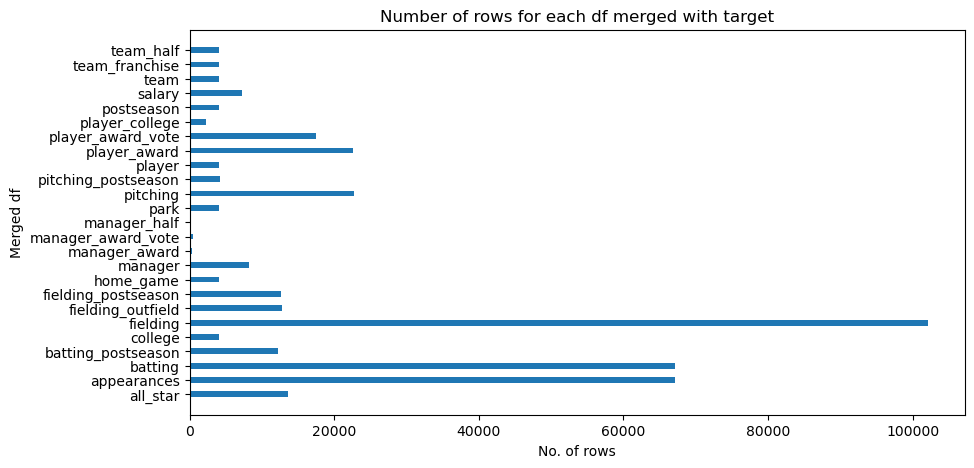

In [3211]:
# #Create function that pairs each dataframe with the merged target dataframe and returns the name of df merged and the new df

def pair_combos():
    
    table_names = []
    merged_dfs = []
    
    for name, df in list(database.items())[1:]:
        common_columns = np.intersect1d(df_hall_of_fame.columns, df.columns)
        if len(common_columns) > 0:
            merge = pd.merge(df_hall_of_fame,df,on=list(common_columns),how='inner')
            merged_dfs.append(merge)

        else:
            concat = pd.concat([df_hall_of_fame, df], axis=1)
            merged_dfs.append(concat)

        table_names.append(name)
        
    return (table_names, merged_dfs)

pairs = pair_combos()    

for name, df in zip(pairs[0],pairs[1]):
    print(f'{name}: {df.shape}')
    
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.barh([names for names in pairs[0]],[rows.shape[0] for rows in pairs[1]], height = 0.4)

plt.ylabel("Merged df")
plt.xlabel("No. of rows")
plt.title("Number of rows for each df merged with target")
plt.show()

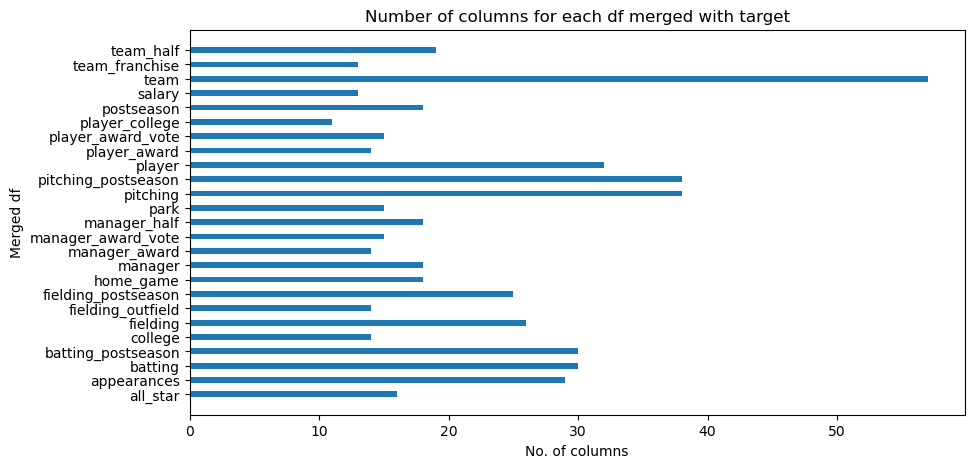

In [3212]:
pairs = pair_combos()    

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.barh([names for names in pairs[0]],[rows.shape[1] for rows in pairs[1]], height = 0.4)

plt.ylabel("Merged df")
plt.xlabel("No. of columns")
plt.title("Number of columns for each df merged with target")
plt.show()

In [3213]:
df_hall_of_fame.head()

player_id  yearid votedby  ballots  needed  votes inducted category  \
0   cobbty01    1936   BBWAA    226.0   170.0  222.0        Y   Player   
1   ruthba01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
2  wagneho01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
3  mathech01    1936   BBWAA    226.0   170.0  205.0        Y   Player   
4  johnswa01    1936   BBWAA    226.0   170.0  189.0        Y   Player   

  needed_note  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [3214]:
df_hall_of_fame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    4120 non-null   object 
 1   yearid       4120 non-null   int64  
 2   votedby      4120 non-null   object 
 3   ballots      3927 non-null   float64
 4   needed       3770 non-null   float64
 5   votes        3927 non-null   float64
 6   inducted     4120 non-null   object 
 7   category     4120 non-null   object 
 8   needed_note  157 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 289.8+ KB


In [3215]:
df_hall_of_fame.isnull().mean()

player_id      0.000000
yearid         0.000000
votedby        0.000000
ballots        0.046845
needed         0.084951
votes          0.046845
inducted       0.000000
category       0.000000
needed_note    0.961893
dtype: float64

In [3216]:
df_pitching.head()

player_id  year  stint team_id league_id   w   l   g  gs  cg  sho  sv  \
0  bechtge01  1871      1     PH1       NaN   1   2   3   3   2    0   0   
1  brainas01  1871      1     WS3       NaN  12  15  30  30  30    0   0   
2  fergubo01  1871      1     NY2       NaN   0   0   1   0   0    0   0   
3  fishech01  1871      1     RC1       NaN   4  16  24  24  22    1   0   
4  fleetfr01  1871      1     NY2       NaN   0   1   1   1   1    0   0   

   ipouts    h   er  hr  bb  so  baopp    era  ibb  wp  hbp  bk  bfp  gf    r  \
0    78.0   43   23   0  11   1    NaN   7.96  NaN NaN  NaN   0  NaN NaN   42   
1   792.0  361  132   4  37  13    NaN   4.50  NaN NaN  NaN   0  NaN NaN  292   
2     3.0    8    3   0   0   0    NaN  27.00  NaN NaN  NaN   0  NaN NaN    9   
3   639.0  295  103   3  31  15    NaN   4.35  NaN NaN  NaN   0  NaN NaN  257   
4    27.0   20   10   0   3   0    NaN  10.00  NaN NaN  NaN   0  NaN NaN   21   

   sh  sf  g_idp  
0 NaN NaN    NaN  
1 NaN NaN    NaN  
2 NaN NaN    NaN  
3 NaN NaN    NaN  
4 NaN NaN    NaN

In [3217]:
df_pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

In [3218]:
df_pitching.isnull().mean()

player_id    0.000000
year         0.000000
stint        0.000000
team_id      0.000000
league_id    0.002968
w            0.000000
l            0.000000
g            0.000000
gs           0.000000
cg           0.000000
sho          0.000000
sv           0.000000
ipouts       0.000023
h            0.000000
er           0.000000
hr           0.000000
bb           0.000000
so           0.000000
baopp        0.034550
era          0.002039
ibb          0.330207
wp           0.003013
hbp          0.012665
bk           0.000000
bfp          0.005415
gf           0.003013
r            0.000000
sh           0.745373
sf           0.745373
g_idp        0.983122
dtype: float64

In [3219]:
df_batting.head()

player_id  year  stint team_id league_id   g     ab     r     h  double  \
0  abercda01  1871      1     TRO       NaN   1    4.0   0.0   0.0     0.0   
1   addybo01  1871      1     RC1       NaN  25  118.0  30.0  32.0     6.0   
2  allisar01  1871      1     CL1       NaN  29  137.0  28.0  40.0     4.0   
3  allisdo01  1871      1     WS3       NaN  27  133.0  28.0  44.0    10.0   
4  ansonca01  1871      1     RC1       NaN  25  120.0  29.0  39.0    11.0   

   triple   hr   rbi   sb   cs   bb   so  ibb  hbp  sh  sf  g_idp  
0     0.0  0.0   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN    NaN  
1     0.0  0.0  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN    NaN  
2     5.0  0.0  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN    NaN  
3     2.0  2.0  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN    NaN  
4     3.0  0.0  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN    NaN

In [3220]:
df_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player_id  101332 non-null  object 
 1   year       101332 non-null  int64  
 2   stint      101332 non-null  int64  
 3   team_id    101332 non-null  object 
 4   league_id  100595 non-null  object 
 5   g          101332 non-null  int64  
 6   ab         96183 non-null   float64
 7   r          96183 non-null   float64
 8   h          96183 non-null   float64
 9   double     96183 non-null   float64
 10  triple     96183 non-null   float64
 11  hr         96183 non-null   float64
 12  rbi        95759 non-null   float64
 13  sb         94883 non-null   float64
 14  cs         72729 non-null   float64
 15  bb         96183 non-null   float64
 16  so         88345 non-null   float64
 17  ibb        59620 non-null   float64
 18  hbp        93373 non-null   float64
 19  sh         89845 non-nu

In [3221]:
df_batting.isnull().mean()

player_id    0.000000
year         0.000000
stint        0.000000
team_id      0.000000
league_id    0.007273
g            0.000000
ab           0.050813
r            0.050813
h            0.050813
double       0.050813
triple       0.050813
hr           0.050813
rbi          0.054997
sb           0.063642
cs           0.282270
bb           0.050813
so           0.128163
ibb          0.411637
hbp          0.078544
sh           0.113360
sf           0.406397
g_idp        0.308461
dtype: float64

In [3222]:
df_fielding.head()

player_id  year  stint team_id league_id pos   g  gs  inn_outs    po     a  \
0  abercda01  1871      1     TRO       NaN  SS   1 NaN       NaN   1.0   3.0   
1   addybo01  1871      1     RC1       NaN  2B  22 NaN       NaN  67.0  72.0   
2   addybo01  1871      1     RC1       NaN  SS   3 NaN       NaN   8.0  14.0   
3  allisar01  1871      1     CL1       NaN  2B   2 NaN       NaN   1.0   4.0   
4  allisar01  1871      1     CL1       NaN  OF  29 NaN       NaN  51.0   3.0   

      e   dp  pb  wp  sb  cs  zr  
0   2.0  0.0 NaN NaN NaN NaN NaN  
1  42.0  5.0 NaN NaN NaN NaN NaN  
2   7.0  0.0 NaN NaN NaN NaN NaN  
3   0.0  0.0 NaN NaN NaN NaN NaN  
4   7.0  1.0 NaN NaN NaN NaN NaN

In [3223]:
df_fielding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170526 entries, 0 to 170525
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player_id  170526 non-null  object 
 1   year       170526 non-null  int64  
 2   stint      170526 non-null  int64  
 3   team_id    170526 non-null  object 
 4   league_id  169023 non-null  object 
 5   pos        170526 non-null  object 
 6   g          170526 non-null  int64  
 7   gs         75849 non-null   float64
 8   inn_outs   102313 non-null  float64
 9   po         156409 non-null  float64
 10  a          156408 non-null  float64
 11  e          156407 non-null  float64
 12  dp         156408 non-null  float64
 13  pb         11116 non-null   float64
 14  wp         4189 non-null    float64
 15  sb         6024 non-null    float64
 16  cs         6024 non-null    float64
 17  zr         4189 non-null    float64
dtypes: float64(11), int64(3), object(4)
memory usage: 23.4+ MB


In [3224]:
df_fielding.isnull().mean()

player_id    0.000000
year         0.000000
stint        0.000000
team_id      0.000000
league_id    0.008814
pos          0.000000
g            0.000000
gs           0.555206
inn_outs     0.400015
po           0.082785
a            0.082791
e            0.082797
dp           0.082791
pb           0.934813
wp           0.975435
sb           0.964674
cs           0.964674
zr           0.975435
dtype: float64

In [3225]:
df_appearances.head()

year team_id league_id  player_id  g_all  gs  g_batting  g_defense  g_p  \
0  1871     BS1       NaN  barnero01   31.0 NaN         31       31.0    0   
1  1871     BS1       NaN  barrofr01   18.0 NaN         18       18.0    0   
2  1871     BS1       NaN  birdsda01   29.0 NaN         29       29.0    0   
3  1871     BS1       NaN   conefr01   19.0 NaN         19       19.0    0   
4  1871     BS1       NaN  gouldch01   31.0 NaN         31       31.0    0   

   g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  g_dh  g_ph  g_pr  
0    0     0    16     0    15     0     0     0     0   NaN   NaN   NaN  
1    0     0     1     0     0    13     0     4    17   NaN   NaN   NaN  
2    7     0     0     0     0     0     0    27    27   NaN   NaN   NaN  
3    0     0     0     0     0    18     0     1    18   NaN   NaN   NaN  
4    0    30     0     0     0     0     0     1     1   NaN   NaN   NaN

In [3226]:
df_appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100951 non-null  int64  
 1   team_id    100951 non-null  object 
 2   league_id  100214 non-null  object 
 3   player_id  100951 non-null  object 
 4   g_all      100748 non-null  float64
 5   gs         49030 non-null   float64
 6   g_batting  100951 non-null  int64  
 7   g_defense  100748 non-null  float64
 8   g_p        100951 non-null  int64  
 9   g_c        100951 non-null  int64  
 10  g_1b       100951 non-null  int64  
 11  g_2b       100951 non-null  int64  
 12  g_3b       100951 non-null  int64  
 13  g_ss       100951 non-null  int64  
 14  g_lf       100951 non-null  int64  
 15  g_cf       100951 non-null  int64  
 16  g_rf       100951 non-null  int64  
 17  g_of       100951 non-null  int64  
 18  g_dh       49233 non-null   float64
 19  g_ph       49233 non-nu

In [3227]:
df_appearances.isnull().mean()

year         0.000000
team_id      0.000000
league_id    0.007301
player_id    0.000000
g_all        0.002011
gs           0.514319
g_batting    0.000000
g_defense    0.002011
g_p          0.000000
g_c          0.000000
g_1b         0.000000
g_2b         0.000000
g_3b         0.000000
g_ss         0.000000
g_lf         0.000000
g_cf         0.000000
g_rf         0.000000
g_of         0.000000
g_dh         0.512308
g_ph         0.512308
g_pr         0.574596
dtype: float64

In [3228]:
df_player.head()

player_id  birth_year  birth_month  birth_day birth_country birth_state  \
0  aardsda01      1981.0         12.0       27.0           USA          CO   
1  aaronha01      1934.0          2.0        5.0           USA          AL   
2  aaronto01      1939.0          8.0        5.0           USA          AL   
3   aasedo01      1954.0          9.0        8.0           USA          CA   
4   abadan01      1972.0          8.0       25.0           USA          FL   

   birth_city  death_year  death_month  death_day death_country death_state  \
0      Denver         NaN          NaN        NaN           NaN         NaN   
1      Mobile         NaN          NaN        NaN           NaN         NaN   
2      Mobile      1984.0          8.0       16.0           USA          GA   
3      Orange         NaN          NaN        NaN           NaN         NaN   
4  Palm Beach         NaN          NaN        NaN           NaN         NaN   

  death_city name_first name_last      name_given  weight  height bats throws  \
0        NaN      David   Aardsma     David Allan   220.0    75.0    R      R   
1        NaN       Hank     Aaron     Henry Louis   180.0    72.0    R      R   
2    Atlanta     Tommie     Aaron      Tommie Lee   190.0    75.0    R      R   
3        NaN        Don      Aase  Donald William   190.0    75.0    R      R   
4        NaN       Andy      Abad   Fausto Andres   184.0    73.0    L      L   

        debut  final_game  retro_id   bbref_id  
0  2004-04-06  2015-08-23  aardd001  aardsda01  
1  1954-04-13  1976-10-03  aaroh101  aaronha01  
2  1962-04-10  1971-09-26  aarot101  aaronto01  
3  1977-07-26  1990-10-03  aased001   aasedo01  
4  2001-09-10  2006-04-13  abada001   abadan01

In [3229]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      18846 non-null  object 
 1   birth_year     18703 non-null  float64
 2   birth_month    18531 non-null  float64
 3   birth_day      18382 non-null  float64
 4   birth_country  18773 non-null  object 
 5   birth_state    18220 non-null  object 
 6   birth_city     18647 non-null  object 
 7   death_year     9336 non-null   float64
 8   death_month    9335 non-null   float64
 9   death_day      9334 non-null   float64
 10  death_country  9329 non-null   object 
 11  death_state    9277 non-null   object 
 12  death_city     9325 non-null   object 
 13  name_first     18807 non-null  object 
 14  name_last      18846 non-null  object 
 15  name_given     18807 non-null  object 
 16  weight         17975 non-null  float64
 17  height         18041 non-null  float64
 18  bats  

In [3230]:
df_player.isnull().mean()

player_id        0.000000
birth_year       0.007588
birth_month      0.016714
birth_day        0.024621
birth_country    0.003874
birth_state      0.033217
birth_city       0.010559
death_year       0.504616
death_month      0.504669
death_day        0.504722
death_country    0.504988
death_state      0.507747
death_city       0.505200
name_first       0.002069
name_last        0.000000
name_given       0.002069
weight           0.046217
height           0.042715
bats             0.063196
throws           0.051894
debut            0.010241
final_game       0.010241
retro_id         0.002865
bbref_id         0.000053
dtype: float64

In [3231]:
#create function to print out highly correlated pairs

def high_corr_pairs(df, annot):
    num_cols = [c for c in df.columns if df[c].dtypes != 'O']
    
    plt.figure(figsize=(12, 12))
    sns.heatmap(data = df[num_cols].corr(), annot=annot, annot_kws={"size": 7})
    
    #print out highly correlated pairs
    high_corr_pairs_lst = np.where(df[num_cols].corr() > 0.7)
    
    high_corr_pairs_lst = [(df[num_cols].corr().index[x], df[num_cols].corr().columns[y]) 
                         for x, y in zip(*high_corr_pairs_lst) if x != y and x < y]
    
    for pair in high_corr_pairs_lst:
        print(pair)
    
    

('g', 'ab')
('g', 'r')
('g', 'h')
('g', 'double')
('g', 'rbi')
('g', 'bb')
('g', 'so')
('g', 'sf')
('g', 'g_idp')
('ab', 'r')
('ab', 'h')
('ab', 'double')
('ab', 'triple')
('ab', 'rbi')
('ab', 'bb')
('ab', 'so')
('ab', 'sf')
('ab', 'g_idp')
('r', 'h')
('r', 'double')
('r', 'triple')
('r', 'hr')
('r', 'rbi')
('r', 'bb')
('r', 'so')
('r', 'sf')
('r', 'g_idp')
('h', 'double')
('h', 'triple')
('h', 'rbi')
('h', 'bb')
('h', 'so')
('h', 'sf')
('h', 'g_idp')
('double', 'hr')
('double', 'rbi')
('double', 'bb')
('double', 'so')
('double', 'sf')
('double', 'g_idp')
('hr', 'rbi')
('hr', 'bb')
('hr', 'so')
('rbi', 'bb')
('rbi', 'so')
('rbi', 'sf')
('rbi', 'g_idp')
('sb', 'cs')
('bb', 'so')
('bb', 'ibb')
('bb', 'sf')
('bb', 'g_idp')
('so', 'sf')
('so', 'g_idp')
('sf', 'g_idp')


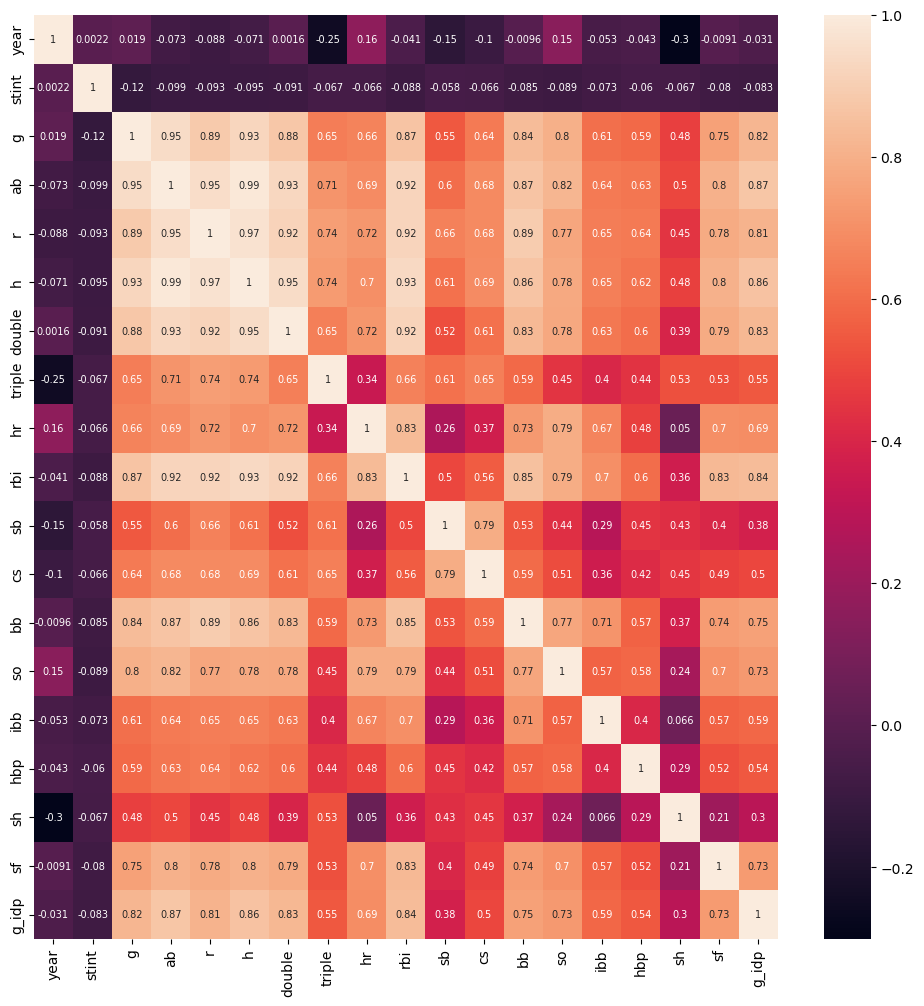

In [3232]:
# #heatmap of batting

# df_batting_numcols = [c for c in df_batting.columns if df_batting[c].dtypes != 'O']

# plt.figure(figsize=(12, 12))
# sns.heatmap(data = df_batting[df_batting_numcols].corr(), annot=True, annot_kws={"size": 7})

# #print out highly correlated pairs
# high_corr_pairs_b = np.where(df_batting[df_batting_numcols].corr() > 0.7)
# high_corr_pairs_b = [(df_batting[df_batting_numcols].corr().index[x], df_batting[df_batting_numcols].corr().columns[y]) for x, y in zip(*high_corr_pairs_b) if x != y and x < y]

# for pair in high_corr_pairs_b:
#     print(pair)

high_corr_pairs(df_batting, True)

('w', 'l')
('w', 'gs')
('w', 'cg')
('w', 'ipouts')
('w', 'h')
('w', 'er')
('w', 'bb')
('w', 'so')
('w', 'bfp')
('w', 'r')
('w', 'g_idp')
('l', 'gs')
('l', 'ipouts')
('l', 'h')
('l', 'er')
('l', 'bb')
('l', 'so')
('l', 'bfp')
('l', 'r')
('l', 'g_idp')
('gs', 'cg')
('gs', 'ipouts')
('gs', 'h')
('gs', 'er')
('gs', 'hr')
('gs', 'bb')
('gs', 'so')
('gs', 'bfp')
('gs', 'r')
('gs', 'g_idp')
('cg', 'ipouts')
('cg', 'h')
('cg', 'r')
('sv', 'gf')
('ipouts', 'h')
('ipouts', 'er')
('ipouts', 'bb')
('ipouts', 'so')
('ipouts', 'bfp')
('ipouts', 'r')
('ipouts', 'sh')
('ipouts', 'sf')
('ipouts', 'g_idp')
('h', 'er')
('h', 'bb')
('h', 'so')
('h', 'bfp')
('h', 'r')
('h', 'sh')
('h', 'sf')
('h', 'g_idp')
('er', 'hr')
('er', 'bb')
('er', 'so')
('er', 'bfp')
('er', 'r')
('er', 'sh')
('er', 'sf')
('er', 'g_idp')
('hr', 'so')
('hr', 'g_idp')
('bb', 'so')
('bb', 'bfp')
('bb', 'r')
('bb', 'g_idp')
('so', 'bfp')
('so', 'r')
('so', 'g_idp')
('hbp', 'g_idp')
('bfp', 'r')
('bfp', 'sh')
('bfp', 'sf')
('bfp', 'g_idp

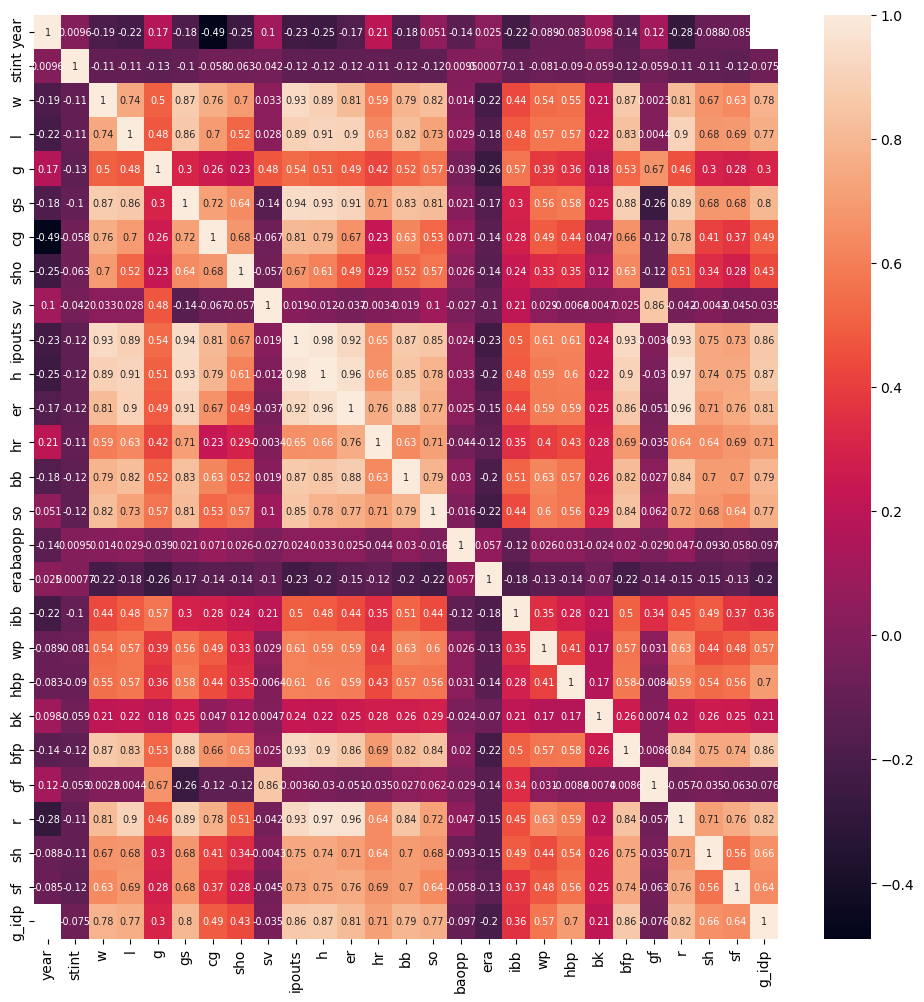

In [3233]:
# #heatmap of pitching

# df_pitching_numcols = [c for c in df_pitching.columns if df_pitching[c].dtypes != 'O']

# plt.figure(figsize=(12, 12))
# sns.heatmap(data = df_pitching[df_pitching_numcols].corr(), annot=True, annot_kws={"size": 7})

# #print out highly correlated pairs
# high_corr_pairs_p = np.where(df_pitching[df_pitching_numcols].corr() > 0.7)
# high_corr_pairs_p = [(df_pitching[df_pitching_numcols].corr().index[x], df_pitching[df_pitching_numcols].corr().columns[y]) for x, y in zip(*high_corr_pairs_p) if x != y and x < y]

# for pair in high_corr_pairs_p:
#     print(pair)

high_corr_pairs(df_pitching, True)

('g', 'gs')
('g', 'inn_outs')
('g', 'wp')
('g', 'sb')
('g', 'cs')
('gs', 'inn_outs')
('gs', 'po')
('gs', 'e')
('gs', 'pb')
('gs', 'wp')
('gs', 'sb')
('gs', 'cs')
('inn_outs', 'po')
('inn_outs', 'e')
('inn_outs', 'wp')
('inn_outs', 'sb')
('inn_outs', 'cs')
('po', 'wp')
('po', 'sb')
('po', 'cs')
('a', 'dp')
('a', 'wp')
('a', 'sb')
('a', 'cs')
('e', 'pb')
('e', 'wp')
('e', 'sb')
('e', 'cs')
('dp', 'wp')
('dp', 'cs')
('pb', 'wp')
('wp', 'sb')
('wp', 'cs')
('sb', 'cs')


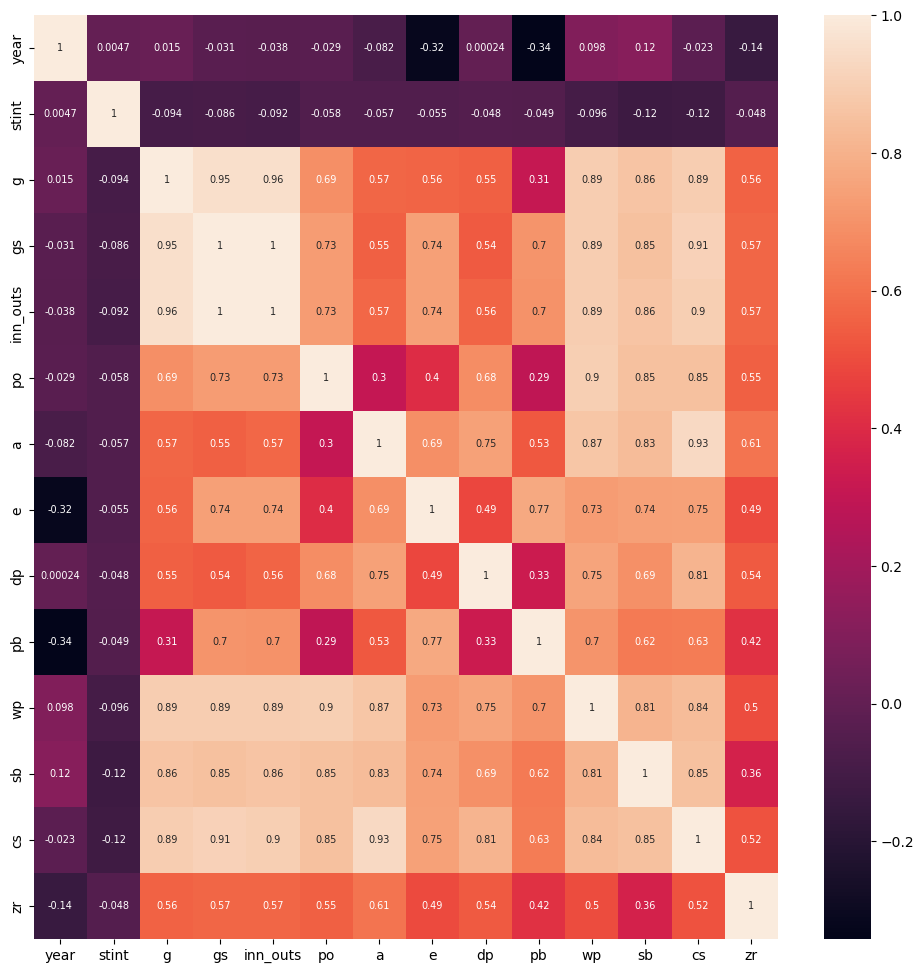

In [3234]:
# #heatmap of fielding

# df_fielding_numcols = [c for c in df_fielding.columns if df_fielding[c].dtypes != 'O']

# plt.figure(figsize=(12, 12))5
# sns.heatmap(data = df_fielding[df_fielding_numcols].corr(), annot=True, annot_kws={"size": 7})

# #print out highly correlated pairs
# high_corr_pairs_f = np.where(df_fielding[df_fielding_numcols].corr() > 0.7)
# high_corr_pairs_f = [(df_fielding[df_fielding_numcols].corr().index[x], df_fielding[df_fielding_numcols].corr().columns[y]) for x, y in zip(*high_corr_pairs_f) if x != y and x < y]

# for pair in high_corr_pairs_f:
#     print(pair)

high_corr_pairs(df_fielding, True)

('g_all', 'gs')
('g_all', 'g_batting')
('g_all', 'g_defense')
('gs', 'g_batting')
('gs', 'g_defense')
('g_batting', 'g_defense')


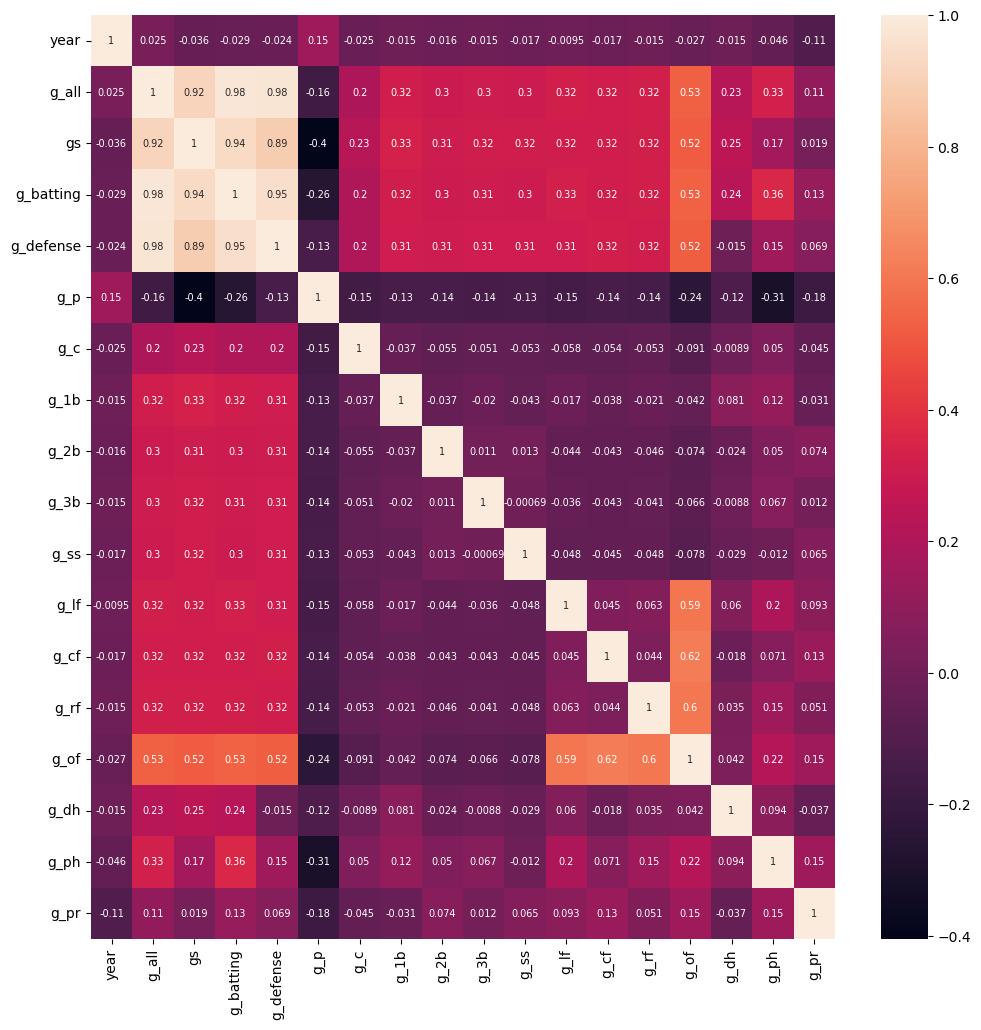

In [3235]:
# # #heatmap of appearances

# # df_appearances_numcols = [c for c in df_appearances.columns if df_appearances[c].dtypes != 'O']

# # plt.figure(figsize=(12, 12))
# # sns.heatmap(data = df_appearances[df_appearances_numcols].corr(), annot=True, annot_kws={"size": 7})

# # #print out highly correlated pairs
# # high_corr_pairs_a = np.where(df_appearances[df_appearances_numcols].corr() > 0.7)
# # high_corr_pairs_a = [(df_appearances[df_appearances_numcols].corr().index[x], df_appearances[df_appearances_numcols].corr().columns[y]) for x, y in zip(*high_corr_pairs_a) if x != y and x < y]

# # for pair in high_corr_pairs_a:
# #     print(pair)

high_corr_pairs(df_appearances, True)

### Step 2: Data Wrangling on multiple tables 

In [3236]:
#filter the players in hall_of_fame
df_hall_of_fame_new = df_hall_of_fame[df_hall_of_fame['category'] == 'Player']

#drop the columns 
df_hall_of_fame_new = df_hall_of_fame_new.drop(columns = ['needed_note', 'category'])

df_hall_of_fame_new

player_id  yearid votedby  ballots  needed  votes inducted
0      cobbty01    1936   BBWAA    226.0   170.0  222.0        Y
1      ruthba01    1936   BBWAA    226.0   170.0  215.0        Y
2     wagneho01    1936   BBWAA    226.0   170.0  215.0        Y
3     mathech01    1936   BBWAA    226.0   170.0  205.0        Y
4     johnswa01    1936   BBWAA    226.0   170.0  189.0        Y
...         ...     ...     ...      ...     ...    ...      ...
4115  grudzma01    2016   BBWAA    440.0   330.0    0.0        N
4116  ausmubr01    2016   BBWAA    440.0   330.0    0.0        N
4117  hamptmi01    2016   BBWAA    440.0   330.0    0.0        N
4118  castilu01    2016   BBWAA    440.0   330.0    0.0        N
4119  lowelmi01    2016   BBWAA    440.0   330.0    0.0        N

[3997 rows x 7 columns]

In [3237]:
#group the player ids and sum of their total games, designated hitter, and pinch hitter
df_appearances_groupedgames = df_appearances.groupby('player_id').sum().reset_index()
df_appearances_groupedgames

player_id   year                                            team_id  \
0      aardsda01  18084                        SFNCHNCHABOSSEASEANYANYNATL   
1      aaronha01  45195  ML1ML1ML1ML1ML1ML1ML1ML1ML1ML1ML1ML1ATLATLATLA...   
2      aaronto01  13768                              ML1ML1ML1ATLATLATLATL   
3       aasedo01  25786            BOSCALCALCALCALCALCALBALBALBALBALNYNLAN   
4       abadan01   6010                                          OAKBOSCIN   
...          ...    ...                                                ...   
18655   zupofr01   5876                                          BALBALBAL   
18656  zuvelpa01  17875                        ATLATLATLATLNYANYACLECLEKCA   
18657  zuverge01  19551                     CLECLECINDETBALDETBALBALBALBAL   
18658  zwilldu01   7655                                       CHACHFCHFCHN   
18659   zychto01   2015                                                SEA   

                                            league_id   g_all     gs  \
0                                  NLNLALALALALALNLNL   331.0    0.0   
1      NLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLALAL  3298.0  288.0   
2                                      NLNLNLNLNLNLNL   437.0    0.0   
3                          ALALALALALALALALALALALNLNL   448.0    0.0   
4                                              ALALNL    15.0    4.0   
...                                               ...     ...    ...   
18655                                          ALALAL    16.0    0.0   
18656                              NLNLNLNLALALALALAL   209.0  138.0   
18657                            ALALNLALALALALALALAL   266.0    0.0   
18658                                        ALFLFLNL   366.0    0.0   
18659                                              AL    13.0    1.0   

       g_batting  g_defense  g_p  g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  \
0            139      331.0  331    0     0     0     0     0     0     0   
1           3298     3057.0    0    0   210    43     7     0   313   293   
2            437      437.0    0    0   232     7    10     0   136     1   
3             81      448.0  448    0     0     0     0     0     0     0   
4             15        9.0    0    0     8     0     0     0     0     0   
...          ...        ...  ...  ...   ...   ...   ...   ...   ...   ...   
18655         16       16.0    0   13     0     0     0     0     0     0   
18656        209      197.0    0    0     0    55    14   133     0     0   
18657        266      266.0  265    0     0     0     0     0     0     0   
18658        366      366.0    0    0     3     0     0     0     0   333   
18659          0       13.0   13    0     0     0     0     0     0     0   

       g_rf  g_of   g_dh  g_ph  g_pr  
0         0     0    0.0   0.0   0.0  
1      2184  2760  196.0  46.0   0.0  
2         2   138    0.0   0.0   0.0  
3         0     0    0.0   0.0   0.0  
4         1     1    0.0   7.0   1.0  
...     ...   ...    ...   ...   ...  
18655     0     0    0.0   0.0   0.0  
18656     0     0    2.0  14.0   9.0  
18657     0     0    0.0   0.0   0.0  
18658     5   339    0.0   0.0   0.0  
18659     0     0    0.0   0.0   0.0  

[18660 rows x 21 columns]

In [3238]:
#count number of leagues each player id played
df_appearances_countleagues = df_appearances.groupby('player_id')['league_id'].count().reset_index()
df_appearances_countleagues

player_id  league_id
0      aardsda01          9
1      aaronha01         23
2      aaronto01          7
3       aasedo01         13
4       abadan01          3
...          ...        ...
18655   zupofr01          3
18656  zuvelpa01          9
18657  zuverge01         10
18658  zwilldu01          4
18659   zychto01          1

[18660 rows x 2 columns]

In [3239]:

#merge the df_appearances_groupedgames and df_appearances_countleagues by player id
df_appearances_new = pd.merge(df_appearances_groupedgames, df_appearances_countleagues, on = 'player_id', how = 'inner')

#rename the league_id column to leagues_played
df_appearances_new = df_appearances_new.rename(columns={'league_id_y': 'leagues_played'})

#create method that sums the unique positions played for each player
positions_lst = ['g_p','g_c', 'g_1b', 'g_2b', 'g_3b', 'g_ss', 'g_lf', 'g_cf', 'g_rf', 'g_of', 'g_dh', 'g_ph', 'g_pr']

def position_diversity(row):
    count = 0
    for pos in positions_lst:
        if row[pos] != 0:
            count += 1
    return count

#create new features
#the features g_of and g_if representing the total summation of games played for inner and outer fields do not add up correctly thus they have to be recalculated

#total infield games
df_appearances_new['if_all'] = df_appearances_new['g_1b'] +df_appearances_new['g_2b'] + df_appearances_new['g_3b'] + df_appearances_new['g_ss']

# total outfield games
df_appearances_new['of_all'] = df_appearances_new['g_lf'] + df_appearances_new['g_rf'] + df_appearances_new['g_cf']

#total positions played
df_appearances_new['pos_div'] = df_appearances_new.apply(position_diversity, axis=1)

#drop redundant columns dropped g_of since 
df_appearances_new = df_appearances_new.drop(columns=['year', 'team_id', 'league_id_x',  'g_1b', 'g_2b',
                                                      'g_3b', 'g_ss', 'g_lf', 'g_cf', 'g_rf', 'g_of', 'g_dh', 'g_ph', 'g_pr'])
        
df_appearances_new

player_id   g_all     gs  g_batting  g_defense  g_p  g_c  \
0      aardsda01   331.0    0.0        139      331.0  331    0   
1      aaronha01  3298.0  288.0       3298     3057.0    0    0   
2      aaronto01   437.0    0.0        437      437.0    0    0   
3       aasedo01   448.0    0.0         81      448.0  448    0   
4       abadan01    15.0    4.0         15        9.0    0    0   
...          ...     ...    ...        ...        ...  ...  ...   
18655   zupofr01    16.0    0.0         16       16.0    0   13   
18656  zuvelpa01   209.0  138.0        209      197.0    0    0   
18657  zuverge01   266.0    0.0        266      266.0  265    0   
18658  zwilldu01   366.0    0.0        366      366.0    0    0   
18659   zychto01    13.0    1.0          0       13.0   13    0   

       leagues_played  if_all  of_all  pos_div  
0                   9       0       0        1  
1                  23     260    2790        9  
2                   7     249     139        7  
3                  13       0       0        1  
4                   3       8       1        5  
...               ...     ...     ...      ...  
18655               3       0       0        1  
18656               9     202       0        6  
18657              10       0       0        1  
18658               4       3     338        4  
18659               1       0       0        1  

[18660 rows x 11 columns]

In [3240]:

#create copy of df_player
df_player_new = df_player.copy()

#convert the debut and final_game columns to date time measures
df_player_new['debut'] = pd.to_datetime(df_player_new['debut'])
df_player_new['final_game'] = pd.to_datetime(df_player_new['final_game'])

#create new columns

#time spent in mlb
df_player_new['career_length'] = (df_player_new['final_game'] - df_player_new['debut']).dt.days/365.0

#year the player retired
df_player_new['final_game_year'] = df_player_new['final_game'].dt.year

#year the player made his first debut
df_player_new['debut_year'] = df_player_new['debut'].dt.year

#the age of the player at the time of their MLB debut
df_player_new['debut_age'] = df_player_new['debut_year'] - df_player_new['birth_year']

#the age of the player during their last MLB season
df_player_new['final_game_age'] = df_player_new['final_game_year'] - df_player_new['birth_year']

#drop columns
df_player_new = df_player_new[['player_id', 'career_length',
       'final_game_year', 'debut_year', 'debut_age', 'final_game_age']]

df_player_new

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
18841   zupofr01       3.857534           1961.0      1957.0       18.0   
18842  zuvelpa01       8.663014           1991.0      1982.0       24.0   
18843  zuverge01       8.156164           1959.0      1951.0       27.0   
18844  zwilldu01       5.915068           1916.0      1910.0       22.0   
18845   zychto01       0.079452           2015.0      2015.0       25.0   

       final_game_age  
0                34.0  
1                42.0  
2                32.0  
3                36.0  
4                34.0  
...               ...  
18841            22.0  
18842            33.0  
18843            35.0  
18844            28.0  
18845            25.0  

[18846 rows x 6 columns]

In [3241]:
#merge the appearances with player
df_appearances_player = pd.merge(df_player_new, df_appearances_new, on = ['player_id'], how='inner')
df_appearances_player

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
18648   zupofr01       3.857534           1961.0      1957.0       18.0   
18649  zuvelpa01       8.663014           1991.0      1982.0       24.0   
18650  zuverge01       8.156164           1959.0      1951.0       27.0   
18651  zwilldu01       5.915068           1916.0      1910.0       22.0   
18652   zychto01       0.079452           2015.0      2015.0       25.0   

       final_game_age   g_all     gs  g_batting  g_defense  g_p  g_c  \
0                34.0   331.0    0.0        139      331.0  331    0   
1                42.0  3298.0  288.0       3298     3057.0    0    0   
2                32.0   437.0    0.0        437      437.0    0    0   
3                36.0   448.0    0.0         81      448.0  448    0   
4                34.0    15.0    4.0         15        9.0    0    0   
...               ...     ...    ...        ...        ...  ...  ...   
18648            22.0    16.0    0.0         16       16.0    0   13   
18649            33.0   209.0  138.0        209      197.0    0    0   
18650            35.0   266.0    0.0        266      266.0  265    0   
18651            28.0   366.0    0.0        366      366.0    0    0   
18652            25.0    13.0    1.0          0       13.0   13    0   

       leagues_played  if_all  of_all  pos_div  
0                   9       0       0        1  
1                  23     260    2790        9  
2                   7     249     139        7  
3                  13       0       0        1  
4                   3       8       1        5  
...               ...     ...     ...      ...  
18648               3       0       0        1  
18649               9     202       0        6  
18650              10       0       0        1  
18651               4       3     338        4  
18652               1       0       0        1  

[18653 rows x 16 columns]

In [3242]:
# Aggregate batting statistics for each player

df_batting_new = df_batting.groupby('player_id').sum().reset_index()


#create new features in the batting column

#Batting average
df_batting_new['ba'] = df_batting_new['h']/df_batting_new['ab']

#Strikeout rate
df_batting_new['so_rate'] = df_batting_new['so'] / df_batting_new['ab']

#Slugging percentage
df_batting_new['slg'] = (df_batting_new['h'] + (2*df_batting_new['double']) + (3 * df_batting_new['triple']) + (4 * df_batting_new['hr'])) / df_batting_new['ab']

#replace infinite errors with nulls
df_batting_new = df_batting_new.replace([np.inf, -np.inf], np.nan)


#drop columns
df_batting_new = df_batting_new.drop(columns=['team_id', 'stint', 'ab', 'r', 'h', 
                                          'double', 'rbi', 'sb', 'so', 'bb', 'sf', 'g_idp', 'league_id', 'year', 'g', 'hr'])

#rename column sh since there is a same column name in pitching same for ibb
df_batting_new = df_batting_new.rename(columns = {'ibb':'ibb_b', 'sh':'sh_b'})


df_batting_new


player_id  triple    cs  ibb_b   hbp  sh_b        ba   so_rate  \
0      aardsda01     0.0   0.0    0.0   0.0   1.0  0.000000  0.500000   
1      aaronha01    98.0  73.0  293.0  32.0  21.0  0.304998  0.111857   
2      aaronto01     6.0   8.0    3.0   0.0   9.0  0.228814  0.153602   
3       aasedo01     0.0   0.0    0.0   0.0   0.0  0.000000  0.600000   
4       abadan01     0.0   1.0    0.0   0.0   0.0  0.095238  0.238095   
...          ...     ...   ...    ...   ...   ...       ...       ...   
18654   zupofr01     0.0   0.0    0.0   0.0   0.0  0.166667  0.333333   
18655  zuvelpa01     2.0   0.0    1.0   2.0  18.0  0.221996  0.101833   
18656  zuverge01     1.0   1.0    0.0   0.0  16.0  0.147887  0.274648   
18657  zwilldu01    15.0   0.0    0.0   4.0  31.0  0.284375  0.108594   
18658   zychto01     0.0   0.0    0.0   0.0   0.0       NaN       NaN   

            slg  
0      0.000000  
1      0.673973  
2      0.391949  
3      0.000000  
4      0.095238  
...         ...  
18654  0.277778  
18655  0.319756  
18656  0.197183  
18657  0.532031  
18658       NaN  

[18659 rows x 9 columns]

In [3243]:
# Aggregate pitching statistics for each player

df_pitching_new = df_pitching.groupby('player_id').sum().reset_index()

#create new columns

#strikeout to walk Ratio
df_pitching_new['so/bb'] = df_pitching_new['so']/df_pitching_new['bb']

#win rate
df_pitching_new['win_rate'] = df_pitching_new['w']/df_pitching_new['g']

#complete game rate
df_pitching_new['cg_rate'] = df_pitching_new['cg']/df_pitching_new['gs']

#walks and hits per inning pitched
df_pitching_new['whip'] = (df_pitching_new['bb'] + df_pitching_new['h']) / (df_pitching_new['ipouts'] / 3)

#replace infinite errors
df_pitching_new = df_pitching_new.replace([np.inf, -np.inf], np.nan)

#drop columns
df_pitching_new = df_pitching_new.drop(columns=['team_id', 'stint','league_id', 'year', 'w', 'l', 'gs', 'cg', 'sv', 'ipouts', 
                                                'h', 'er', 'hr', 'bb', 'so', 'hbp', 'bfp', 'r', 'g', 'g_idp', ])

#rename ibb to ibb_p p stands for pitching and sh to sh_p
df_pitching_new = df_pitching_new.rename(columns = {'ibb':'ibb_p', 'sh':'sh_p'})


df_pitching_new

player_id  sho  baopp    era  ibb_p    wp  bk     gf  sh_p    sf  \
0     aardsda01    0  2.314  46.75   22.0  12.0   1  141.0  17.0  11.0   
1      aasedo01    5  3.210  45.41   45.0  21.0   3  234.0   0.0   0.0   
2      abadfe01    0  1.534  24.32    7.0   8.0   0   66.0   7.0   9.0   
3     abbeybe01    0  1.770  28.07    0.0  18.0   0   12.0   0.0   0.0   
4     abbeych01    0  0.510   4.50    0.0   1.0   0    1.0   0.0   0.0   
...         ...  ...    ...    ...    ...   ...  ..    ...   ...   ...   
9121  zoldasa01    5  2.700  36.89    0.0   8.0   4   78.0   0.0   0.0   
9122  zuberbi01    3  3.260  64.34    0.0  28.0   1   90.0   0.0   0.0   
9123  zumayjo01    0  1.143  17.21   11.0  16.0   0   35.0   6.0  10.0   
9124  zuverge01    2  2.760  41.28   29.0  10.0   1  139.0   0.0   0.0   
9125   zychto01    0  0.239   2.45    0.0   1.0   0    4.0   0.0   0.0   

         so/bb  win_rate   cg_rate      whip  
0     1.857923  0.048338       NaN  1.421365  
1     1.402626  0.147321  0.241758  1.390024  
2     2.506494  0.019380  0.000000  1.306452  
3     0.838542  0.278481  0.787879  1.545775  
4          NaN  0.000000       NaN  3.000000  
...        ...       ...       ...       ...  
9121  0.687708  0.172000  0.322581  1.352582  
9122  0.818376  0.191964  0.353846  1.571247  
9123  1.842105  0.076023       NaN  1.349762  
9124  1.098522  0.120755  0.290323  1.343539  
9125  8.000000  0.000000  0.000000  1.090909  

[9126 rows x 14 columns]

In [3244]:
# Aggregate fielding statistics for each player

df_fielding_new = df_fielding.groupby('player_id').sum().reset_index()

#count the frequency of positions played by each player (i_p is the innings played, the number of times the player played in that position)
pos_counts_f = df_fielding.groupby(['player_id', 'pos']).size().reset_index(name='i_p')

#get the position with the highest frequency for each player
pos_freq_f = pos_counts_f.loc[pos_counts_f.groupby('player_id')['i_p'].idxmax()]

#merge back to the primary df_fielding_new

df_fielding_new = pd.merge(df_fielding_new, pos_freq_f, on = 'player_id', how = 'inner')

#create new columns

#putouts per game
df_fielding_new['po/g'] = df_fielding_new['po']/df_fielding_new['g']

#asissts per game
df_fielding_new['a/g'] = df_fielding_new['a']/df_fielding_new['g']

#replace infinite errors with nulls
df_fielding_new = df_fielding_new.replace([np.inf, -np.inf], np.nan)

#drop columns
df_fielding_new = df_fielding_new.drop(columns=['team_id', 'stint','league_id', 'year', 'g', 'gs', 'inn_outs',
                                               'po', 'a', 'e', 'dp', 'pb', 'wp', 'sb', 'pos_x'])

#rename pos_y to posn to show the most times the player played in the position and cs to indicate it is from fielding since batting has one too

df_fielding_new = df_fielding_new.rename(columns = {'pos_y' : 'posn', 'cs': 'cs_f'})

df_fielding_new




player_id  cs_f   zr posn  i_p      po/g       a/g
0      aardsda01   0.0  0.0    P    9  0.033233  0.087613
1      aaronha01   0.0  0.0   OF   23  2.147533  0.107493
2      aaronto01   0.0  0.0   1B    7  2.845714  0.222857
3       aasedo01   0.0  0.0    P   13  0.149554  0.301339
4       abadan01   0.0  0.0   1B    2  3.700000  0.100000
...          ...   ...  ...  ...  ...       ...       ...
18460   zupofr01   1.0  0.0    C    3  2.384615  0.076923
18461  zuvelpa01   0.0  0.0   SS    8  1.308824  2.034314
18462  zuverge01   0.0  0.0    P   10  0.169811  0.547170
18463  zwilldu01   0.0  0.0   OF    4  2.207602  0.108187
18464   zychto01   0.0  0.0    P    1  0.000000  0.230769

[18465 rows x 7 columns]

In [3245]:
#combine batting to appearances_players (left join takes all players)
df_applrs_b = pd.merge(df_appearances_player,df_batting_new,  on = 'player_id', how = 'left')
df_applrs_b

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
18648   zupofr01       3.857534           1961.0      1957.0       18.0   
18649  zuvelpa01       8.663014           1991.0      1982.0       24.0   
18650  zuverge01       8.156164           1959.0      1951.0       27.0   
18651  zwilldu01       5.915068           1916.0      1910.0       22.0   
18652   zychto01       0.079452           2015.0      2015.0       25.0   

       final_game_age   g_all     gs  g_batting  g_defense  g_p  g_c  \
0                34.0   331.0    0.0        139      331.0  331    0   
1                42.0  3298.0  288.0       3298     3057.0    0    0   
2                32.0   437.0    0.0        437      437.0    0    0   
3                36.0   448.0    0.0         81      448.0  448    0   
4                34.0    15.0    4.0         15        9.0    0    0   
...               ...     ...    ...        ...        ...  ...  ...   
18648            22.0    16.0    0.0         16       16.0    0   13   
18649            33.0   209.0  138.0        209      197.0    0    0   
18650            35.0   266.0    0.0        266      266.0  265    0   
18651            28.0   366.0    0.0        366      366.0    0    0   
18652            25.0    13.0    1.0          0       13.0   13    0   

       leagues_played  if_all  of_all  pos_div  triple    cs  ibb_b   hbp  \
0                   9       0       0        1     0.0   0.0    0.0   0.0   
1                  23     260    2790        9    98.0  73.0  293.0  32.0   
2                   7     249     139        7     6.0   8.0    3.0   0.0   
3                  13       0       0        1     0.0   0.0    0.0   0.0   
4                   3       8       1        5     0.0   1.0    0.0   0.0   
...               ...     ...     ...      ...     ...   ...    ...   ...   
18648               3       0       0        1     0.0   0.0    0.0   0.0   
18649               9     202       0        6     2.0   0.0    1.0   2.0   
18650              10       0       0        1     1.0   1.0    0.0   0.0   
18651               4       3     338        4    15.0   0.0    0.0   4.0   
18652               1       0       0        1     0.0   0.0    0.0   0.0   

       sh_b        ba   so_rate       slg  
0       1.0  0.000000  0.500000  0.000000  
1      21.0  0.304998  0.111857  0.673973  
2       9.0  0.228814  0.153602  0.391949  
3       0.0  0.000000  0.600000  0.000000  
4       0.0  0.095238  0.238095  0.095238  
...     ...       ...       ...       ...  
18648   0.0  0.166667  0.333333  0.277778  
18649  18.0  0.221996  0.101833  0.319756  
18650  16.0  0.147887  0.274648  0.197183  
18651  31.0  0.284375  0.108594  0.532031  
18652   0.0       NaN       NaN       NaN  

[18653 rows x 24 columns]

In [3246]:
#now combine to pitching (left join takes all players)
df_applrs_bp = pd.merge(df_applrs_b,df_pitching_new,  on = 'player_id', how = 'left')
df_applrs_bp

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
18648   zupofr01       3.857534           1961.0      1957.0       18.0   
18649  zuvelpa01       8.663014           1991.0      1982.0       24.0   
18650  zuverge01       8.156164           1959.0      1951.0       27.0   
18651  zwilldu01       5.915068           1916.0      1910.0       22.0   
18652   zychto01       0.079452           2015.0      2015.0       25.0   

       final_game_age   g_all     gs  g_batting  g_defense  g_p  g_c  \
0                34.0   331.0    0.0        139      331.0  331    0   
1                42.0  3298.0  288.0       3298     3057.0    0    0   
2                32.0   437.0    0.0        437      437.0    0    0   
3                36.0   448.0    0.0         81      448.0  448    0   
4                34.0    15.0    4.0         15        9.0    0    0   
...               ...     ...    ...        ...        ...  ...  ...   
18648            22.0    16.0    0.0         16       16.0    0   13   
18649            33.0   209.0  138.0        209      197.0    0    0   
18650            35.0   266.0    0.0        266      266.0  265    0   
18651            28.0   366.0    0.0        366      366.0    0    0   
18652            25.0    13.0    1.0          0       13.0   13    0   

       leagues_played  if_all  of_all  pos_div  triple    cs  ibb_b   hbp  \
0                   9       0       0        1     0.0   0.0    0.0   0.0   
1                  23     260    2790        9    98.0  73.0  293.0  32.0   
2                   7     249     139        7     6.0   8.0    3.0   0.0   
3                  13       0       0        1     0.0   0.0    0.0   0.0   
4                   3       8       1        5     0.0   1.0    0.0   0.0   
...               ...     ...     ...      ...     ...   ...    ...   ...   
18648               3       0       0        1     0.0   0.0    0.0   0.0   
18649               9     202       0        6     2.0   0.0    1.0   2.0   
18650              10       0       0        1     1.0   1.0    0.0   0.0   
18651               4       3     338        4    15.0   0.0    0.0   4.0   
18652               1       0       0        1     0.0   0.0    0.0   0.0   

       sh_b        ba   so_rate       slg  sho  baopp    era  ibb_p    wp  \
0       1.0  0.000000  0.500000  0.000000  0.0  2.314  46.75   22.0  12.0   
1      21.0  0.304998  0.111857  0.673973  NaN    NaN    NaN    NaN   NaN   
2       9.0  0.228814  0.153602  0.391949  NaN    NaN    NaN    NaN   NaN   
3       0.0  0.000000  0.600000  0.000000  5.0  3.210  45.41   45.0  21.0   
4       0.0  0.095238  0.238095  0.095238  NaN    NaN    NaN    NaN   NaN   
...     ...       ...       ...       ...  ...    ...    ...    ...   ...   
18648   0.0  0.166667  0.333333  0.277778  NaN    NaN    NaN    NaN   NaN   
18649  18.0  0.221996  0.101833  0.319756  NaN    NaN    NaN    NaN   NaN   
18650  16.0  0.147887  0.274648  0.197183  2.0  2.760  41.28   29.0  10.0   
18651  31.0  0.284375  0.108594  0.532031  NaN    NaN    NaN    NaN   NaN   
18652   0.0       NaN       NaN       NaN  0.0  0.239   2.45    0.0   1.0   

        bk     gf  sh_p    sf     so/bb  win_rate   cg_rate      whip  
0      1.0  141.0  17.0  11.0  1.857923  0.048338       NaN  1.421365  
1      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN  
2      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN  
3      3.0  234.0   0.0   0.0  1.402626  0.147321  0.241758  1.390024  
4      NaN    NaN   NaN   NaN  

In [3247]:
#now combine to fielding (left join takes all players)
df_applrs_bpf = pd.merge(df_applrs_bp,df_fielding_new,  on = 'player_id', how = 'left')
df_applrs_bpf

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
18648   zupofr01       3.857534           1961.0      1957.0       18.0   
18649  zuvelpa01       8.663014           1991.0      1982.0       24.0   
18650  zuverge01       8.156164           1959.0      1951.0       27.0   
18651  zwilldu01       5.915068           1916.0      1910.0       22.0   
18652   zychto01       0.079452           2015.0      2015.0       25.0   

       final_game_age   g_all     gs  g_batting  g_defense  g_p  g_c  \
0                34.0   331.0    0.0        139      331.0  331    0   
1                42.0  3298.0  288.0       3298     3057.0    0    0   
2                32.0   437.0    0.0        437      437.0    0    0   
3                36.0   448.0    0.0         81      448.0  448    0   
4                34.0    15.0    4.0         15        9.0    0    0   
...               ...     ...    ...        ...        ...  ...  ...   
18648            22.0    16.0    0.0         16       16.0    0   13   
18649            33.0   209.0  138.0        209      197.0    0    0   
18650            35.0   266.0    0.0        266      266.0  265    0   
18651            28.0   366.0    0.0        366      366.0    0    0   
18652            25.0    13.0    1.0          0       13.0   13    0   

       leagues_played  if_all  of_all  pos_div  triple    cs  ibb_b   hbp  \
0                   9       0       0        1     0.0   0.0    0.0   0.0   
1                  23     260    2790        9    98.0  73.0  293.0  32.0   
2                   7     249     139        7     6.0   8.0    3.0   0.0   
3                  13       0       0        1     0.0   0.0    0.0   0.0   
4                   3       8       1        5     0.0   1.0    0.0   0.0   
...               ...     ...     ...      ...     ...   ...    ...   ...   
18648               3       0       0        1     0.0   0.0    0.0   0.0   
18649               9     202       0        6     2.0   0.0    1.0   2.0   
18650              10       0       0        1     1.0   1.0    0.0   0.0   
18651               4       3     338        4    15.0   0.0    0.0   4.0   
18652               1       0       0        1     0.0   0.0    0.0   0.0   

       sh_b        ba   so_rate       slg  sho  baopp    era  ibb_p    wp  \
0       1.0  0.000000  0.500000  0.000000  0.0  2.314  46.75   22.0  12.0   
1      21.0  0.304998  0.111857  0.673973  NaN    NaN    NaN    NaN   NaN   
2       9.0  0.228814  0.153602  0.391949  NaN    NaN    NaN    NaN   NaN   
3       0.0  0.000000  0.600000  0.000000  5.0  3.210  45.41   45.0  21.0   
4       0.0  0.095238  0.238095  0.095238  NaN    NaN    NaN    NaN   NaN   
...     ...       ...       ...       ...  ...    ...    ...    ...   ...   
18648   0.0  0.166667  0.333333  0.277778  NaN    NaN    NaN    NaN   NaN   
18649  18.0  0.221996  0.101833  0.319756  NaN    NaN    NaN    NaN   NaN   
18650  16.0  0.147887  0.274648  0.197183  2.0  2.760  41.28   29.0  10.0   
18651  31.0  0.284375  0.108594  0.532031  NaN    NaN    NaN    NaN   NaN   
18652   0.0       NaN       NaN       NaN  0.0  0.239   2.45    0.0   1.0   

        bk     gf  sh_p    sf     so/bb  win_rate   cg_rate      whip  cs_f  \
0      1.0  141.0  17.0  11.0  1.857923  0.048338       NaN  1.421365   0.0   
1      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
2      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
3      3.0  234.0   0.0   0.0  1.402626  0.147321  0.241758  1.390024   0.0

In [3248]:
#lastly to hof (left join takes all players)
data = pd.merge(df_applrs_bpf,df_hall_of_fame_new,  on = 'player_id', how = 'outer')
data

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
21483  suttlmu99            NaN              NaN         NaN        NaN   
21484  taylobe99            NaN              NaN         NaN        NaN   
21485  torricr99            NaN              NaN         NaN        NaN   
21486  wilsoju99            NaN              NaN         NaN        NaN   
21487  nomohid01            NaN              NaN         NaN        NaN   

       final_game_age   g_all     gs  g_batting  g_defense    g_p  g_c  \
0                34.0   331.0    0.0      139.0      331.0  331.0  0.0   
1                42.0  3298.0  288.0     3298.0     3057.0    0.0  0.0   
2                32.0   437.0    0.0      437.0      437.0    0.0  0.0   
3                36.0   448.0    0.0       81.0      448.0  448.0  0.0   
4                34.0    15.0    4.0       15.0        9.0    0.0  0.0   
...               ...     ...    ...        ...        ...    ...  ...   
21483             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21484             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21485             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21486             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21487             NaN     NaN    NaN        NaN        NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div  triple    cs  ibb_b   hbp  \
0                 9.0     0.0     0.0      1.0     0.0   0.0    0.0   0.0   
1                23.0   260.0  2790.0      9.0    98.0  73.0  293.0  32.0   
2                 7.0   249.0   139.0      7.0     6.0   8.0    3.0   0.0   
3                13.0     0.0     0.0      1.0     0.0   0.0    0.0   0.0   
4                 3.0     8.0     1.0      5.0     0.0   1.0    0.0   0.0   
...               ...     ...     ...      ...     ...   ...    ...   ...   
21483             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21484             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21485             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21486             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21487             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   

       sh_b        ba   so_rate       slg  sho  baopp    era  ibb_p    wp  \
0       1.0  0.000000  0.500000  0.000000  0.0  2.314  46.75   22.0  12.0   
1      21.0  0.304998  0.111857  0.673973  NaN    NaN    NaN    NaN   NaN   
2       9.0  0.228814  0.153602  0.391949  NaN    NaN    NaN    NaN   NaN   
3       0.0  0.000000  0.600000  0.000000  5.0  3.210  45.41   45.0  21.0   
4       0.0  0.095238  0.238095  0.095238  NaN    NaN    NaN    NaN   NaN   
...     ...       ...       ...       ...  ...    ...    ...    ...   ...   
21483   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21484   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21485   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21486   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21487   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   

        bk     gf  sh_p    sf     so/bb  win_rate   cg_rate      whip  cs_f  \
0      1.0  141.0  17.0  11.0  1.857923  0.048338       NaN  1.421365   0.0   
1      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
2      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
3      3.0  234.0   0.0   0.0  1.402626  0.147321  

### Step 3: EDA on the Final Dataset

In [3249]:
data

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
21483  suttlmu99            NaN              NaN         NaN        NaN   
21484  taylobe99            NaN              NaN         NaN        NaN   
21485  torricr99            NaN              NaN         NaN        NaN   
21486  wilsoju99            NaN              NaN         NaN        NaN   
21487  nomohid01            NaN              NaN         NaN        NaN   

       final_game_age   g_all     gs  g_batting  g_defense    g_p  g_c  \
0                34.0   331.0    0.0      139.0      331.0  331.0  0.0   
1                42.0  3298.0  288.0     3298.0     3057.0    0.0  0.0   
2                32.0   437.0    0.0      437.0      437.0    0.0  0.0   
3                36.0   448.0    0.0       81.0      448.0  448.0  0.0   
4                34.0    15.0    4.0       15.0        9.0    0.0  0.0   
...               ...     ...    ...        ...        ...    ...  ...   
21483             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21484             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21485             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21486             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21487             NaN     NaN    NaN        NaN        NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div  triple    cs  ibb_b   hbp  \
0                 9.0     0.0     0.0      1.0     0.0   0.0    0.0   0.0   
1                23.0   260.0  2790.0      9.0    98.0  73.0  293.0  32.0   
2                 7.0   249.0   139.0      7.0     6.0   8.0    3.0   0.0   
3                13.0     0.0     0.0      1.0     0.0   0.0    0.0   0.0   
4                 3.0     8.0     1.0      5.0     0.0   1.0    0.0   0.0   
...               ...     ...     ...      ...     ...   ...    ...   ...   
21483             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21484             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21485             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21486             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21487             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   

       sh_b        ba   so_rate       slg  sho  baopp    era  ibb_p    wp  \
0       1.0  0.000000  0.500000  0.000000  0.0  2.314  46.75   22.0  12.0   
1      21.0  0.304998  0.111857  0.673973  NaN    NaN    NaN    NaN   NaN   
2       9.0  0.228814  0.153602  0.391949  NaN    NaN    NaN    NaN   NaN   
3       0.0  0.000000  0.600000  0.000000  5.0  3.210  45.41   45.0  21.0   
4       0.0  0.095238  0.238095  0.095238  NaN    NaN    NaN    NaN   NaN   
...     ...       ...       ...       ...  ...    ...    ...    ...   ...   
21483   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21484   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21485   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21486   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21487   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   

        bk     gf  sh_p    sf     so/bb  win_rate   cg_rate      whip  cs_f  \
0      1.0  141.0  17.0  11.0  1.857923  0.048338       NaN  1.421365   0.0   
1      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
2      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
3      3.0  234.0   0.0   0.0  1.402626  0.147321  

In [3250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21488 entries, 0 to 21487
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        21488 non-null  object 
 1   career_length    21458 non-null  float64
 2   final_game_year  21458 non-null  float64
 3   debut_year       21458 non-null  float64
 4   debut_age        21320 non-null  float64
 5   final_game_age   21320 non-null  float64
 6   g_all            21461 non-null  float64
 7   gs               21461 non-null  float64
 8   g_batting        21461 non-null  float64
 9   g_defense        21461 non-null  float64
 10  g_p              21461 non-null  float64
 11  g_c              21461 non-null  float64
 12  leagues_played   21461 non-null  float64
 13  if_all           21461 non-null  float64
 14  of_all           21461 non-null  float64
 15  pos_div          21461 non-null  float64
 16  triple           21461 non-null  float64
 17  cs          

In [3251]:
#distribution of the target variable
data['inducted'].value_counts()

inducted
N    3750
Y     247
Name: count, dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

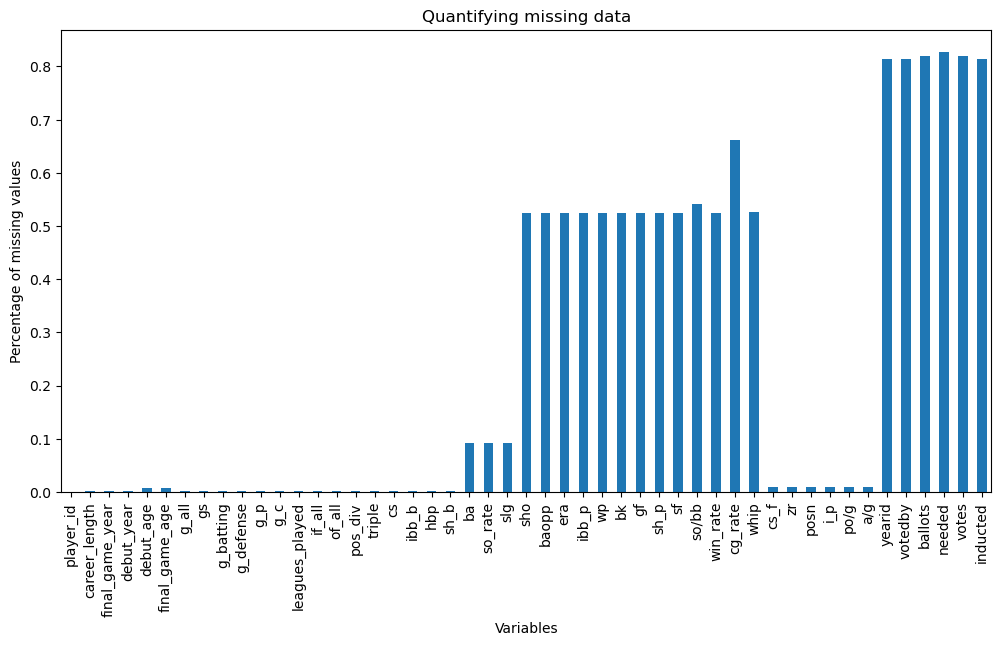

In [3252]:
#Quantify missing data
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

('career_length', 'final_game_age')
('career_length', 'g_all')
('career_length', 'g_batting')
('career_length', 'g_defense')
('career_length', 'leagues_played')
('career_length', 'era')
('career_length', 'i_p')
('final_game_year', 'debut_year')
('final_game_year', 'yearid')
('final_game_year', 'ballots')
('final_game_year', 'needed')
('debut_year', 'yearid')
('debut_year', 'ballots')
('debut_year', 'needed')
('final_game_age', 'leagues_played')
('final_game_age', 'i_p')
('g_all', 'g_batting')
('g_all', 'g_defense')
('g_all', 'leagues_played')
('g_all', 'triple')
('g_all', 'cs')
('g_all', 'hbp')
('g_all', 'i_p')
('g_batting', 'g_defense')
('g_batting', 'leagues_played')
('g_batting', 'triple')
('g_batting', 'cs')
('g_batting', 'hbp')
('g_batting', 'i_p')
('g_defense', 'leagues_played')
('g_defense', 'triple')
('g_defense', 'cs')
('g_defense', 'hbp')
('g_defense', 'sh_b')
('g_defense', 'i_p')
('g_p', 'era')
('g_p', 'wp')
('g_p', 'gf')
('leagues_played', 'era')
('leagues_played', 'i_p')
(

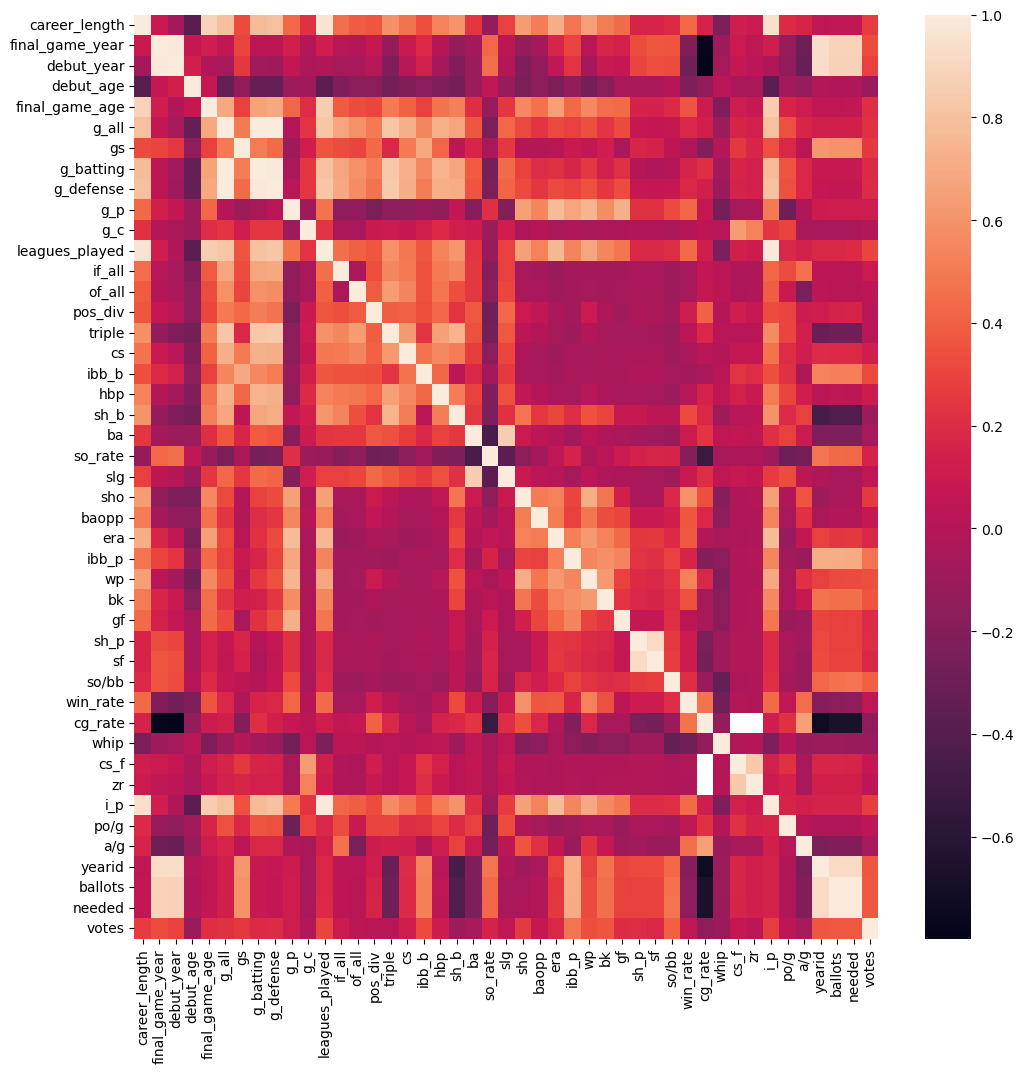

In [3253]:
# # #heatmap of data

# # data_num_cols = [c for c in data.columns if data[c].dtypes != 'O']
# # corr_matrix = data[data_num_cols].corr()
# # high_corr_pairs = []

# # for i in range(len(corr_matrix.columns)):
# #     for j in range(i):
# #         if abs(corr_matrix.iloc[i, j]) > 0.7:
# #             high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# # for pair in high_corr_pairs:
# #     print(pair)
high_corr_pairs(data, False)

In [3254]:
#Data groups
num_cols = [c for c in data.columns if data[c].dtypes !='O']
cat_cols = [c for c in data.columns if data[c].dtypes =='O']

<Axes: >

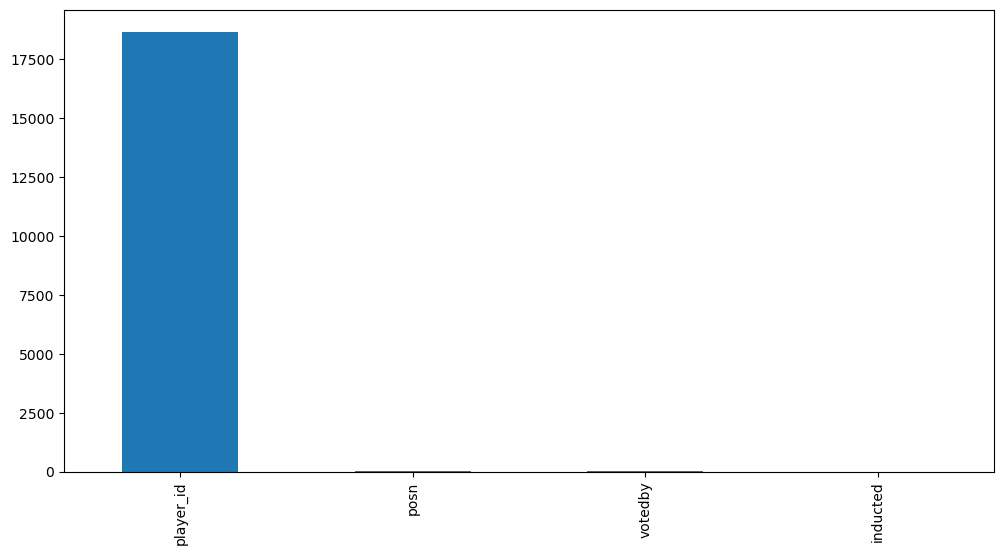

In [3255]:
# Determining Cardinality
#player id has too high cardinaility so i dropped it
data[cat_cols].nunique().plot.bar(figsize=(12,6))

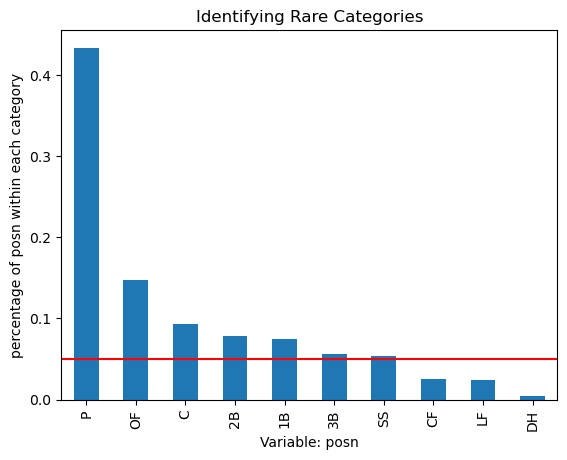

In [3256]:
#Rare categories in posn
posn_freq = data['posn'].value_counts() / len(data)

fig = posn_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of posn within each category')
fig.set_xlabel('Variable: posn')
fig.set_title('Identifying Rare Categories')
plt.show()

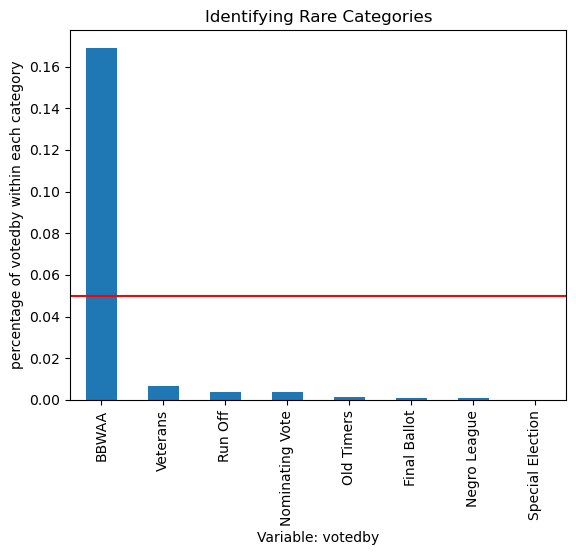

In [3257]:
#Rare categories in posn
votedby_freq = data['votedby'].value_counts() / len(data)

fig = votedby_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of votedby within each category')
fig.set_xlabel('Variable: votedby')
fig.set_title('Identifying Rare Categories')
plt.show()

In [3258]:
#Check values for categorical variables
data[cat_cols].nunique()

player_id    18680
posn            10
votedby          8
inducted         2
dtype: int64

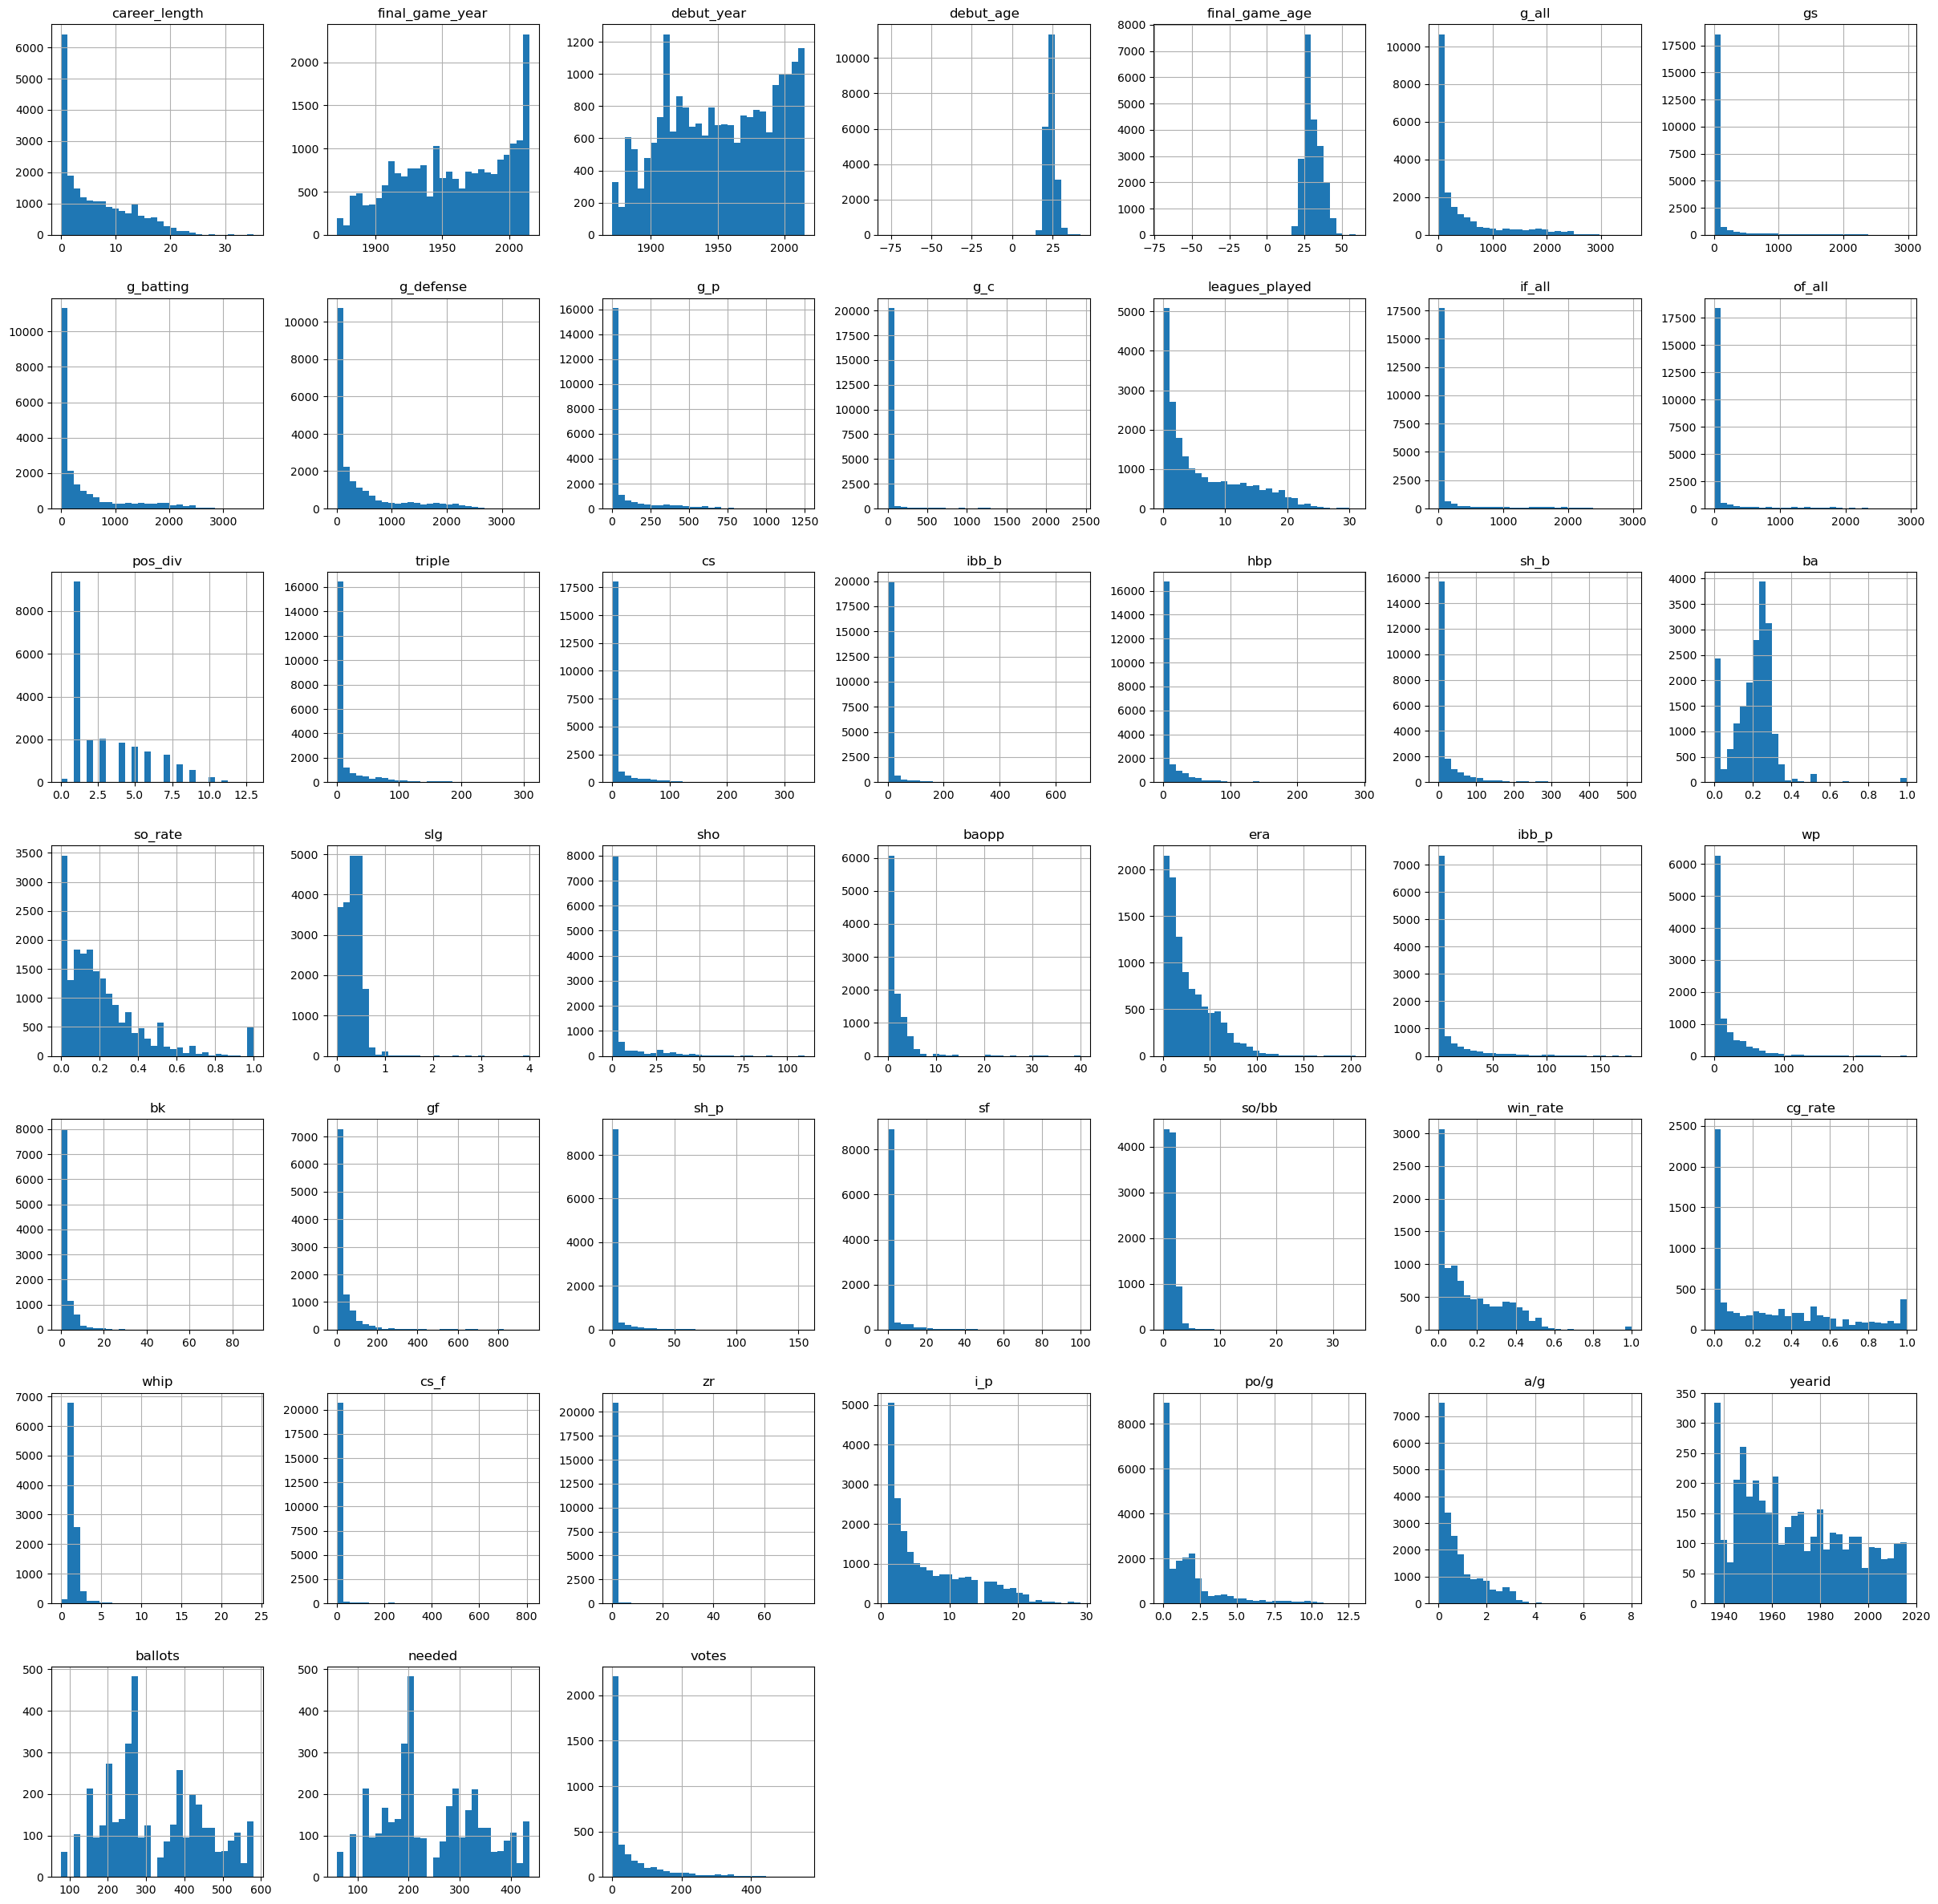

In [3259]:
# # distribution of numerical variables
data[num_cols].hist(bins=30, figsize=(30,30))
plt.show()

### Step 4: Preprocess Final Dataset

In [3260]:
#Encode the categories for 'inducted' (target)

target_dict = {'Y':1, 'N':0}
data['inducted'] = data['inducted'].replace(target_dict)

#fill nulls in target column with 0 assuming those players who did not appear in the hof dataset did were not inducted
data['inducted'] = data['inducted'].fillna(0)
data

player_id  career_length  final_game_year  debut_year  debut_age  \
0      aardsda01      11.386301           2015.0      2004.0       23.0   
1      aaronha01      22.490411           1976.0      1954.0       20.0   
2      aaronto01       9.468493           1971.0      1962.0       23.0   
3       aasedo01      13.197260           1990.0      1977.0       23.0   
4       abadan01       4.591781           2006.0      2001.0       29.0   
...          ...            ...              ...         ...        ...   
21483  suttlmu99            NaN              NaN         NaN        NaN   
21484  taylobe99            NaN              NaN         NaN        NaN   
21485  torricr99            NaN              NaN         NaN        NaN   
21486  wilsoju99            NaN              NaN         NaN        NaN   
21487  nomohid01            NaN              NaN         NaN        NaN   

       final_game_age   g_all     gs  g_batting  g_defense    g_p  g_c  \
0                34.0   331.0    0.0      139.0      331.0  331.0  0.0   
1                42.0  3298.0  288.0     3298.0     3057.0    0.0  0.0   
2                32.0   437.0    0.0      437.0      437.0    0.0  0.0   
3                36.0   448.0    0.0       81.0      448.0  448.0  0.0   
4                34.0    15.0    4.0       15.0        9.0    0.0  0.0   
...               ...     ...    ...        ...        ...    ...  ...   
21483             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21484             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21485             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21486             NaN     NaN    NaN        NaN        NaN    NaN  NaN   
21487             NaN     NaN    NaN        NaN        NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div  triple    cs  ibb_b   hbp  \
0                 9.0     0.0     0.0      1.0     0.0   0.0    0.0   0.0   
1                23.0   260.0  2790.0      9.0    98.0  73.0  293.0  32.0   
2                 7.0   249.0   139.0      7.0     6.0   8.0    3.0   0.0   
3                13.0     0.0     0.0      1.0     0.0   0.0    0.0   0.0   
4                 3.0     8.0     1.0      5.0     0.0   1.0    0.0   0.0   
...               ...     ...     ...      ...     ...   ...    ...   ...   
21483             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21484             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21485             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21486             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   
21487             NaN     NaN     NaN      NaN     NaN   NaN    NaN   NaN   

       sh_b        ba   so_rate       slg  sho  baopp    era  ibb_p    wp  \
0       1.0  0.000000  0.500000  0.000000  0.0  2.314  46.75   22.0  12.0   
1      21.0  0.304998  0.111857  0.673973  NaN    NaN    NaN    NaN   NaN   
2       9.0  0.228814  0.153602  0.391949  NaN    NaN    NaN    NaN   NaN   
3       0.0  0.000000  0.600000  0.000000  5.0  3.210  45.41   45.0  21.0   
4       0.0  0.095238  0.238095  0.095238  NaN    NaN    NaN    NaN   NaN   
...     ...       ...       ...       ...  ...    ...    ...    ...   ...   
21483   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21484   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21485   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21486   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   
21487   NaN       NaN       NaN       NaN  NaN    NaN    NaN    NaN   NaN   

        bk     gf  sh_p    sf     so/bb  win_rate   cg_rate      whip  cs_f  \
0      1.0  141.0  17.0  11.0  1.857923  0.048338       NaN  1.421365   0.0   
1      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
2      NaN    NaN   NaN   NaN       NaN       NaN       NaN       NaN   0.0   
3      3.0  234.0   0.0   0.0  1.402626  0.147321  

In [3261]:
#create new features

#percentage of games played as batter
data['g_batting/g_all'] = data['g_batting']/data['g_all']

#percentage of games played as defense
data['g_defense/g_all'] = data['g_defense']/data['g_all']

#ratio of slugging percentage to batting average
data['slg/ba'] = data['slg'] / (data['ba'])

In [3262]:
#drop columns with more than half nulls 

for col, value in data.isnull().mean().items():
    if value >= 0.5:
        data.drop(columns=col, inplace=True)
        
#drop columns that don't possess significance to career statistics or have high colinearity

data.drop(columns = ['player_id', 'debut_year', 'final_game_age', 'g_all', 'g_batting', 'g_defense', 'i_p', 'zr', 'triple', 'ba'], inplace=True)

#replace infinite values with nulls
data = data.replace([np.inf, -np.inf], np.nan)


data

career_length  final_game_year  debut_age     gs    g_p  g_c  \
0          11.386301           2015.0       23.0    0.0  331.0  0.0   
1          22.490411           1976.0       20.0  288.0    0.0  0.0   
2           9.468493           1971.0       23.0    0.0    0.0  0.0   
3          13.197260           1990.0       23.0    0.0  448.0  0.0   
4           4.591781           2006.0       29.0    4.0    0.0  0.0   
...              ...              ...        ...    ...    ...  ...   
21483            NaN              NaN        NaN    NaN    NaN  NaN   
21484            NaN              NaN        NaN    NaN    NaN  NaN   
21485            NaN              NaN        NaN    NaN    NaN  NaN   
21486            NaN              NaN        NaN    NaN    NaN  NaN   
21487            NaN              NaN        NaN    NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div    cs  ibb_b   hbp  sh_b  \
0                 9.0     0.0     0.0      1.0   0.0    0.0   0.0   1.0   
1                23.0   260.0  2790.0      9.0  73.0  293.0  32.0  21.0   
2                 7.0   249.0   139.0      7.0   8.0    3.0   0.0   9.0   
3                13.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
4                 3.0     8.0     1.0      5.0   1.0    0.0   0.0   0.0   
...               ...     ...     ...      ...   ...    ...   ...   ...   
21483             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   
21484             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   
21485             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   
21486             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   
21487             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   

        so_rate       slg  cs_f posn      po/g       a/g  inducted  \
0      0.500000  0.000000   0.0    P  0.033233  0.087613       0.0   
1      0.111857  0.673973   0.0   OF  2.147533  0.107493       1.0   
2      0.153602  0.391949   0.0   1B  2.845714  0.222857       0.0   
3      0.600000  0.000000   0.0    P  0.149554  0.301339       0.0   
4      0.238095  0.095238   0.0   1B  3.700000  0.100000       0.0   
...         ...       ...   ...  ...       ...       ...       ...   
21483       NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21484       NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21485       NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21486       NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21487       NaN       NaN   NaN  NaN       NaN       NaN       0.0   

       g_batting/g_all  g_defense/g_all    slg/ba  
0             0.419940         1.000000       NaN  
1             1.000000         0.926925  2.209759  
2             1.000000         1.000000  1.712963  
3             0.180804         1.000000       NaN  
4             1.000000         0.600000  1.000000  
...                ...              ...       ...  
21483              NaN              NaN       NaN  
21484              NaN              NaN       NaN  
21485              NaN              NaN       NaN  
21486              NaN              NaN       NaN  
21487              NaN              NaN       NaN  

[21488 rows x 24 columns]

In [3263]:
#analyse the duplicates
#display duplicates seems some duplicates only have inducted as their only non null value, meaning some players were not present across the data sets wduring the merging

data[data.duplicated()]

career_length  final_game_year  debut_age   gs    g_p  g_c  \
61         20.328767           1926.0       24.0  0.0  482.0  0.0   
62         20.328767           1926.0       24.0  0.0  482.0  0.0   
63         20.328767           1926.0       24.0  0.0  482.0  0.0   
64         20.328767           1926.0       24.0  0.0  482.0  0.0   
65         20.328767           1926.0       24.0  0.0  482.0  0.0   
...              ...              ...        ...  ...    ...  ...   
21482            NaN              NaN        NaN  NaN    NaN  NaN   
21483            NaN              NaN        NaN  NaN    NaN  NaN   
21484            NaN              NaN        NaN  NaN    NaN  NaN   
21485            NaN              NaN        NaN  NaN    NaN  NaN   
21486            NaN              NaN        NaN  NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div   cs  ibb_b  hbp  sh_b  \
61               19.0     0.0     0.0      1.0  1.0    0.0  1.0  35.0   
62               19.0     0.0     0.0      1.0  1.0    0.0  1.0  35.0   
63               19.0     0.0     0.0      1.0  1.0    0.0  1.0  35.0   
64               19.0     0.0     0.0      1.0  1.0    0.0  1.0  35.0   
65               19.0     0.0     0.0      1.0  1.0    0.0  1.0  35.0   
...               ...     ...     ...      ...  ...    ...  ...   ...   
21482             NaN     NaN     NaN      NaN  NaN    NaN  NaN   NaN   
21483             NaN     NaN     NaN      NaN  NaN    NaN  NaN   NaN   
21484             NaN     NaN     NaN      NaN  NaN    NaN  NaN   NaN   
21485             NaN     NaN     NaN      NaN  NaN    NaN  NaN   NaN   
21486             NaN     NaN     NaN      NaN  NaN    NaN  NaN   NaN   

       so_rate       slg  cs_f posn      po/g       a/g  inducted  \
61      0.1737  0.328754   0.0    P  0.120332  1.344398       0.0   
62      0.1737  0.328754   0.0    P  0.120332  1.344398       0.0   
63      0.1737  0.328754   0.0    P  0.120332  1.344398       0.0   
64      0.1737  0.328754   0.0    P  0.120332  1.344398       0.0   
65      0.1737  0.328754   0.0    P  0.120332  1.344398       0.0   
...        ...       ...   ...  ...       ...       ...       ...   
21482      NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21483      NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21484      NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21485      NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21486      NaN       NaN   NaN  NaN       NaN       NaN       1.0   

       g_batting/g_all  g_defense/g_all    slg/ba  
61                 1.0              1.0  1.550926  
62                 1.0              1.0  1.550926  
63                 1.0              1.0  1.550926  
64                 1.0              1.0  1.550926  
65                 1.0              1.0  1.550926  
...                ...              ...       ...  
21482              NaN              NaN       NaN  
21483              NaN              NaN       NaN  
21484              NaN              NaN       NaN  
21485              NaN              NaN       NaN  
21486              NaN              NaN       NaN  

[2702 rows x 24 columns]

In [3264]:
#drop duplicates
data = data.drop_duplicates()
data

career_length  final_game_year  debut_age     gs    g_p  g_c  \
0          11.386301           2015.0       23.0    0.0  331.0  0.0   
1          22.490411           1976.0       20.0  288.0    0.0  0.0   
2           9.468493           1971.0       23.0    0.0    0.0  0.0   
3          13.197260           1990.0       23.0    0.0  448.0  0.0   
4           4.591781           2006.0       29.0    4.0    0.0  0.0   
...              ...              ...        ...    ...    ...  ...   
21458       8.156164           1959.0       27.0    0.0  265.0  0.0   
21459       5.915068           1916.0       22.0    0.0    0.0  0.0   
21460       0.079452           2015.0       25.0    1.0   13.0  0.0   
21461            NaN              NaN        NaN    NaN    NaN  NaN   
21487            NaN              NaN        NaN    NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div    cs  ibb_b   hbp  sh_b  \
0                 9.0     0.0     0.0      1.0   0.0    0.0   0.0   1.0   
1                23.0   260.0  2790.0      9.0  73.0  293.0  32.0  21.0   
2                 7.0   249.0   139.0      7.0   8.0    3.0   0.0   9.0   
3                13.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
4                 3.0     8.0     1.0      5.0   1.0    0.0   0.0   0.0   
...               ...     ...     ...      ...   ...    ...   ...   ...   
21458            10.0     0.0     0.0      1.0   1.0    0.0   0.0  16.0   
21459             4.0     3.0   338.0      4.0   0.0    0.0   4.0  31.0   
21460             1.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
21461             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   
21487             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   

        so_rate       slg  cs_f posn      po/g       a/g  inducted  \
0      0.500000  0.000000   0.0    P  0.033233  0.087613       0.0   
1      0.111857  0.673973   0.0   OF  2.147533  0.107493       1.0   
2      0.153602  0.391949   0.0   1B  2.845714  0.222857       0.0   
3      0.600000  0.000000   0.0    P  0.149554  0.301339       0.0   
4      0.238095  0.095238   0.0   1B  3.700000  0.100000       0.0   
...         ...       ...   ...  ...       ...       ...       ...   
21458  0.274648  0.197183   0.0    P  0.169811  0.547170       0.0   
21459  0.108594  0.532031   0.0   OF  2.207602  0.108187       0.0   
21460       NaN       NaN   0.0    P  0.000000  0.230769       0.0   
21461       NaN       NaN   NaN  NaN       NaN       NaN       1.0   
21487       NaN       NaN   NaN  NaN       NaN       NaN       0.0   

       g_batting/g_all  g_defense/g_all    slg/ba  
0             0.419940         1.000000       NaN  
1             1.000000         0.926925  2.209759  
2             1.000000         1.000000  1.712963  
3             0.180804         1.000000       NaN  
4             1.000000         0.600000  1.000000  
...                ...              ...       ...  
21458         1.000000         1.000000  1.333333  
21459         1.000000         1.000000  1.870879  
21460         0.000000         1.000000       NaN  
21461              NaN              NaN       NaN  
21487              NaN              NaN       NaN  

[18786 rows x 24 columns]

In [3265]:
#move inducted to the end of the table

data_cols = [col for col in data.columns if col != 'inducted'] + ['inducted']
data = data[data_cols]
data

career_length  final_game_year  debut_age     gs    g_p  g_c  \
0          11.386301           2015.0       23.0    0.0  331.0  0.0   
1          22.490411           1976.0       20.0  288.0    0.0  0.0   
2           9.468493           1971.0       23.0    0.0    0.0  0.0   
3          13.197260           1990.0       23.0    0.0  448.0  0.0   
4           4.591781           2006.0       29.0    4.0    0.0  0.0   
...              ...              ...        ...    ...    ...  ...   
21458       8.156164           1959.0       27.0    0.0  265.0  0.0   
21459       5.915068           1916.0       22.0    0.0    0.0  0.0   
21460       0.079452           2015.0       25.0    1.0   13.0  0.0   
21461            NaN              NaN        NaN    NaN    NaN  NaN   
21487            NaN              NaN        NaN    NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div    cs  ibb_b   hbp  sh_b  \
0                 9.0     0.0     0.0      1.0   0.0    0.0   0.0   1.0   
1                23.0   260.0  2790.0      9.0  73.0  293.0  32.0  21.0   
2                 7.0   249.0   139.0      7.0   8.0    3.0   0.0   9.0   
3                13.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
4                 3.0     8.0     1.0      5.0   1.0    0.0   0.0   0.0   
...               ...     ...     ...      ...   ...    ...   ...   ...   
21458            10.0     0.0     0.0      1.0   1.0    0.0   0.0  16.0   
21459             4.0     3.0   338.0      4.0   0.0    0.0   4.0  31.0   
21460             1.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
21461             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   
21487             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   

        so_rate       slg  cs_f posn      po/g       a/g  g_batting/g_all  \
0      0.500000  0.000000   0.0    P  0.033233  0.087613         0.419940   
1      0.111857  0.673973   0.0   OF  2.147533  0.107493         1.000000   
2      0.153602  0.391949   0.0   1B  2.845714  0.222857         1.000000   
3      0.600000  0.000000   0.0    P  0.149554  0.301339         0.180804   
4      0.238095  0.095238   0.0   1B  3.700000  0.100000         1.000000   
...         ...       ...   ...  ...       ...       ...              ...   
21458  0.274648  0.197183   0.0    P  0.169811  0.547170         1.000000   
21459  0.108594  0.532031   0.0   OF  2.207602  0.108187         1.000000   
21460       NaN       NaN   0.0    P  0.000000  0.230769         0.000000   
21461       NaN       NaN   NaN  NaN       NaN       NaN              NaN   
21487       NaN       NaN   NaN  NaN       NaN       NaN              NaN   

       g_defense/g_all    slg/ba  inducted  
0             1.000000       NaN       0.0  
1             0.926925  2.209759       1.0  
2             1.000000  1.712963       0.0  
3             1.000000       NaN       0.0  
4             0.600000  1.000000       0.0  
...                ...       ...       ...  
21458         1.000000  1.333333       0.0  
21459         1.000000  1.870879       0.0  
21460         1.000000       NaN       0.0  
21461              NaN       NaN       1.0  
21487              NaN       NaN       0.0  

[18786 rows x 24 columns]

In [3266]:
#create a method that flags out nulls for each row and their cells by returning a string of concatenated 

def null_encrypter(row):
    
    null_indices = [str(idx) for idx, value in enumerate(row) if pd.isna(value)]
    
    return ','.join(null_indices) if null_indices else 'notna'
            

data['null_loc'] = data.apply(null_encrypter, axis=1)

data

C:\Users\Zachariah loy\AppData\Local\Temp\ipykernel_10724\79838788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['null_loc'] = data.apply(null_encrypter, axis=1)


career_length  final_game_year  debut_age     gs    g_p  g_c  \
0          11.386301           2015.0       23.0    0.0  331.0  0.0   
1          22.490411           1976.0       20.0  288.0    0.0  0.0   
2           9.468493           1971.0       23.0    0.0    0.0  0.0   
3          13.197260           1990.0       23.0    0.0  448.0  0.0   
4           4.591781           2006.0       29.0    4.0    0.0  0.0   
...              ...              ...        ...    ...    ...  ...   
21458       8.156164           1959.0       27.0    0.0  265.0  0.0   
21459       5.915068           1916.0       22.0    0.0    0.0  0.0   
21460       0.079452           2015.0       25.0    1.0   13.0  0.0   
21461            NaN              NaN        NaN    NaN    NaN  NaN   
21487            NaN              NaN        NaN    NaN    NaN  NaN   

       leagues_played  if_all  of_all  pos_div    cs  ibb_b   hbp  sh_b  \
0                 9.0     0.0     0.0      1.0   0.0    0.0   0.0   1.0   
1                23.0   260.0  2790.0      9.0  73.0  293.0  32.0  21.0   
2                 7.0   249.0   139.0      7.0   8.0    3.0   0.0   9.0   
3                13.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
4                 3.0     8.0     1.0      5.0   1.0    0.0   0.0   0.0   
...               ...     ...     ...      ...   ...    ...   ...   ...   
21458            10.0     0.0     0.0      1.0   1.0    0.0   0.0  16.0   
21459             4.0     3.0   338.0      4.0   0.0    0.0   4.0  31.0   
21460             1.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
21461             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   
21487             NaN     NaN     NaN      NaN   NaN    NaN   NaN   NaN   

        so_rate       slg  cs_f posn      po/g       a/g  g_batting/g_all  \
0      0.500000  0.000000   0.0    P  0.033233  0.087613         0.419940   
1      0.111857  0.673973   0.0   OF  2.147533  0.107493         1.000000   
2      0.153602  0.391949   0.0   1B  2.845714  0.222857         1.000000   
3      0.600000  0.000000   0.0    P  0.149554  0.301339         0.180804   
4      0.238095  0.095238   0.0   1B  3.700000  0.100000         1.000000   
...         ...       ...   ...  ...       ...       ...              ...   
21458  0.274648  0.197183   0.0    P  0.169811  0.547170         1.000000   
21459  0.108594  0.532031   0.0   OF  2.207602  0.108187         1.000000   
21460       NaN       NaN   0.0    P  0.000000  0.230769         0.000000   
21461       NaN       NaN   NaN  NaN       NaN       NaN              NaN   
21487       NaN       NaN   NaN  NaN       NaN       NaN              NaN   

       g_defense/g_all    slg/ba  inducted  \
0             1.000000       NaN       0.0   
1             0.926925  2.209759       1.0   
2             1.000000  1.712963       0.0   
3             1.000000       NaN       0.0   
4             0.600000  1.000000       0.0   
...                ...       ...       ...   
21458         1.000000  1.333333       0.0   
21459         1.000000  1.870879       0.0   
21460         1.000000       NaN       0.0   
21461              NaN       NaN       1.0   
21487              NaN       NaN       0.0   

                                                null_loc  
0                                                     22  
1                                                  notna  
2                                                  notna  
3                                                     22  
4                                                  notna  
...                                                  ...  
21458                                              notna  
21459                                              notna  
21460                                           14,15,22  
21461  0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...  
21487  0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...  

[18786 rows x 25 columns]

In [3267]:
#fill_nulls
data = data.fillna(0)

data

career_length  final_game_year  debut_age     gs    g_p  g_c  \
0          11.386301           2015.0       23.0    0.0  331.0  0.0   
1          22.490411           1976.0       20.0  288.0    0.0  0.0   
2           9.468493           1971.0       23.0    0.0    0.0  0.0   
3          13.197260           1990.0       23.0    0.0  448.0  0.0   
4           4.591781           2006.0       29.0    4.0    0.0  0.0   
...              ...              ...        ...    ...    ...  ...   
21458       8.156164           1959.0       27.0    0.0  265.0  0.0   
21459       5.915068           1916.0       22.0    0.0    0.0  0.0   
21460       0.079452           2015.0       25.0    1.0   13.0  0.0   
21461       0.000000              0.0        0.0    0.0    0.0  0.0   
21487       0.000000              0.0        0.0    0.0    0.0  0.0   

       leagues_played  if_all  of_all  pos_div    cs  ibb_b   hbp  sh_b  \
0                 9.0     0.0     0.0      1.0   0.0    0.0   0.0   1.0   
1                23.0   260.0  2790.0      9.0  73.0  293.0  32.0  21.0   
2                 7.0   249.0   139.0      7.0   8.0    3.0   0.0   9.0   
3                13.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
4                 3.0     8.0     1.0      5.0   1.0    0.0   0.0   0.0   
...               ...     ...     ...      ...   ...    ...   ...   ...   
21458            10.0     0.0     0.0      1.0   1.0    0.0   0.0  16.0   
21459             4.0     3.0   338.0      4.0   0.0    0.0   4.0  31.0   
21460             1.0     0.0     0.0      1.0   0.0    0.0   0.0   0.0   
21461             0.0     0.0     0.0      0.0   0.0    0.0   0.0   0.0   
21487             0.0     0.0     0.0      0.0   0.0    0.0   0.0   0.0   

        so_rate       slg  cs_f posn      po/g       a/g  g_batting/g_all  \
0      0.500000  0.000000   0.0    P  0.033233  0.087613         0.419940   
1      0.111857  0.673973   0.0   OF  2.147533  0.107493         1.000000   
2      0.153602  0.391949   0.0   1B  2.845714  0.222857         1.000000   
3      0.600000  0.000000   0.0    P  0.149554  0.301339         0.180804   
4      0.238095  0.095238   0.0   1B  3.700000  0.100000         1.000000   
...         ...       ...   ...  ...       ...       ...              ...   
21458  0.274648  0.197183   0.0    P  0.169811  0.547170         1.000000   
21459  0.108594  0.532031   0.0   OF  2.207602  0.108187         1.000000   
21460  0.000000  0.000000   0.0    P  0.000000  0.230769         0.000000   
21461  0.000000  0.000000   0.0    0  0.000000  0.000000         0.000000   
21487  0.000000  0.000000   0.0    0  0.000000  0.000000         0.000000   

       g_defense/g_all    slg/ba  inducted  \
0             1.000000  0.000000       0.0   
1             0.926925  2.209759       1.0   
2             1.000000  1.712963       0.0   
3             1.000000  0.000000       0.0   
4             0.600000  1.000000       0.0   
...                ...       ...       ...   
21458         1.000000  1.333333       0.0   
21459         1.000000  1.870879       0.0   
21460         1.000000  0.000000       0.0   
21461         0.000000  0.000000       1.0   
21487         0.000000  0.000000       0.0   

                                                null_loc  
0                                                     22  
1                                                  notna  
2                                                  notna  
3                                                     22  
4                                                  notna  
...                                                  ...  
21458                                              notna  
21459                                              notna  
21460                                           14,15,22  
21461  0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...  
21487  0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...  

[18786 rows x 25 columns]

In [3268]:
data['inducted'].value_counts()

inducted
0.0    18564
1.0      222
Name: count, dtype: int64

### Step 5: Using SMOTENC to over sample the minority category of the dataset

In [3269]:
#use smotenc to change the ratio to 1:2 for inducted and not inducted respectively, i used smotenc because it can handle the categorical variables

#split the dataset
X = data.drop(columns=['inducted'])
y = data['inducted']


#get the categorical indices
cat_cols = [c for c in X.columns if X[c].dtypes == 'O']
cat_lst = []

for col in cat_cols:
    cat_lst.append(X.columns.get_loc(col))
    
print(cat_cols)
    
#cast objects to string
X[cat_cols] = X[cat_cols].astype(str)

#oversample

smote_nc = SMOTENC(categorical_features = cat_lst, sampling_strategy=0.5, random_state=777)

X_balanced, y_balanced = smote_nc.fit_resample(X, y)

y_balanced.value_counts()

['posn', 'null_loc']


inducted
0.0    18564
1.0     9282
Name: count, dtype: int64

In [3270]:
#create a method that identifies the indices that were flaggged as null and replace them with null
def apply_nulls(row):
    #split the comma delimited text and replace the value at the indices with null
    if row['null_loc'] != 'notna':
        for idx in row['null_loc'].split(','):
            row[int(idx)] = np.nan
    return row
    
#apply the function
X_balanced = X_balanced.apply(apply_nulls, axis=1)

#drop null_loc
X_balanced = X_balanced.drop(columns='null_loc')

X_balanced


career_length  final_game_year  debut_age           gs         g_p  \
0          11.386301      2015.000000  23.000000     0.000000  331.000000   
1          22.490411      1976.000000  20.000000   288.000000    0.000000   
2           9.468493      1971.000000  23.000000     0.000000    0.000000   
3          13.197260      1990.000000  23.000000     0.000000  448.000000   
4           4.591781      2006.000000  29.000000     4.000000    0.000000   
...              ...              ...        ...          ...         ...   
27841      14.000485      1937.013097  19.126637     0.000000    0.000000   
27842      20.233112      1990.355842  21.372871  2037.145573    0.000000   
27843      17.617472      1972.453551  22.000000     0.000000    0.000000   
27844      20.716970      1935.789409  19.361632     0.000000  628.339583   
27845      21.138061      2008.000000  20.879101   667.891232  689.495726   

            g_c  leagues_played       if_all       of_all   pos_div  \
0      0.000000        9.000000     0.000000     0.000000  1.000000   
1      0.000000       23.000000   260.000000  2790.000000  9.000000   
2      0.000000        7.000000   249.000000   139.000000  7.000000   
3      0.000000       13.000000     0.000000     0.000000  1.000000   
4      0.000000        3.000000     8.000000     1.000000  5.000000   
...         ...             ...          ...          ...       ...   
27841  0.189956       15.000000  1632.796948     0.936681  5.000000   
27842  0.000000       21.000000     0.000000  2223.065751  7.000000   
27843  0.000000       18.273224  2546.027275     6.284161  2.092898   
27844  0.000000       21.191840     1.084896     3.361632  4.361632   
27845  0.000000       22.362696     0.000000     0.000000  3.000000   

               cs       ibb_b         hbp        sh_b   so_rate       slg  \
0        0.000000    0.000000    0.000000    1.000000  0.500000  0.000000   
1       73.000000  293.000000   32.000000   21.000000  0.111857  0.673973   
2        8.000000    3.000000    0.000000    9.000000  0.153602  0.391949   
3        0.000000    0.000000    0.000000    0.000000  0.600000  0.000000   
4        1.000000    0.000000    0.000000    0.000000  0.238095  0.095238   
...           ...         ...         ...         ...       ...       ...   
27841   15.342786    0.000000   11.519645  170.556770  0.090203  0.516208   
27842  112.762772  156.169702  101.593070   17.101585  0.221791  0.594512   
27843  113.322374   70.087497   38.748650  129.305968  0.088560  0.455105   
27844    1.000000    0.000000    9.977952   52.402431  0.103556  0.409565   
27845    0.362696    0.000000    2.362696  211.647643  0.250452  0.231294   

       cs_f posn      po/g       a/g  g_batting/g_all  g_defense/g_all  \
0       0.0    P  0.033233  0.087613         0.419940         1.000000   
1       0.0   OF  2.147533  0.107493         1.000000         0.926925   
2       0.0   1B  2.845714  0.222857         1.000000         1.000000   
3       0.0    P  0.149554  0.301339         0.180804         1.000000   
4       0.0   1B  3.700000  0.100000         1.000000         0.600000   
...     ...  ...       ...       ...              ...              ...   
27841   0.0   SS  1.946137  3.157300         1.000000         1.000000   
27842   0.0   OF  1.837526  0.058329         1.000000         0.803021   
27843   0.0   1B  2.836465  2.731818         1.000000         1.000000   
27844   0.0    P  0.334120  1.537589         1.000000         1.000000   
27845   0.0    P  0.426443  1.297411         0.970457         0.964133   

         slg/ba  
0           NaN  
1      2.209759  
2      1.712963  
3           NaN  
4      1.000000  
...         ...  
27841  1.775254  
27842  2.217206  
27843  1.710295  
27844  1.628212  
27845  1.257085  

[27846 rows x 23 columns]

### Step 6: Train and Test Split

In [3271]:
# # let's separate into training and testing set
# X_balanced, y_balanced


X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((19492, 23), (8354, 23))

### Step 7: Missing value imputation

In [3272]:
X_train.isnull().mean()

career_length      0.000257
final_game_year    0.000257
debut_age          0.004976
gs                 0.000103
g_p                0.000103
g_c                0.000103
leagues_played     0.000103
if_all             0.000103
of_all             0.000103
pos_div            0.000103
cs                 0.000103
ibb_b              0.000103
hbp                0.000103
sh_b               0.000103
so_rate            0.068849
slg                0.068849
cs_f               0.007234
posn               0.007234
po/g               0.007234
a/g                0.007234
g_batting/g_all    0.000308
g_defense/g_all    0.000308
slg/ba             0.155192
dtype: float64

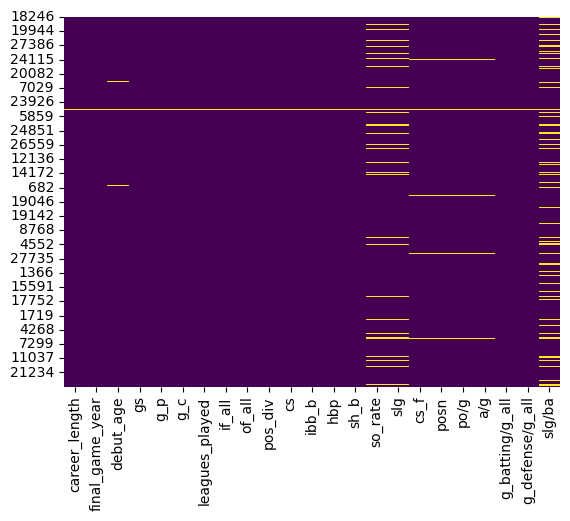

In [3273]:
#determine the what type of missing data for each column
#Heatmap of missing data yellow means missing
#most of the columns with nulls have too few nulls so they are unoticable, strikeout_rate and slugging percentage have similair distributions of
#missing data, slugging and batting average ratio has scattered missing values so it is MCAR. cs_f, posn, po/g ND A/G ALSO HAVE a same distirbution of nulls but they seem to have a pattern so they are either MAR or MNAR
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis')
plt.xticks(ticks=np.arange(len(X_train.columns)) + 0.5, labels=X_train.columns, rotation=90)

plt.show()

In [3274]:
#handle all nulls with median since all data is skewed and have a low percentage are 


median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=[c for c in X_train.columns if X_train[c].dtypes != 'O'])

median_imputer.fit(X_train)

MeanMedianImputer(variables=['career_length', 'final_game_year', 'debut_age',
                             'gs', 'g_p', 'g_c', 'leagues_played', 'if_all',
                             'of_all', 'pos_div', 'cs', 'ibb_b', 'hbp', 'sh_b',
                             'so_rate', 'slg', 'cs_f', 'po/g', 'a/g',
                             'g_batting/g_all', 'g_defense/g_all', 'slg/ba'])

In [3275]:
median_imputer.imputer_dict_

{'career_length': 7.890410958904109,
 'final_game_year': 1953.4879614473246,
 'debut_age': 23.0,
 'gs': 0.0,
 'g_p': 0.0,
 'g_c': 0.0,
 'leagues_played': 8.0,
 'if_all': 0.0,
 'of_all': 0.0,
 'pos_div': 3.0,
 'cs': 0.0,
 'ibb_b': 0.0,
 'hbp': 2.0,
 'sh_b': 8.0,
 'so_rate': 0.13793103448275862,
 'slg': 0.36763305322128853,
 'cs_f': 0.0,
 'po/g': 1.1929203539823008,
 'a/g': 0.5879518072289157,
 'g_batting/g_all': 1.0,
 'g_defense/g_all': 1.0,
 'slg/ba': 1.6}

In [3276]:
# transform the data
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)

In [3277]:
#impute the categorical column with mode

mode_imputer = mdi.CategoricalImputer(variables=['posn'], imputation_method = 'frequent')

mode_imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent', variables=['posn'])

In [3278]:
X_train = mode_imputer.transform(X_train)
X_test = mode_imputer.transform(X_test)

### Step 8: Categorical Data Encoding

In [3279]:
#assume anything below 5% is considered a rare category

temp = data['posn'].value_counts() / len(data)
rare = temp[temp < 0.05].index.values

X_train['posn'] = np.where(X_train['posn'].isin(rare), 'Rare', X_train['posn'])

X_test['posn'] = np.where(X_test['posn'].isin(rare), 'Rare', X_test['posn'])
X_train['posn'].value_counts() / len(X_train)

posn
P       0.410425
OF      0.186025
Rare    0.107634
2B      0.095988
C       0.085522
1B      0.065001
3B      0.049405
Name: count, dtype: float64

In [3280]:
# #Encode categorical variables
# # mean_enc = MeanEncoder(variables=['Loudness'])
# # mean_enc.fit(X_train, y_train)
# 'pos'
ohe_enc = OneHotEncoder(
     top_categories=None,
     variables=['posn'],
     drop_last=True) 
ohe_enc.fit(X_train)
# # ordinal_enc = OrdinalEncoder(
# #      encoding_method='arbitrary',
# #      variables=['Dynamism', 'Loudness'])
# # ordinal_enc.fit(X_train)

# # ordinal_enc = OrdinalEncoder(
# #      encoding_method='ordered')

# # ordinal_enc.fit(X_train, y_train)

OneHotEncoder(drop_last=True, variables=['posn'])

In [3281]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [3282]:
X_train.head()

career_length  final_game_year  debut_age        gs        g_p  g_c  \
18246      14.219178      1972.000000  22.000000  0.000000  482.00000  0.0   
23064      17.304986      1965.758654  22.224554  1.665267  547.76705  0.0   
13394       8.931507      1926.000000  21.000000  0.000000  116.00000  0.0   
2715        0.024658      1978.000000  21.000000  3.000000    0.00000  5.0   
14405       0.063014      1872.000000  24.000000  0.000000    0.00000  0.0   

       leagues_played  if_all  of_all   pos_div   cs  ibb_b       hbp  \
18246       15.000000     0.0     0.0  1.000000  0.0    1.0  2.000000   
23064       17.665267     0.0     0.0  1.555089  0.0    0.0  0.444911   
13394        6.000000     0.0     0.0  1.000000  0.0    0.0  2.000000   
2715         1.000000     0.0     0.0  1.000000  0.0    0.0  0.000000   
14405        0.000000     0.0     7.0  2.000000  0.0    0.0  0.000000   

            sh_b   so_rate       slg  cs_f      po/g       a/g  \
18246  29.000000  0.547809  0.187251   0.0  0.226141  0.510373   
23064  50.576078  0.294390  0.247248   0.0  0.419376  1.259236   
13394  17.000000  0.240838  0.293194   0.0  0.232759  1.646552   
2715    1.000000  0.250000  0.125000   2.0  3.200000  0.600000   
14405   0.000000  0.033333  0.200000   0.0  0.714286  0.142857   

       g_batting/g_all  g_defense/g_all    slg/ba  posn_P  posn_C  posn_OF  \
18246         1.000000         1.000000  1.593220       1       0        0   
23064         0.673963         0.996905  1.363809       1       0        0   
13394         1.000000         1.000000  1.696970       1       0        0   
2715          1.000000         1.000000  1.000000       0       1        0   
14405         1.000000         1.000000  1.000000       0       0        1   

       posn_2B  posn_Rare  posn_3B  
18246        0          0        0  
23064        0          0        0  
13394        0          0        0  
2715         0          0        0  
14405        0          0        0

### Step 9: Capping/Trimming

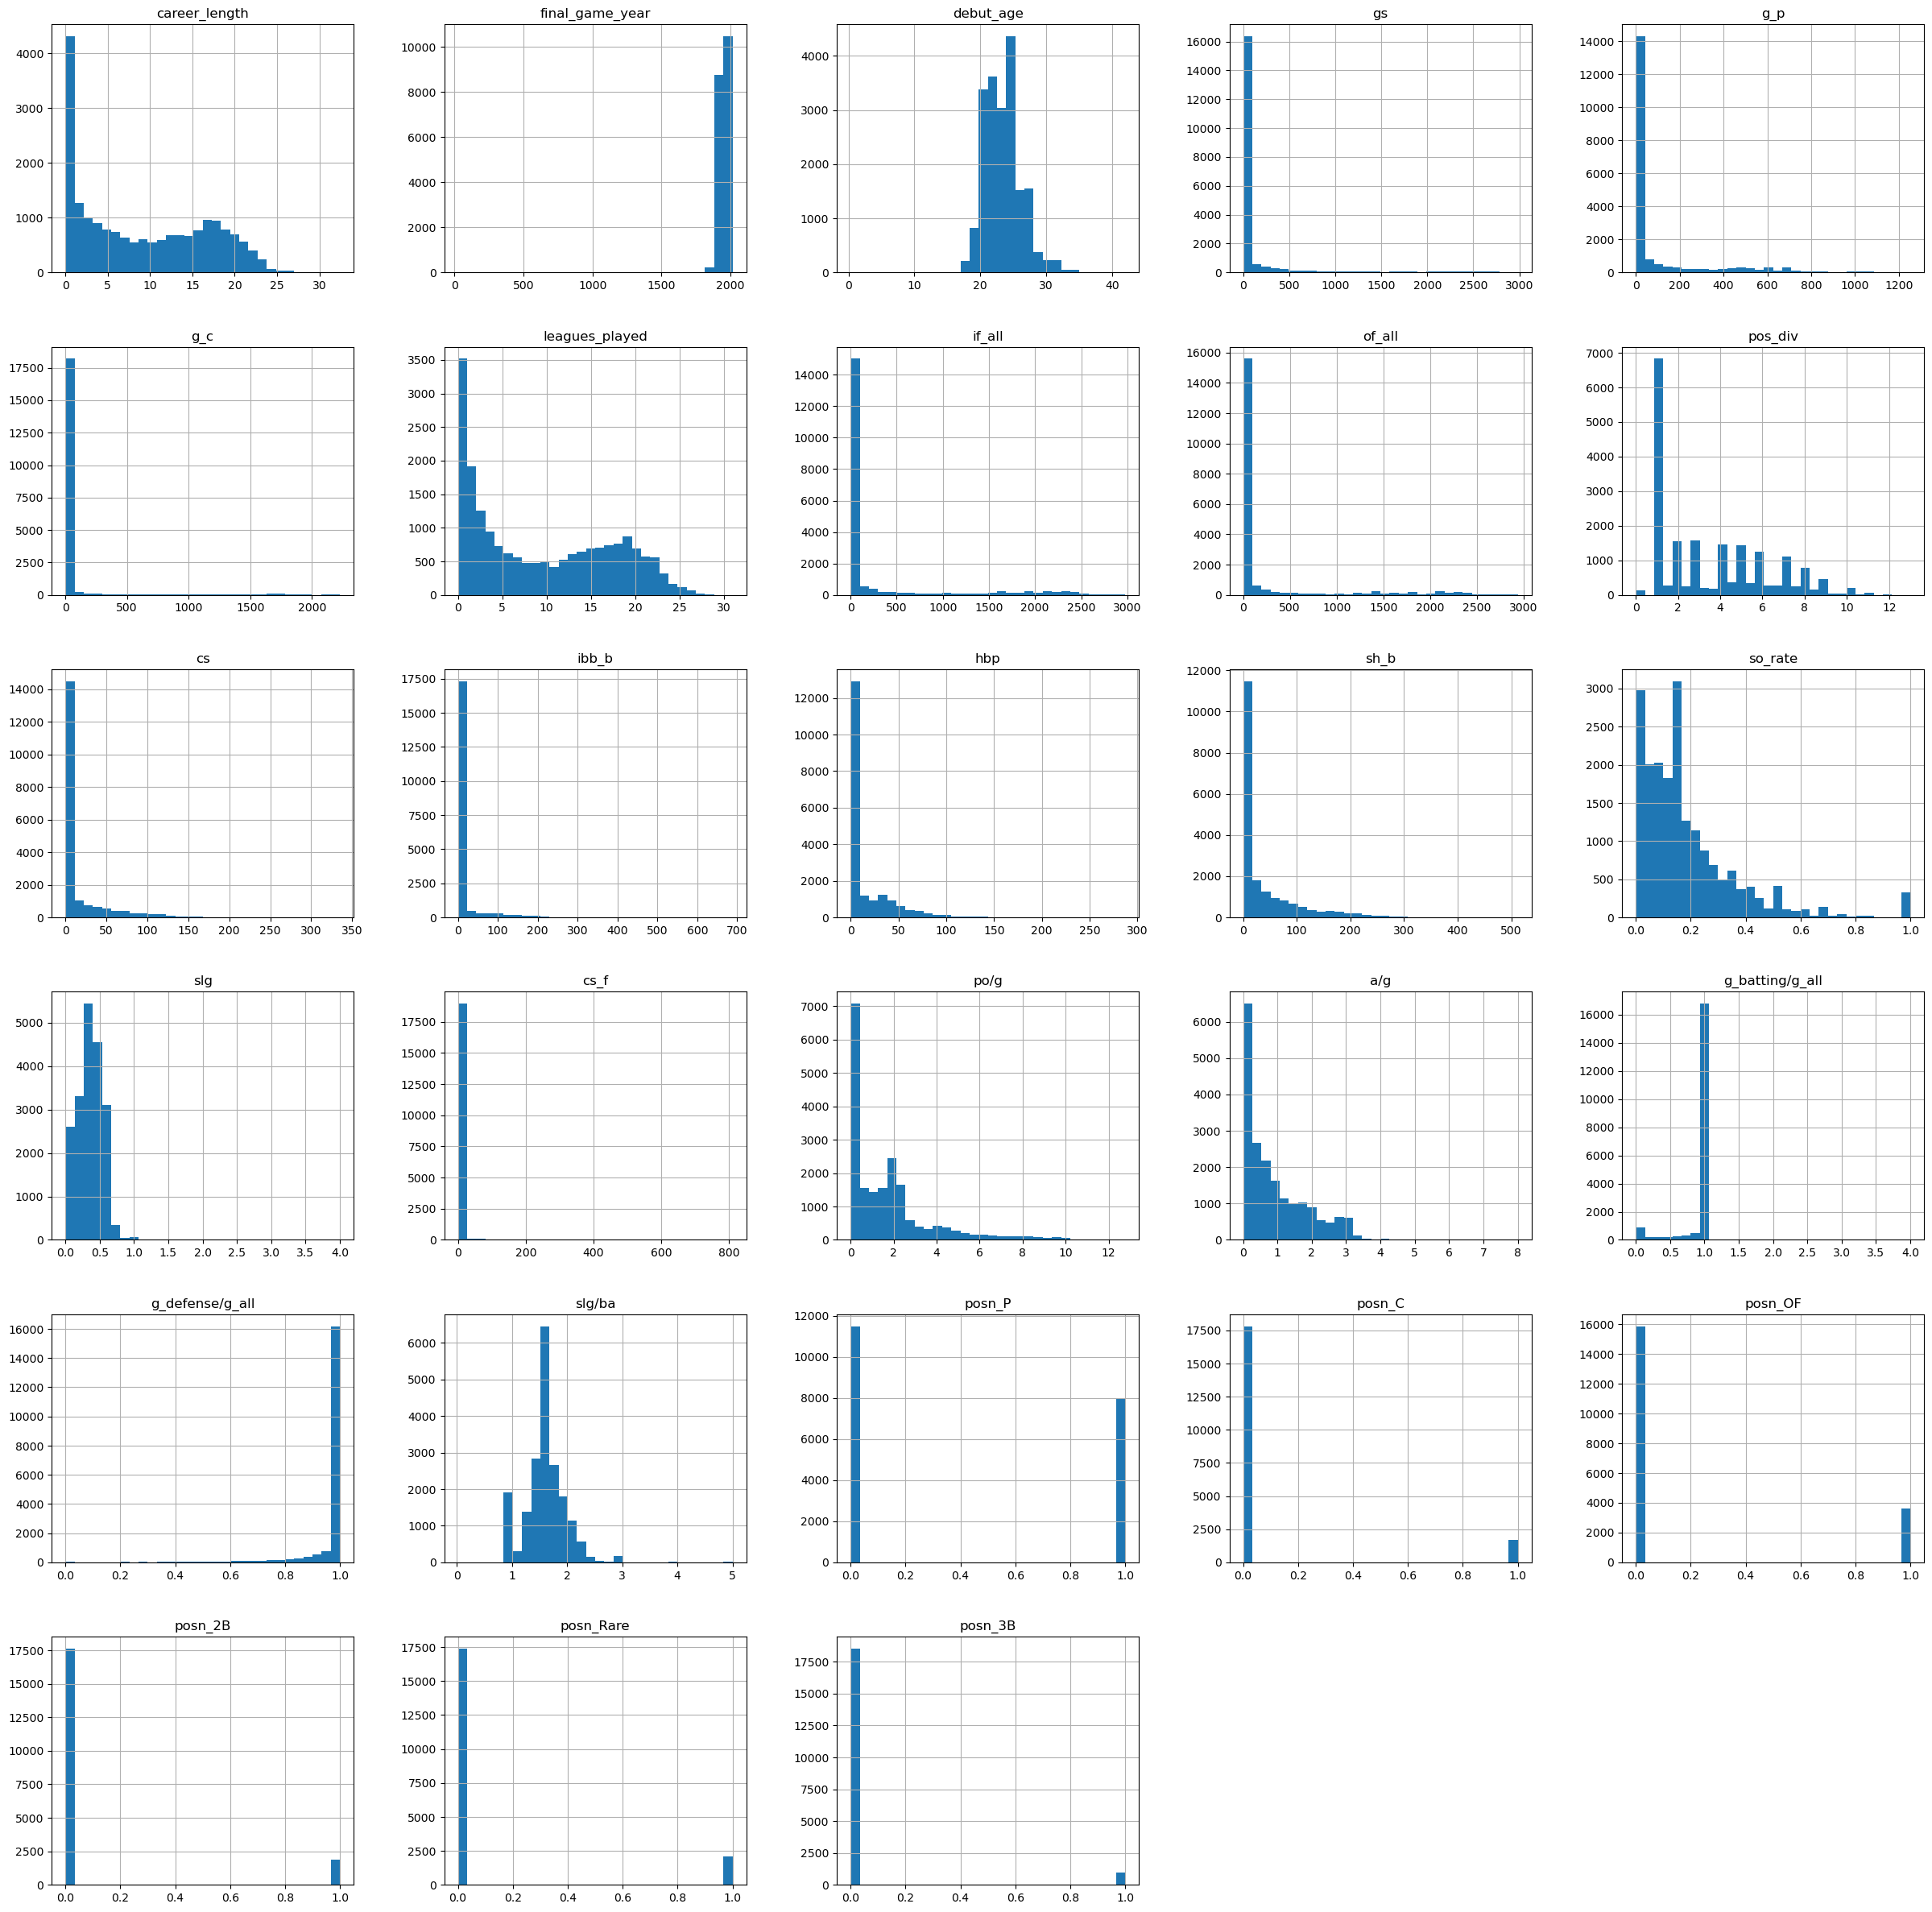

In [3283]:
# distribution of variables
X_train.hist(bins=30, figsize=(30,30))
plt.show()

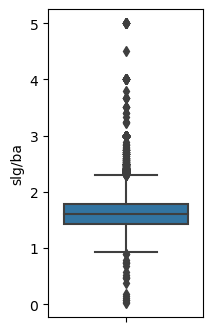

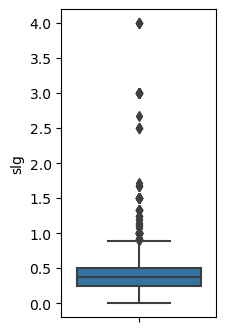

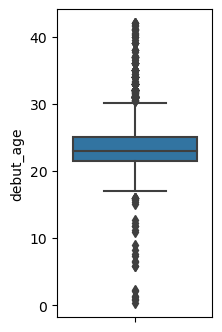

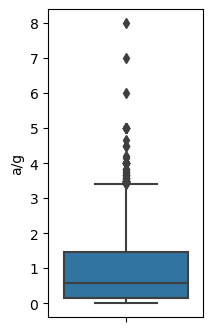

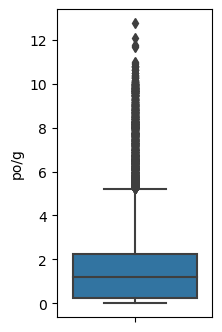

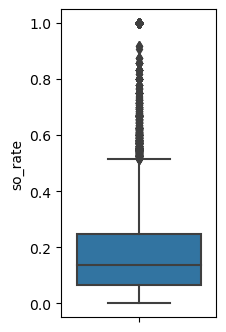

In [3284]:
#Analyse variables that dont have a very skewed distribution since handling its outliers is meaningless for too skewed variables
variables = ['slg/ba', 'slg', 'debut_age', 'a/g', 'po/g', 'so_rate']
for i in variables:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=X_train[i])

In [3285]:
#Cap debut_age,  at 5 and 95 percentile
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='right', # cap left, right or both tails
                        fold =0.05,
                        variables=['po/g', 'a/g'])

windsorizer.fit(X_train)

Winsorizer(capping_method='quantiles', fold=0.05, variables=['po/g', 'a/g'])

In [3286]:
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)

In [3287]:
#cap slg/ba, slg, po/g at right side since it has outliers at that part
windsorizer_normal = Winsorizer(capping_method ='gaussian', 
                        tail='both', # cap left, right or both tails
                        fold =3,
                        variables=['debut_age', 'slg'])

windsorizer_normal.fit(X_train)

Winsorizer(tail='both', variables=['debut_age', 'slg'])

In [3288]:
X_train = windsorizer_normal.transform(X_train)
X_test = windsorizer_normal.transform(X_test)

In [3289]:
#cap slg/ba, slg, po/g at right side since it has outliers at that part
windsorizer_normal_oneside = Winsorizer(capping_method ='gaussian', 
                        tail='right', # cap left, right or both tails
                        fold =3,
                        variables=['slg/ba', 'so_rate'])

windsorizer_normal_oneside.fit(X_train)

Winsorizer(variables=['slg/ba', 'so_rate'])

In [3290]:
X_train = windsorizer_normal_oneside.transform(X_train)
X_test = windsorizer_normal_oneside.transform(X_test)

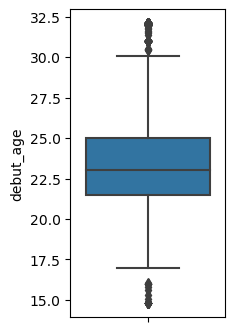

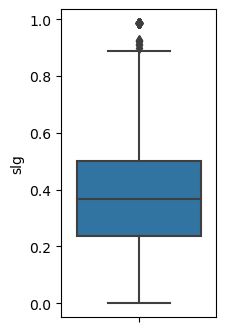

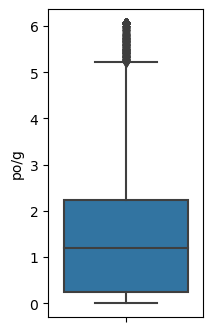

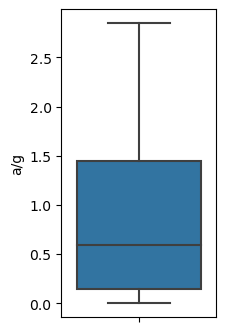

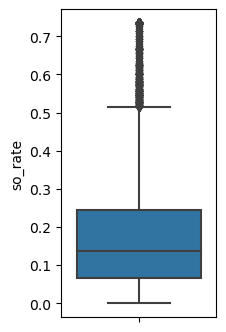

In [3291]:
#some still have outliers such as po/g and slg/ba even after capping 
#Visualise boxplot after
variables = ['debut_age', 'slg', 'po/g', 'a/g', 'so_rate']
for i in variables:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=X_train[i])

### Step 10: Transformation

In [3292]:
#identify columsn with negative values
X_train[['slg/ba', 'slg', 'po/g', 'a/g', 'so_rate']].describe()

slg/ba           slg          po/g           a/g       so_rate
count  19492.000000  19492.000000  19492.000000  19492.000000  19492.000000
mean       1.607170      0.357491      1.611341      0.899380      0.179917
std        0.338644      0.188003      1.687646      0.872796      0.164527
min        0.020784      0.000000      0.000000      0.000000      0.000000
25%        1.428942      0.238041      0.230769      0.147921      0.064993
50%        1.600000      0.367633      1.192920      0.587952      0.137931
75%        1.779393      0.500000      2.229288      1.447557      0.245245
max        2.716253      0.986508      6.063145      2.849232      0.734469

In [3293]:
# # distribution of variables
# X_train.hist(bins=30, figsize=(30,30))
# plt.show()

In [3294]:
#Display histogram and qq plots before transformation
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable, fontsize=14)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

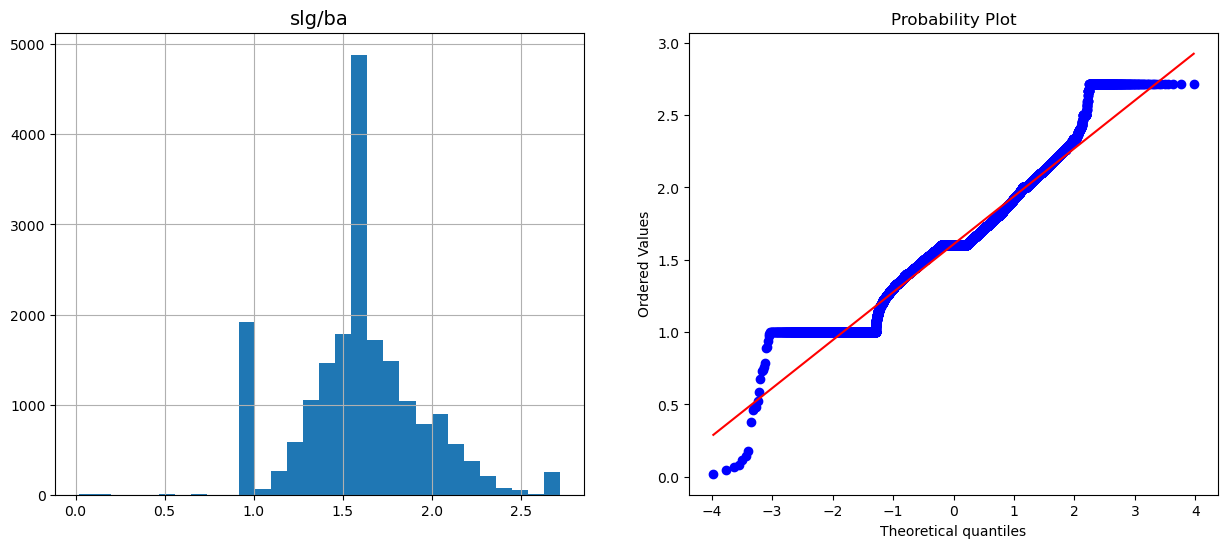

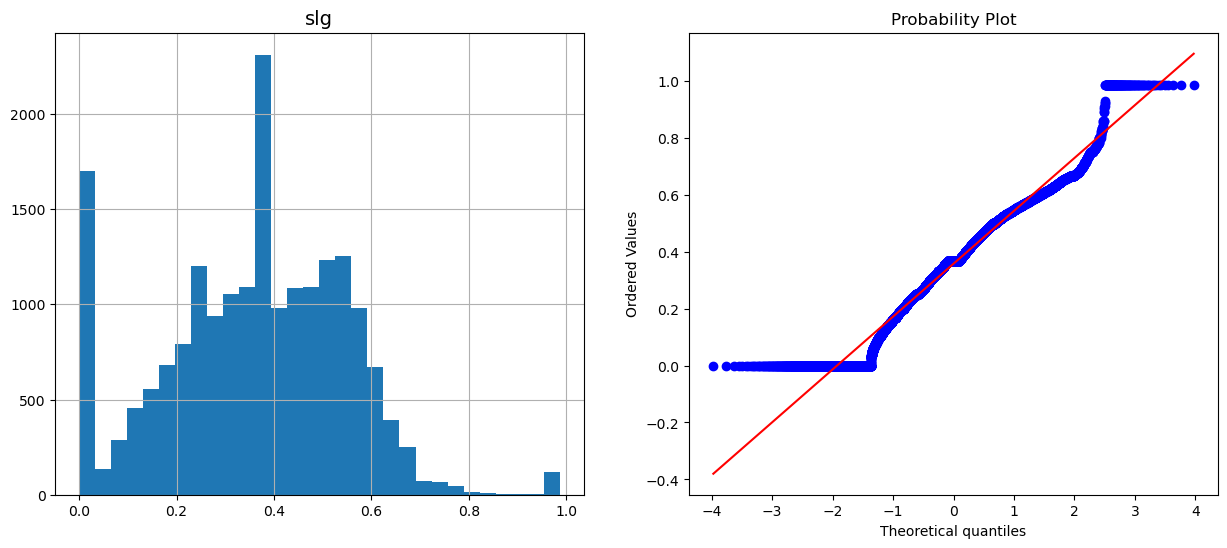

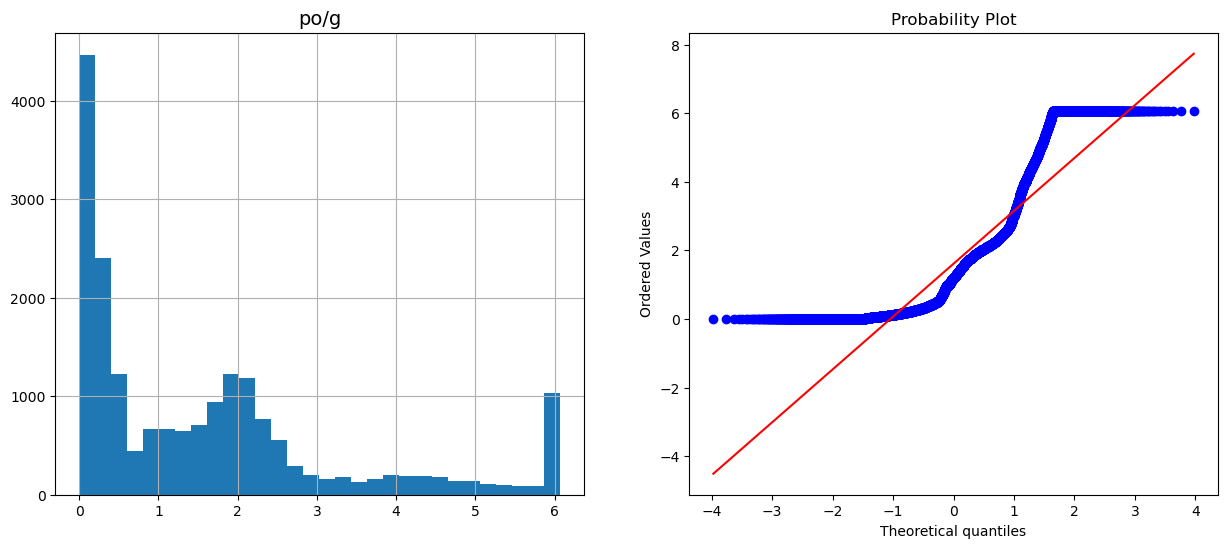

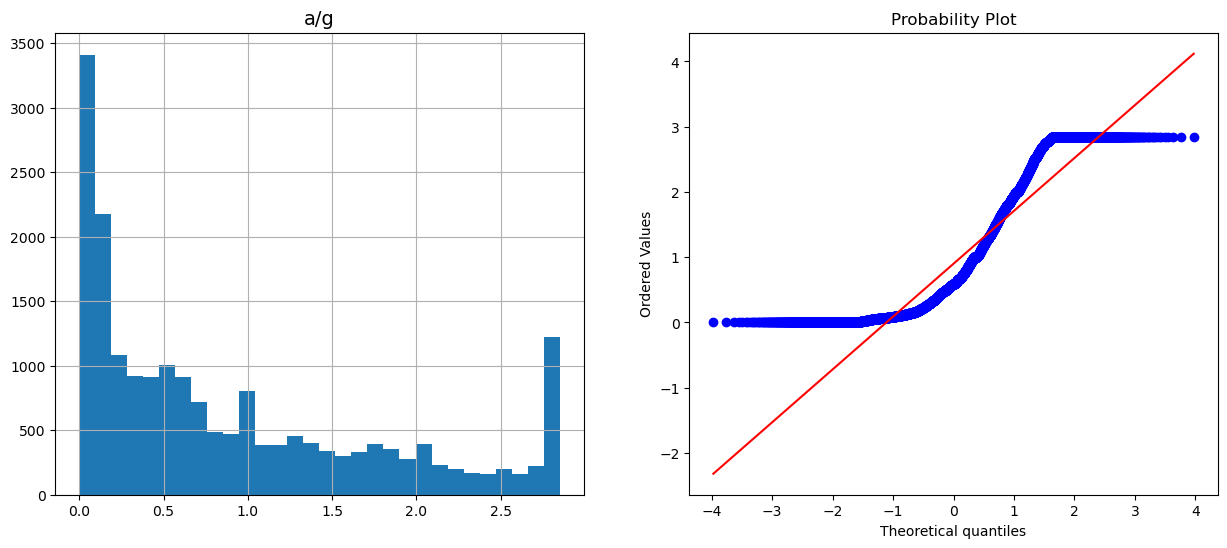

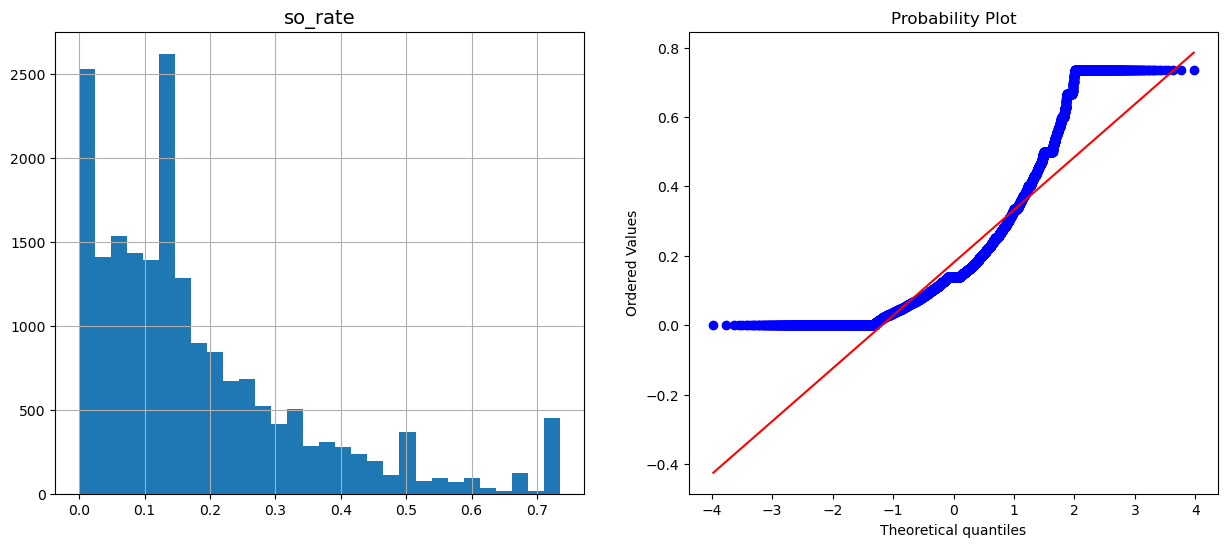

In [3295]:
# variables that have a skewed distribution require stronger transformation, yeo johnson transformation will handle the negative values

variables = ['slg/ba', 'slg', 'po/g', 'a/g', 'so_rate']
for i in variables:
    diagnostic_plots(X_train, i)

In [3296]:
#apply yeo johnson to variables closer to normal distributions

yjt = YeoJohnsonTransformer(variables = ['slg/ba', 'slg', 'po/g', 'a/g', 'so_rate'])

# fit transformer to the dataframe
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['slg/ba', 'slg', 'po/g', 'a/g', 'so_rate'])

In [3297]:
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)
#seems that yeo johnson only did a good job on slg, a/g but ill try others

In [3298]:
# et = PowerTransformer(variables = ['Acousticness', 'Liveness', 'Speechiness'], exp=0.3)

# # fit transformer to data
# et.fit(X_train)
#power transformation only managed to provide little improvement to how well the variable fit the qq plot for extemly right skewed variables so i used a stronger transformation

In [3299]:
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

In [3300]:
#no reciprocal since no negative values

In [3301]:
# # initialize the transformer with a group of variables to transform
# bct = BoxCoxTransformer(variables = ['slg/ba'])

# # fit transformer to the data set
# bct.fit(X_train)

#did not show any changes to the variables and only works with positive values

In [3302]:
# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

In [3303]:
#Log transformation add a very small amount to handle the zeroes
#appling 
# apply log to a so_rate since it is right skewed
# X_train['so_rate'] = np.log(
# X_train[['so_rate']] + 0.001)

# X_test[['so_rate']] = np.log(
# X_test[['so_rate']] + 0.001)

# log transformation ruined the distributions of the highly skewed variables made the qq plot worse too

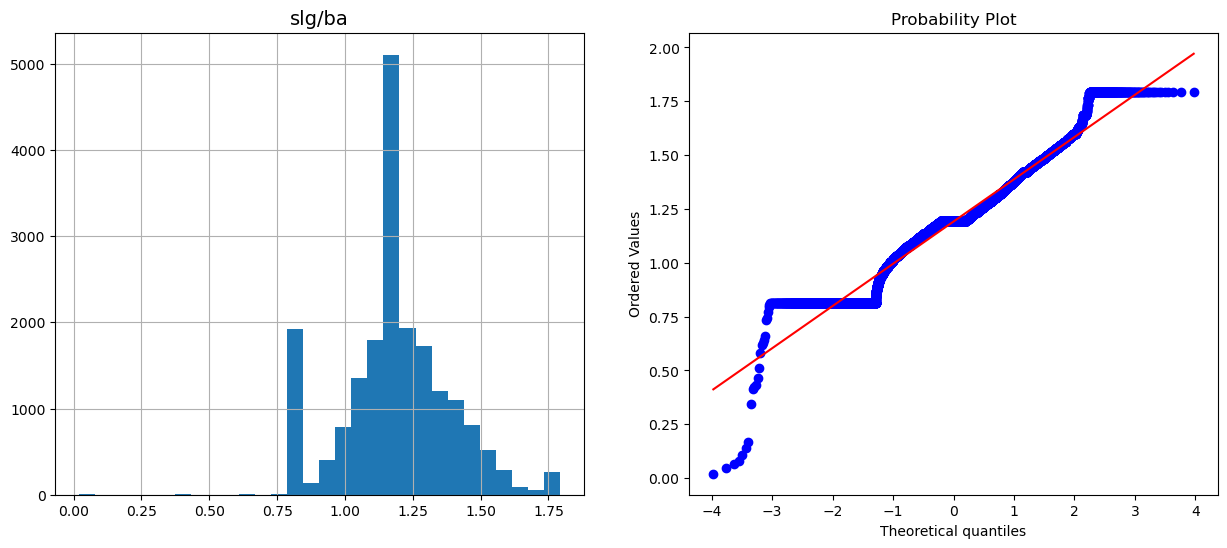

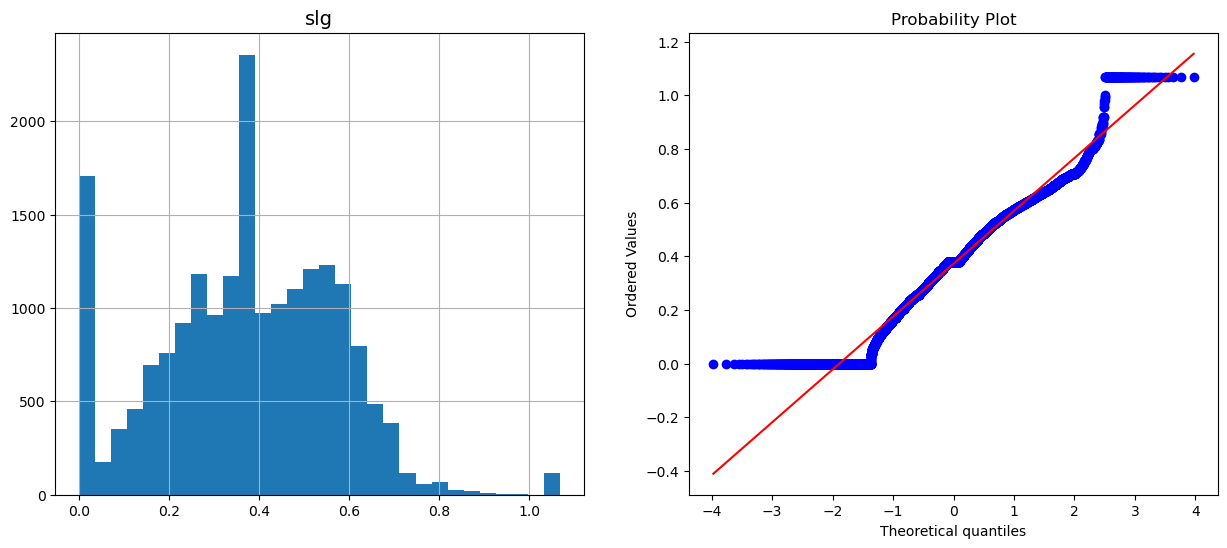

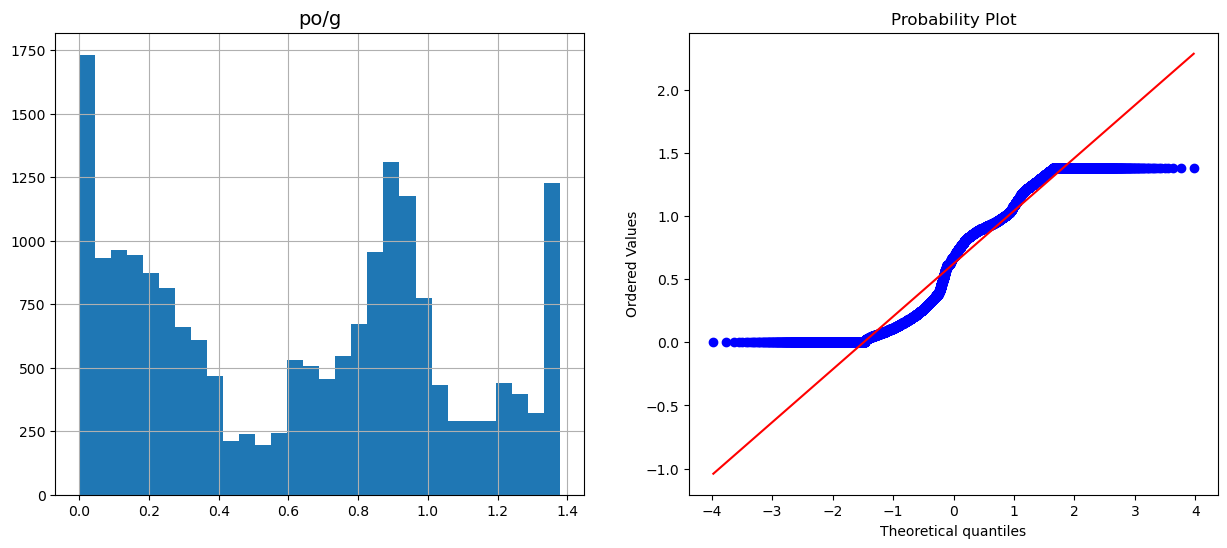

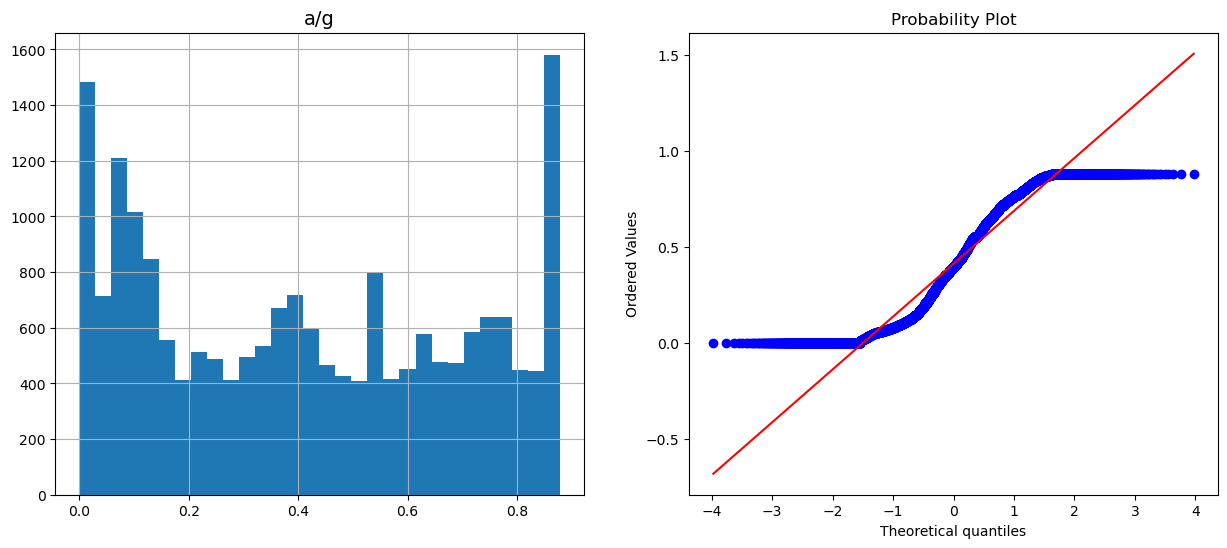

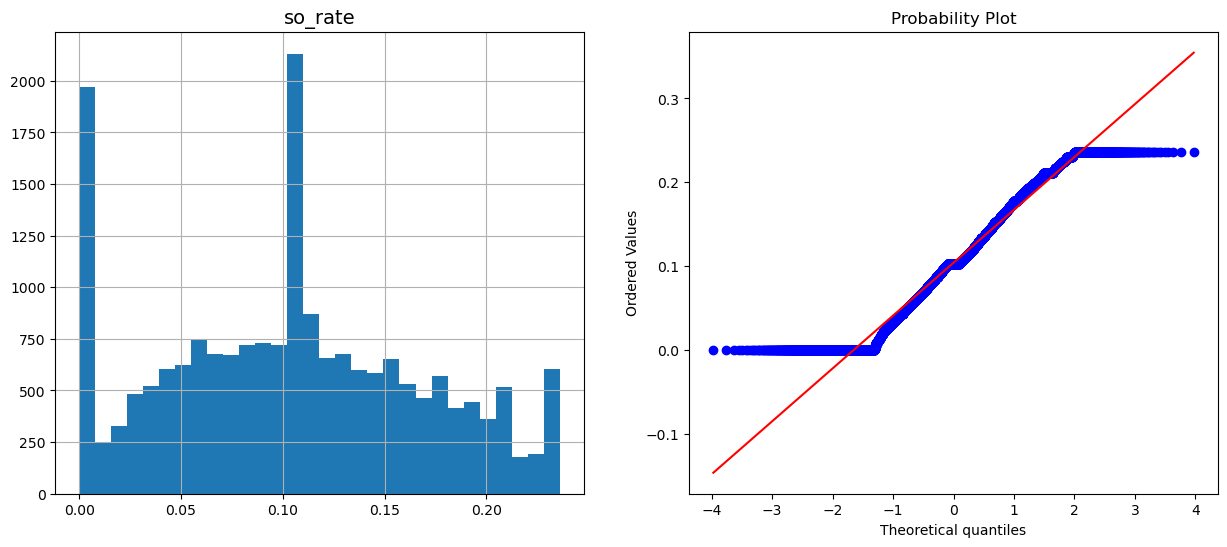

In [3304]:
#review distributions after
variables = ['slg/ba', 'slg', 'po/g', 'a/g', 'so_rate']
for i in variables:
    diagnostic_plots(X_train, i)

### Step 11: Binning/Discretezition

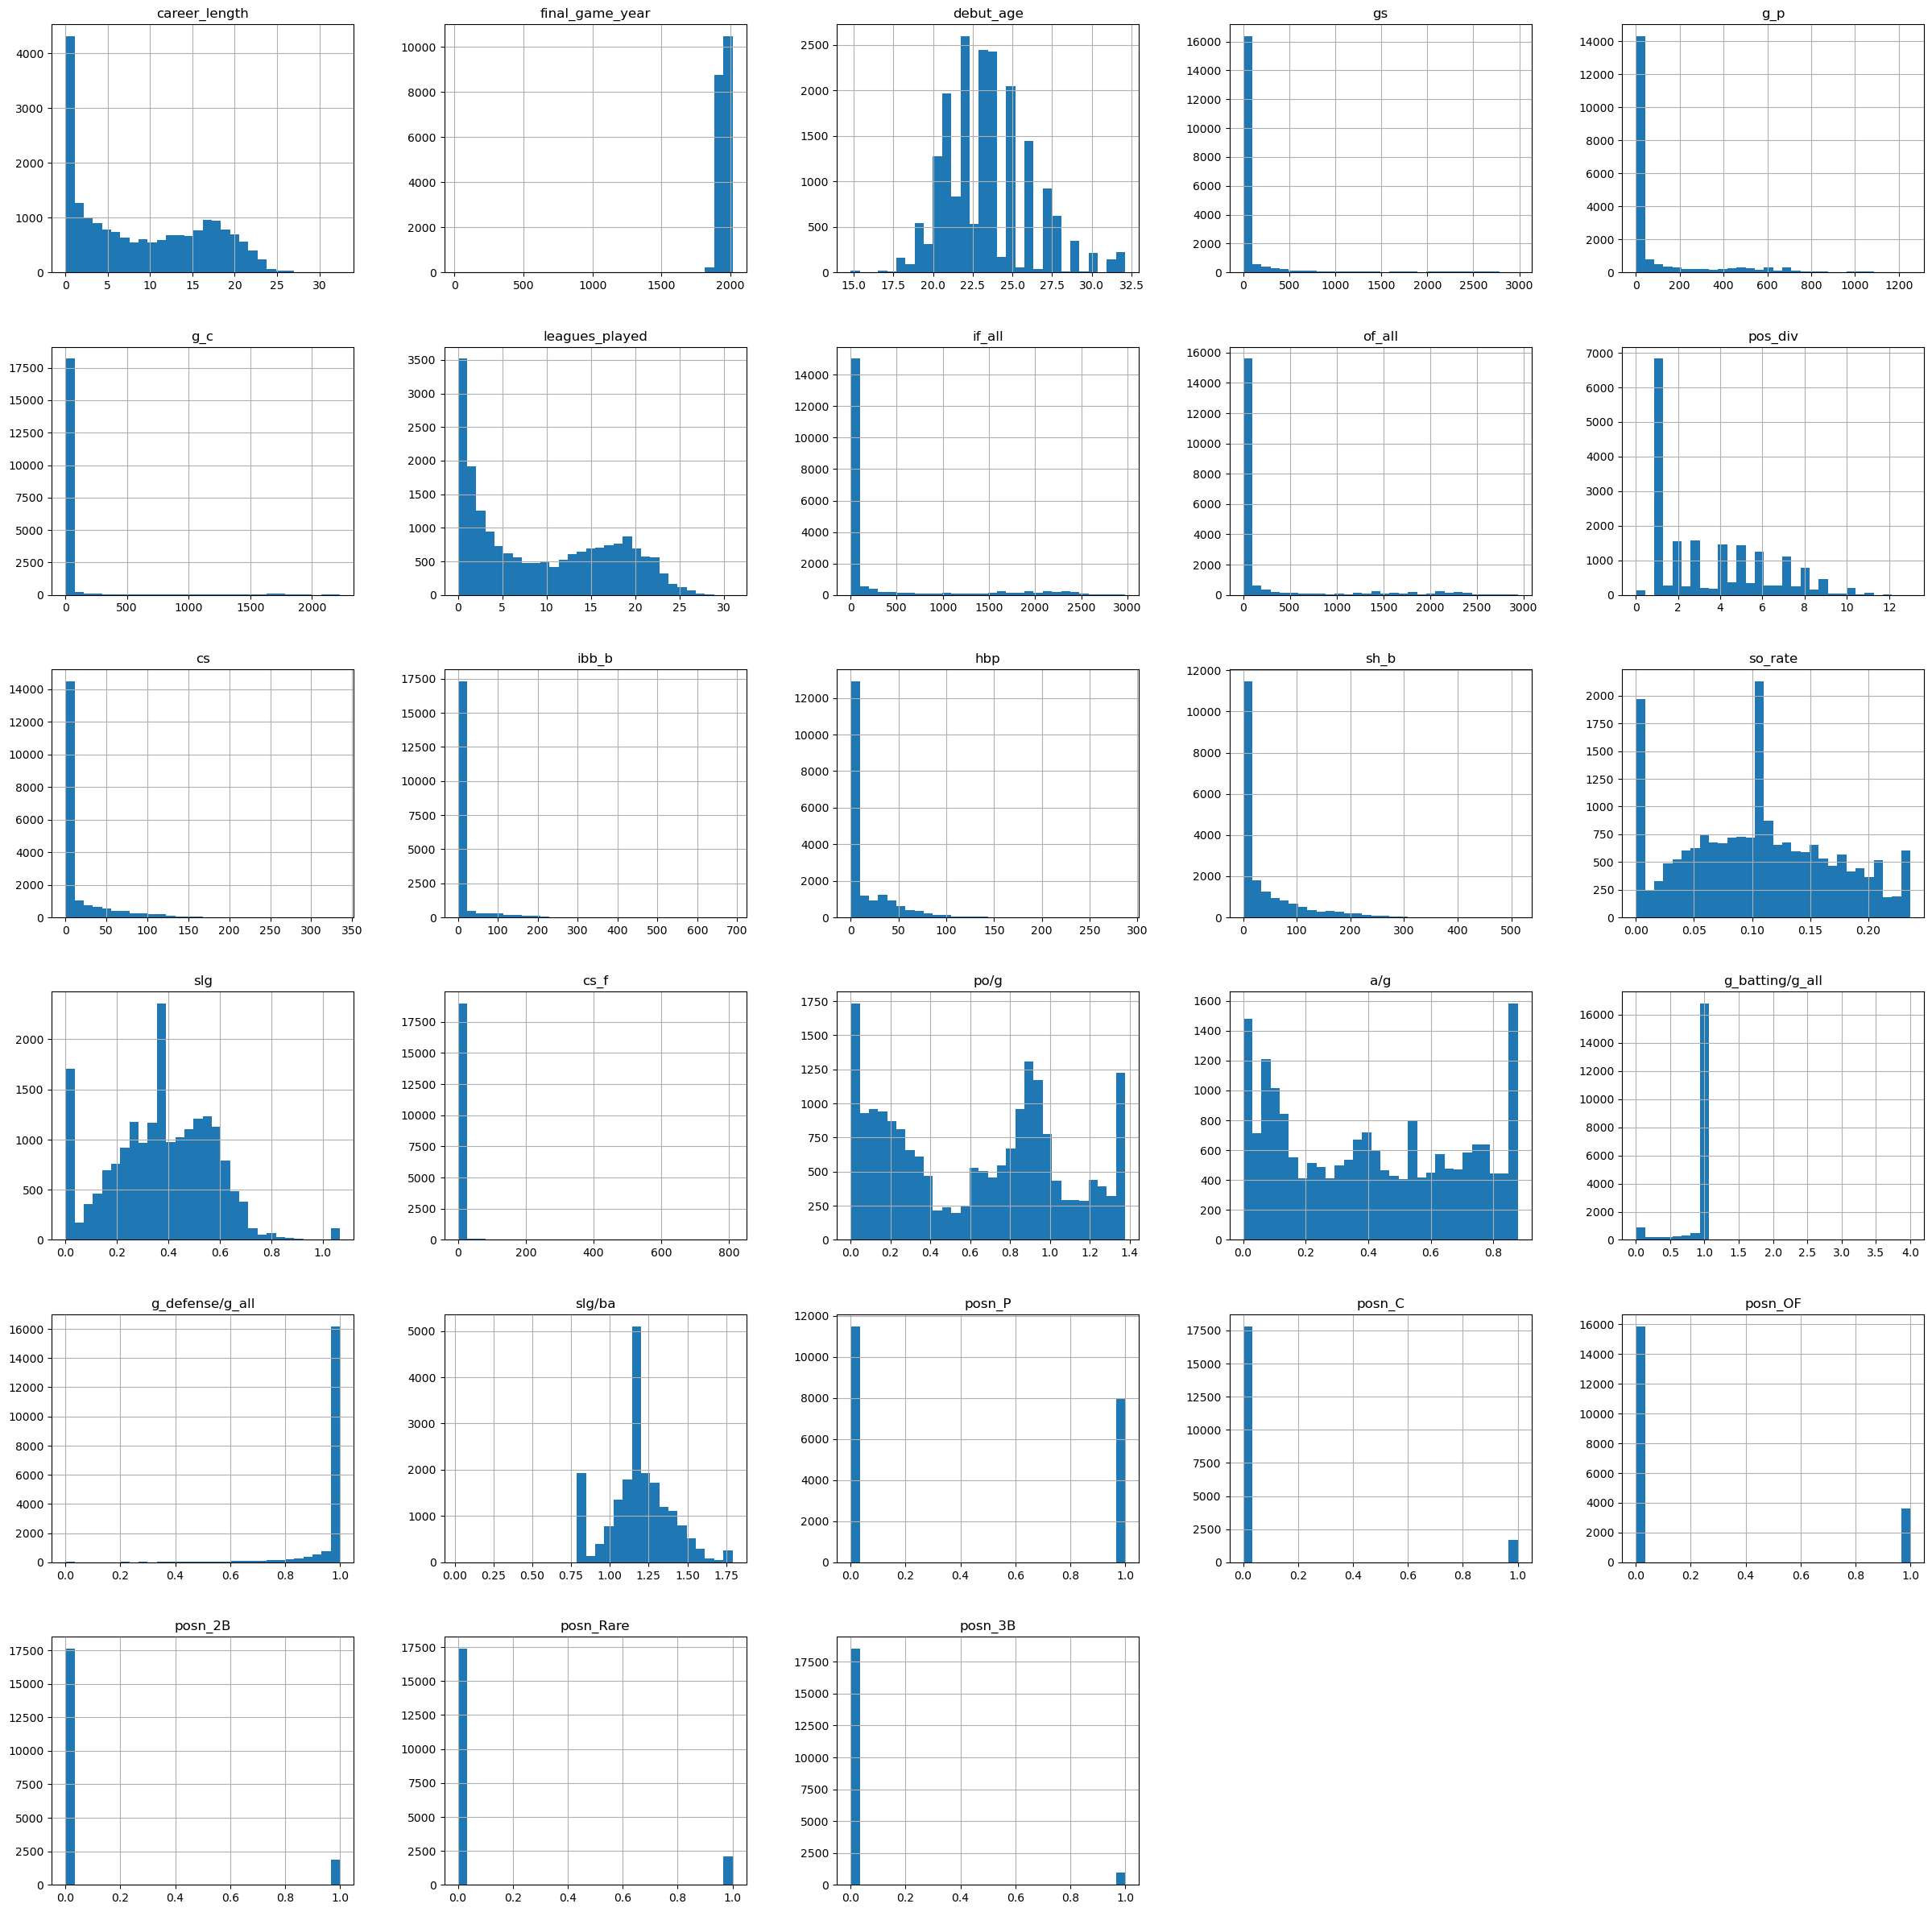

In [3305]:
#Observe distributions
X_train.hist(bins=30, figsize=(30,30))
plt.show()

In [3306]:

#use this binning method for unifrom distributions

disc_eql = EqualWidthDiscretiser(bins=10, variables = ['po/g', 'a/g', 'so_rate'])

disc_eql.fit(X_train)


EqualWidthDiscretiser(variables=['po/g', 'a/g', 'so_rate'])

In [3307]:
# the limits of the intervals are stored in the binner_dict_

disc_eql.binner_dict_

{'po/g': [-inf,
  0.13778699645038356,
  0.2755739929007671,
  0.4133609893511507,
  0.5511479858015342,
  0.6889349822519177,
  0.8267219787023014,
  0.964508975152685,
  1.1022959716030685,
  1.240082968053452,
  inf],
 'a/g': [-inf,
  0.08777223335488918,
  0.17554446670977836,
  0.26331670006466756,
  0.3510889334195567,
  0.43886116677444587,
  0.5266334001293351,
  0.6144056334842243,
  0.7021778668391134,
  0.7899501001940026,
  inf],
 'so_rate': [-inf,
  0.02360279988893459,
  0.04720559977786918,
  0.07080839966680377,
  0.09441119955573836,
  0.11801399944467295,
  0.14161679933360755,
  0.16521959922254212,
  0.18882239911147672,
  0.21242519900041132,
  inf]}

In [3308]:
X_train = disc_eql.transform(X_train)
X_test = disc_eql.transform(X_test)

In [3309]:
#bin variables that are skewed with equal frequency discretization
disc = EqualFrequencyDiscretiser(q=10, variables = ['leagues_played', 'career_length', 'pos_div'])

disc.fit(X_train)


EqualFrequencyDiscretiser(variables=['leagues_played', 'career_length',
                                     'pos_div'])

In [3310]:
disc.binner_dict_

{'leagues_played': [-inf,
  1.0,
  2.0,
  3.0,
  5.0,
  8.0,
  12.0,
  15.0,
  18.0,
  20.450154328084068,
  inf],
 'career_length': [-inf,
  0.07123287671232877,
  0.9232876712328767,
  2.4063013698630167,
  4.857534246575343,
  7.890410958904109,
  11.350278964990395,
  14.527878236188927,
  17.175724619810413,
  19.61323531558479,
  inf],
 'pos_div': [-inf, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.460676489782314, inf]}

In [3311]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

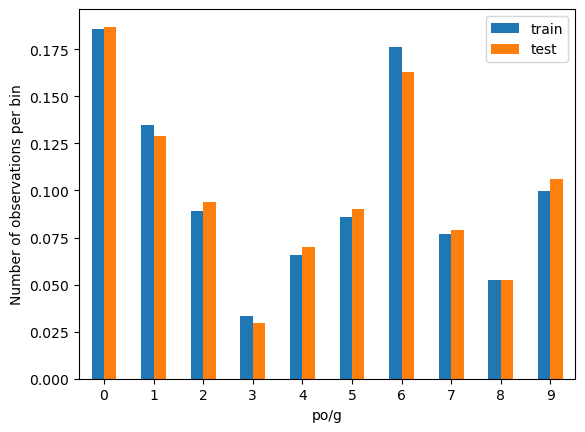

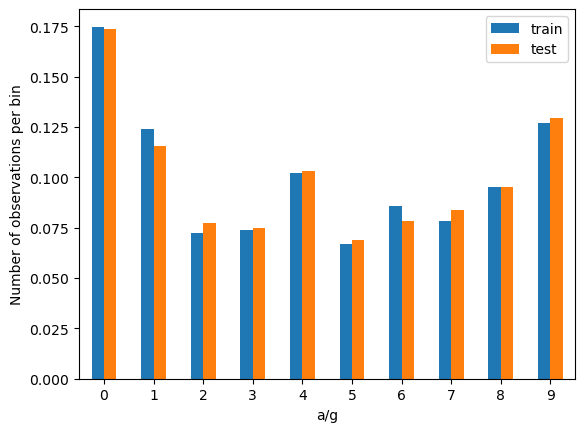

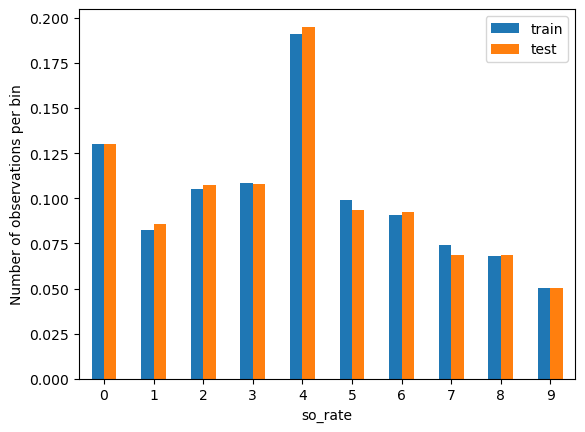

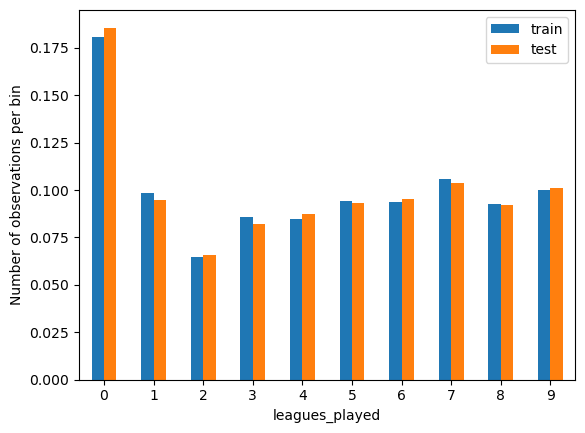

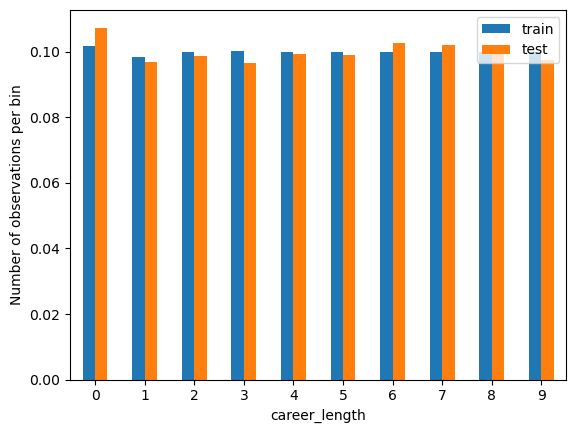

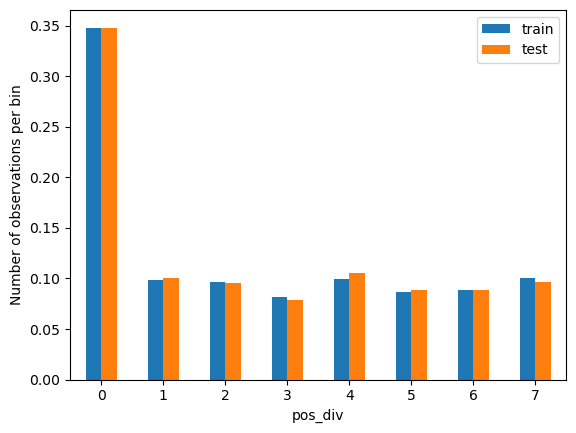

In [3312]:
#Observe distribution of binned continuous variables 
variables = ['po/g', 'a/g', 'so_rate', 'leagues_played', 'career_length', 'pos_div']
for i in variables:
    t1 = X_train.groupby([i])[i].count() / len(X_train)
    t2 = X_test.groupby([i])[i].count() / len(X_test)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

### Step 12: Scaling/Normalization

In [3313]:
#create seperate x train and test with no scaling

X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

In [3314]:
X_train_unscaled.head()

career_length  final_game_year  debut_age        gs        g_p  g_c  \
18246              6      1972.000000  22.000000  0.000000  482.00000  0.0   
23064              8      1965.758654  22.224554  1.665267  547.76705  0.0   
13394              5      1926.000000  21.000000  0.000000  116.00000  0.0   
2715               0      1978.000000  21.000000  3.000000    0.00000  5.0   
14405              0      1872.000000  24.000000  0.000000    0.00000  0.0   

       leagues_played  if_all  of_all  pos_div   cs  ibb_b       hbp  \
18246               6     0.0     0.0        0  0.0    1.0  2.000000   
23064               7     0.0     0.0        1  0.0    0.0  0.444911   
13394               4     0.0     0.0        0  0.0    0.0  2.000000   
2715                0     0.0     0.0        0  0.0    0.0  0.000000   
14405               0     0.0     7.0        1  0.0    0.0  0.000000   

            sh_b  so_rate       slg  cs_f  po/g  a/g  g_batting/g_all  \
18246  29.000000        9  0.190645   0.0     1    4         1.000000   
23064  50.576078        7  0.253084   0.0     2    7         0.673963   
13394  17.000000        6  0.301314   0.0     1    8         1.000000   
2715    1.000000        6  0.126536   2.0     8    4         1.000000   
14405   0.000000        1  0.203861   0.0     3    1         1.000000   

       g_defense/g_all    slg/ba  posn_P  posn_C  posn_OF  posn_2B  posn_Rare  \
18246         1.000000  1.190507       1       0        0        0          0   
23064         0.996905  1.051068       1       0        0        0          0   
13394         1.000000  1.251340       1       0        0        0          0   
2715          1.000000  0.813755       0       1        0        0          0   
14405         1.000000  0.813755       0       0        1        0          0   

       posn_3B  
18246        0  
23064        0  
13394        0  
2715         0  
14405        0

In [3315]:
X_test_unscaled.head()

career_length  final_game_year  debut_age     gs    g_p   g_c  \
10906              1           1875.0       23.0    0.0    0.0  11.0   
6739               5           2015.0       25.0  187.0  305.0   0.0   
7660               5           2015.0       24.0   83.0  240.0   0.0   
9705               2           1902.0       30.0    0.0    5.0   0.0   
9928               1           1911.0       26.0    0.0   18.0   0.0   

       leagues_played  if_all  of_all  pos_div   cs  ibb_b  hbp  sh_b  \
10906               0     0.0     0.0        0  1.0    0.0  0.0   0.0   
6739                5     0.0     0.0        1  0.0    0.0  1.0   6.0   
7660                4     0.0     0.0        0  0.0    0.0  0.0   1.0   
9705                3     0.0     0.0        0  0.0    0.0  0.0   0.0   
9928                0     0.0     0.0        0  0.0    0.0  1.0   0.0   

       so_rate       slg  cs_f  po/g  a/g  g_batting/g_all  g_defense/g_all  \
10906        1  0.177973   0.0     7    2         1.000000         1.000000   
6739         8  0.169369   0.0     2    5         0.130159         0.968254   
7660         9  0.062890   0.0     1    3         0.062500         1.000000   
9705         0  0.135077   0.0     1    7         1.000000         1.000000   
9928         0  0.434710   0.0     0    8         1.000000         1.000000   

         slg/ba  posn_P  posn_C  posn_OF  posn_2B  posn_Rare  posn_3B  
10906  0.813755       0       1        0        0          0        0  
6739   1.233707       1       0        0        0          0        0  
7660   0.813755       1       0        0        0          0        0  
9705   0.813755       1       0        0        0          0        0  
9928   1.215963       1       0        0        0          0        0

In [3316]:
# X_train.hist(bins=30, figsize=(30,30))
# plt.show()

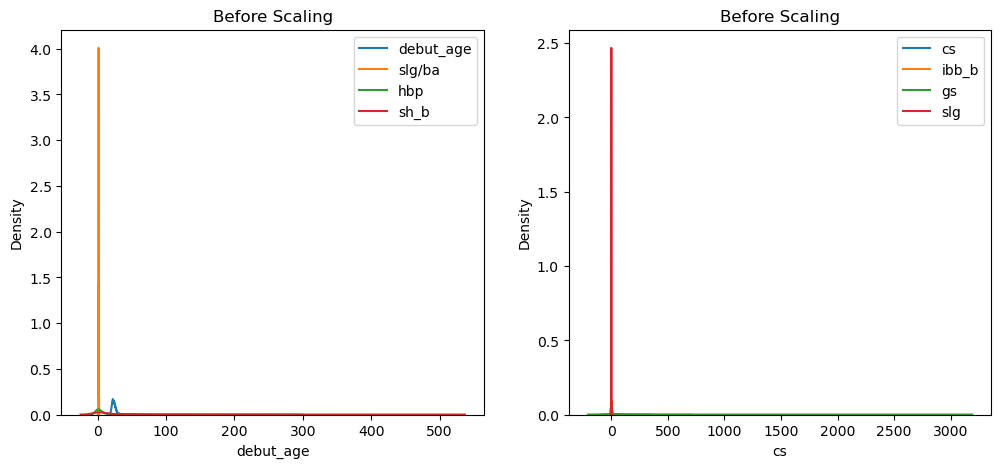

In [3317]:
#before scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['debut_age'], ax=ax1, label ='debut_age')
sns.kdeplot(X_train['slg/ba'], ax=ax1, label ='slg/ba')
sns.kdeplot(X_train['hbp'], ax=ax1, label ='hbp')
sns.kdeplot(X_train['sh_b'], ax=ax1, label ='sh_b')
ax1.legend()

ax2.set_title('Before Scaling')
sns.kdeplot(X_train['cs'], ax=ax2, label ='cs')
sns.kdeplot(X_train['ibb_b'], ax=ax2, label ='ibb_b')
sns.kdeplot(X_train['gs'], ax=ax2, label ='gs')
sns.kdeplot(X_train['slg'], ax=ax2, label ='slg')
ax2.legend()

ax2.legend()
plt.show()

In [3318]:
# fit the scaler to the train set, it will learn the parameters

# transform train and test sets

# X_train_means = X_train.mean(axis=0)
# X_train_ranges = X_train.max(axis=0)-X_train.min(axis=0)
# X_test_means = X_test.mean(axis=0)
# X_test_ranges = X_test.max(axis=0)-X_test.min(axis=0)
# X_train_scaled = (X_train-X_train_means)/X_train_ranges
# X_test_scaled = (X_test-X_test_means)/X_test_ranges

# scaler = MaxAbsScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler = RobustScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train) 
# X_test_scaled = scaler.transform(X_test)


In [3319]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [3320]:
scaler.scale_

array([2.87479806e+00, 6.22775307e+01, 2.74580499e+00, 4.96912282e+02,
       2.07486384e+02, 2.68407465e+02, 3.07633992e+00, 6.65178447e+02,
       6.11618940e+02, 2.51217898e+00, 3.19207546e+01, 3.76302083e+01,
       2.93753000e+01, 6.04600064e+01, 2.61273841e+00, 1.99511177e-01,
       5.07698771e+01, 3.06437174e+00, 3.16933051e+00, 2.38694562e-01,
       1.11734053e-01, 2.00060227e-01, 4.91910847e-01, 2.79657304e-01,
       3.89126871e-01, 2.94574919e-01, 3.09917480e-01, 2.16711886e-01])

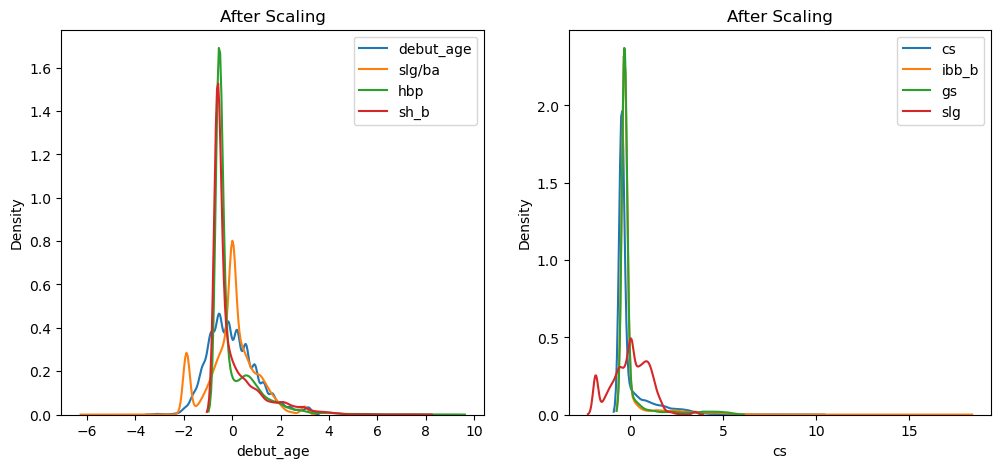

In [3321]:
#after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#after scaling
ax1.set_title('After Scaling')
sns.kdeplot(X_train['debut_age'], ax=ax1, label ='debut_age')
sns.kdeplot(X_train['slg/ba'], ax=ax1, label ='slg/ba')
sns.kdeplot(X_train['hbp'], ax=ax1, label ='hbp')
sns.kdeplot(X_train['sh_b'], ax=ax1, label ='sh_b')
ax1.legend()

ax2.set_title('After Scaling')
sns.kdeplot(X_train['cs'], ax=ax2, label ='cs')
sns.kdeplot(X_train['ibb_b'], ax=ax2, label ='ibb_b')
sns.kdeplot(X_train['gs'], ax=ax2, label ='gs')
sns.kdeplot(X_train['slg'], ax=ax2, label ='slg')
ax2.legend()

ax2.legend()
plt.show()

### Step 13: PCA

In [3322]:
pca = PCA()
pca.fit(X_train)

PCA()

In [3323]:
X_train_scaled = pca.transform(X_train)
X_test_scaled = pca.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
X_test = pd.DataFrame(X_test_scaled, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [3324]:
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

28
[0.25129822 0.10314255 0.09046642 0.08194418 0.07393548 0.04642181
 0.04057313 0.03768568 0.03440429 0.0299715  0.02674723 0.02423441
 0.02236062 0.02058548 0.01672113 0.01499188 0.01235827 0.01112496
 0.0104289  0.00966465 0.00952124 0.00904264 0.00687237 0.00597408
 0.00521873 0.0017419  0.00161223 0.000956  ]


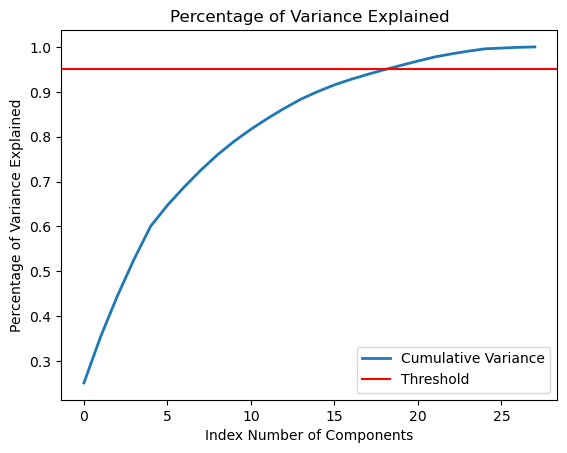

In [3325]:
threshold = 0.95
#Cumilative explained ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_explained_variance, linewidth=2)

plt.axhline (y=threshold, color="red")

plt.title("Percentage of Variance Explained") 
          
plt.xlabel("Index Number of Components")

plt.ylabel("Percentage of Variance Explained")

plt.legend(["Cumulative Variance", "Threshold"])

### Step 14: Machine Learning Modelling

In [3326]:
# #Create copies of X_train and X_test for different models to test their accuracy

# #Logistic Regression
X_train_logreg = X_train.copy()
X_test_logreg = X_test.copy()

# #Naive Baseline
X_train_naives = X_train.copy()
X_test_naives = X_test.copy()

# #Decision Tree Classifier
X_train_dtree = X_train_unscaled.copy()
X_test_dtree = X_test_unscaled.copy()

# #Knn Classifier
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()

#### Naive Baseline

In [3327]:
# # pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

# print(f"The modal class label is {int(modal_class_label)}, \
# and the accompanying string value of this label is {y_labels[modal_class_label]}.")

ModeResult(mode=0.0, count=12989)


In [3328]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [3329]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [3330]:
# # train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 66.64%.
The Naive Baseline Model's accuracy on test data is 66.73%.


#### Logistic regression

In [3331]:
#Fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs') # seems to work here after scaling default sets to binary since target is dichotomous
logreg.fit(X_train_logreg, y_train)

LogisticRegression()

In [3332]:
y_train_preds_logreg = logreg.predict(X_train_logreg)
y_test_preds_logreg = logreg.predict(X_test_logreg)

In [3333]:

# Train accuracy score
y_true_train = y_train
y_pred_train = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true_train, y_pred_train)
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg}")

# Test accuracy score
y_true_test = y_test
y_pred_test = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true_test, y_pred_test)
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg}")

print()
# Train precision score
train_precision_logreg = precision_score(y_true_train, y_pred_train)
print(f"The LogReg Model's precision on train data is {train_precision_logreg}")

# Test precision score
test_precision_logreg = precision_score(y_true_test, y_pred_test)
print(f"The LogReg Model's precision on test data is {test_precision_logreg}")

print()
# Train recall score
train_recall_logreg = recall_score(y_true_train, y_pred_train)
print(f"The LogReg Model's recall on train data is {train_recall_logreg}")

# Test recall score
test_recall_logreg = recall_score(y_true_test, y_pred_test)
print(f"The LogReg Model's recall on test data is {test_recall_logreg}")

print()
#Train f1 score
train_f1_logreg = f1_score(y_true_train, y_pred_train)
print(f"The LogReg Model's F1-score on train data is {train_f1_logreg}")

#Test f1 score
test_f1_logreg = f1_score(y_true_test, y_pred_test)
print(f"The LogReg Model's F1-score on test data is {test_f1_logreg}")



The LogReg Model's accuracy on train data is 0.9562384568027908
The LogReg Model's accuracy on test data is 0.9572659803686857

The LogReg Model's precision on train data is 0.9147093364650617
The LogReg Model's precision on test data is 0.9184519695922598

The LogReg Model's recall on train data is 0.9581731508534522
The LogReg Model's recall on test data is 0.956459157970493

The LogReg Model's F1-score on train data is 0.9359369132557266
The LogReg Model's F1-score on test data is 0.9370703331570598


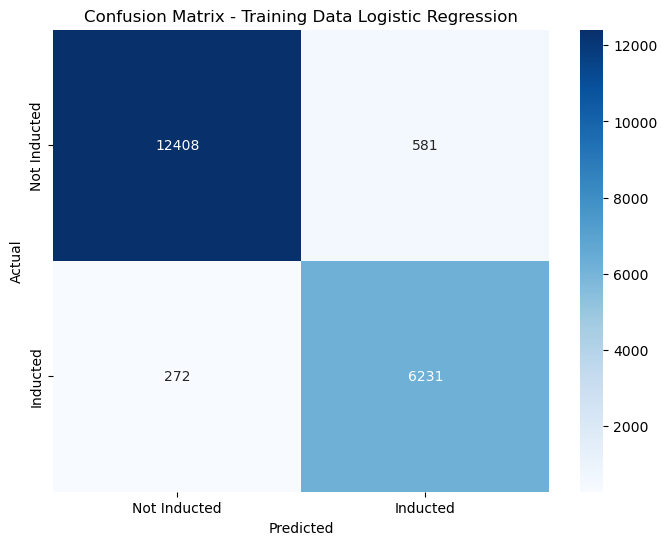

In [3334]:
# Compute confusion matrix for training data
conf_matrix_train = confusion_matrix(y_true_train, y_pred_train)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Inducted', 'Inducted'], yticklabels=['Not Inducted', 'Inducted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Training Data Logistic Regression')
plt.show()


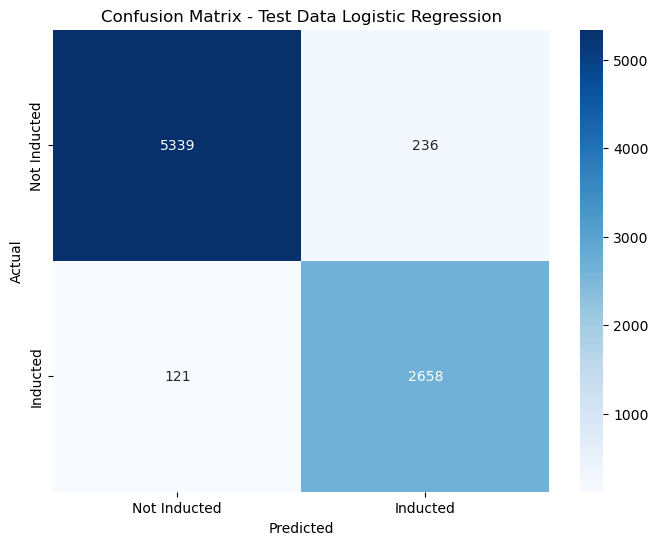

In [3335]:
# Compute confusion matrix for test data
conf_matrix_test = confusion_matrix(y_true_test, y_pred_test)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Inducted', 'Inducted'], yticklabels=['Not Inducted', 'Inducted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Test Data Logistic Regression')
plt.show()


In [3336]:
#analyse consistency in performance across different subsets of the x train
logreg_crossval = cross_val_score(logreg, X_train_logreg, y_train, cv=5)
logreg_crossval

array([0.95768146, 0.95255194, 0.95997948, 0.95433556, 0.95305285])

In [3337]:
#print the standard deviation of the cross validation
logreg_crossval.std()

0.0028586002008956467

In [3338]:
# Decision tree (no need scale)
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train_dtree, y_train)

DecisionTreeClassifier(random_state=0)

In [3339]:
y_train_preds_dtree = dtree.predict(X_train_dtree)
y_test_preds_dtree = dtree.predict(X_test_dtree)

In [3340]:
# train accuracy score
y_true_train = y_train
y_pred_train = y_train_preds_dtree

train_accuracy_dtree = accuracy_score(y_true_train, y_pred_train)
print(f"The DTree Model's accuracy on train data is {train_accuracy_dtree}")

# test accuracy score
y_true_test = y_test
y_pred_test = y_test_preds_dtree

test_accuracy_dtree = accuracy_score(y_true_test, y_pred_test)
print(f"The DTRee Model's accuracy on test data is {test_accuracy_dtree}")

print()
# Train precision score
train_precision_dtree = precision_score(y_true_train, y_pred_train)
print(f"The DTree Model's precision on train data is {train_precision_dtree}")

# Test precision score
test_precision_dtree = precision_score(y_true_test, y_pred_test)
print(f"The DTree Model's precision on test data is {test_precision_dtree}")

print()
# Train recall score
train_recall_dtree = recall_score(y_true_train, y_pred_train)
print(f"The DTree Model's recall on train data is {train_recall_dtree}")

# Test recall score
test_recall_dtree = recall_score(y_true_test, y_pred_test)
print(f"The DTree Model's recall on test data is {test_recall_dtree}")

print()
#Train f1 score
train_f1_dtree = f1_score(y_true_train, y_pred_train)
print(f"The DTree Model's F1-score on train data is {train_f1_dtree}")

#Test f1 score
test_f1_dtree = f1_score(y_true_test, y_pred_test)
print(f"The DTree Model's F1-score on test data is {test_f1_dtree}")


The DTree Model's accuracy on train data is 0.995587933511184
The DTRee Model's accuracy on test data is 0.9706727316255686

The DTree Model's precision on train data is 1.0
The DTree Model's precision on test data is 0.9557553956834532

The DTree Model's recall on train data is 0.986775334461018
The DTree Model's recall on test data is 0.9560993163008277

The DTree Model's F1-score on train data is 0.993343653250774
The DTree Model's F1-score on test data is 0.9559273250584638


#### K Nearest Neighbours

In [3341]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=4)

In [3342]:
y_train_preds_knn = knn.predict(X_train_knn)
y_test_preds_knn = knn.predict(X_test_knn)

In [3343]:
# train accuracy score
y_true_train = y_train
y_pred_train = y_train_preds_knn

train_accuracy_knn = accuracy_score(y_true_train, y_pred_train)
print(f"The Knn Model's accuracy on train data is {train_accuracy_knn}")

# test accuracy score
y_true_test = y_test
y_pred_test = y_test_preds_knn

test_accuracy_knn = accuracy_score(y_true_test, y_pred_test)
print(f"The Knn Model's accuracy on test data is {test_accuracy_knn}")

print()
# Train precision score
train_precision_knn = precision_score(y_true_train, y_pred_train)
print(f"The Knn Model's precision on train data is {train_precision_knn}")

# Test precision score
test_precision_knn = precision_score(y_true_test, y_pred_test)
print(f"The Knn Model's precision on test data is {test_precision_knn}")

print()
# Train recall score
train_recall_knn = recall_score(y_true_train, y_pred_train)
print(f"The Knn Model's recall on train data is {train_recall_knn}")

# Test recall score
test_recall_knn = recall_score(y_true_test, y_pred_test)
print(f"The Knn Model's recall on test data is {test_recall_knn}")

print()
#Train f1 score
train_f1_knn = f1_score(y_true_train, y_pred_train)
print(f"The Knn Model's F1-score on train data is {train_f1_knn}")

#Test f1 score
test_f1_knn = f1_score(y_true_test, y_pred_test)
print(f"The Knn Model's F1-score on test data is {test_f1_knn}")

The Knn Model's accuracy on train data is 0.9843012517956085
The Knn Model's accuracy on test data is 0.9784534354800096

The Knn Model's precision on train data is 0.957613351055974
The Knn Model's precision on test data is 0.9448818897637795

The Knn Model's recall on train data is 0.997078271566969
The Knn Model's recall on test data is 0.9931630082763584

The Knn Model's F1-score on train data is 0.9769474160012054
The Knn Model's F1-score on test data is 0.968421052631579


In [3344]:
k_values = [i for i in range (1,15)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_knn, y_train, cv=5)
    scores.append(np.mean(score))

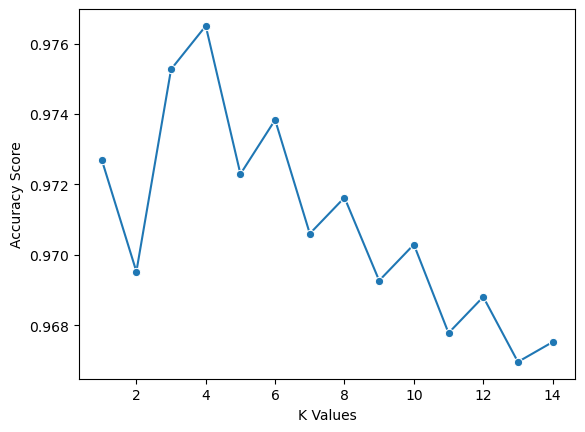

In [3345]:
#plot the accuracy against the n_neighbours parameter, accuracy is best at k=4
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

# Report

## Introduction with Value Based Problem Statement (472 words)

Given a database containing baseball statistics, I am tasked to extract data from the database, explore the data and formulate a prediction problem, create a tabular data table from multiple tables that I find related to formulated problem, or the target I want to predict, then wrangle and prepare the data for modeling. Finally, use the prepared data to build and evaluate a simple machine learning model. 

I must have the knowledge of the technical side of data wrangling and some knowledge on baseball knowledge, by having a good balance of both can I identify the tables I need to create a dataset suitable to be fit into the prediction model. More information about the database is that it contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2014. With huge time differences, combining tables with different time ranges would definitely cause a lot of nulls to pop up from the finalised dataset, which will be one of the problems I have to tackle when merging the tables. The columns in different tables in the dataset also may not match each other, which will also make it a problem for me when I want to merge tables based on a common critieria. Therefore, the selection stage for tables will be the most important step compared to the others since it determines how well the model is going to perform, failing doing this part properly may result in the accuracy of the model being very bad. Likewise, Exploratory Data Analysis will assist in pinpointing the tables I want to keep by identifying which tables with too many nulls. 

This task carries on what I learnt in the previous term which mainly covered wrangling data on a given dataset, this time finding my own tables will be more challenging as similiar to cleaning the data, there are many combinations of tables to form a good dataset to solve my prediction problem, applications of new things learned such as creating new features from calculations, extracting date time measures and knowledge on python's merge and concat methods will assist me in preparing a suitable dataset for cleaning. 

Baseball has lots of areas to cover, one thing that peaked my interest during my research on baseball is the Hall of Fame award; it is the most prestigious award that is given to individuals who excelled in playing, managing, and serving the sport, it essentially cements the person as the greatest of all time which can mean millions of dollars in endorsement deals an lots of career opportunities, since it is evaluated based on career performance, **the ballots have been rather controversial and has generated huge debates in the sports media with people questioning the worthiness of newly elected players, some also beleive good players will be overlooked in the process, making induction unfair.

## Problem Formulation (1200 words)

### Load and Explore Data

I was provided with 26 datasets, which is a huge amount, the data dictionary helped a lot in understanding what the tables mean, doing exploratory data analysis on all of them would be very tedious, so I explored them briefly by using .shape(). Here are my findings:

- Fielding has the highest columns out of all the other datasets, it contains player statistics on fielding, it also has related tables such as fielding_outfield, which records the player's games played in left, center and right field. 

- The core baseball statistics: batting, fielding and pitching, have their own tables called postseason, which is a period of time immediately after the regular season when teams play against each other in a series of games to determine a champion, thus, using postseaosn data would sound important, but if you want a good summary of the player's performance, choosing the regular season statiastics would be prefered.

- There is data provided for players outside of gameplay such as the schools they went, along with their ages and health statistics. 

- The team table, which provides baseball statistics at a team level, has the highest number of columns, so if you want to analyze how players perform in a team, using this table will be suitable. 

In conclusion, the final dataset should have more rows than columns, keeping my prediction problem clear and understanding the nature of the data through exploratory data analysis can help me select the tables. As a rule of thumb, I'll try to obtain a final dataset something similiar to what was given in my Assignment one. 

### Formulate Prediction Problem

Upon exploring the datasets, I have decided to formulate a classification problem : **Predict if a player will be inducted into the Hall of Fame based on their career performance**. 

From research on how baseball players get into the Hall Of Fame (HOF), there are many conditions to fulfil in order to just be eligible to for the HOF, not inducted. Some conditions include being retired in the Major Leagues **at least 5 calendar years preceding the election**, being active as a player in the Major Leagues at some time **during a period beginning 15 years before and ending 5 years prior to election** and have played in each of **10 Major League championship seasons**. However, upon filtering the tables that meet these conditions, I was left with very few rows to work with, thus I decided to predict based on their career performance and not who will be inducted in the next year.

- To be inducted, players must receive votes on 75% or more of ballots.
- Assumptions made include assuming all players have played offense and defense before.

### Exploratory Data Analysis (Part one)

To start things off, since my problem statement and predition problem is about hall of fame, I decided to explore what will the shape of the dataset be like when I merge different table to Hall of Fame. Before doing so, I created a dictionary containing the name of the dataset as the key and its respective dataframe as it value. To understand what the data will look like when merging with the Hall of Fame, I made a function that ierates through the dictionary, it uses the np.intersect method to identify common columns between the Hall of Fame and the other datasets, if there is common columns, it will do an inner join based on the common identifyer, and if not, it wil be concatenated horizontally. The results are then appended into a list where the function will be called and I will be able to plot bar graphs to count the columns and rows of each merged dataframe. 

I plotted two graphs from it, one for rows and one from columns analysing the columns. For the columns part, I saw that when hall of fame was merged with the teams table, it led to a very high number of columns, having a high number of columns in the dataset can make it difficult to work with because there are so many columns, which can make it hard to perform feature selection since it will be hard to find those important features to keep when fitting into the machine learning model. On the other hand, rows should not impose much of an issue, instead, I prefer having more rows so that it can not only provide more data points, which typically leads to better generalization, it can also reduce overfitting as having more rows can provide the model with enough data to differentiate between noise and actual patterns. It can be seen where when the fielding table was merged with the hall of fame returned the highest number of rows. Looking back to the Hall of Fame table, the only two identifiers were its player id and the year the player was inducted, fielding also has a year and player id, so the reason for the high number of rows could be the presence of duplicate identifiers in the fielding dataset, this makes sense since the player can play more than one position during a game, the contributors of these duplicates is also due to the stint, which is the number of times a player appeared in a season, they could play for different teams.  Other columns that returned a high number of rows included batting and appearances. 

To emphasize, the selection of tables require domain knowledge and the technical portion which is understanding the nature of the data. Corresponding to the prediciton question is also important to ensure the context is preserved. Since I am predicting if the player will be inducted based on career statistics, I selected the regular season baseball statistics, batting, fielding and pitching. I took the player table since it contains useful information like their birth dates, first and last games, also taking the appearances table as it provided the games played across different positions for each player. The hall of fame dataset is also included since that is where my target is in; the inducted column. I begun my exploratory data analysis on the selected datasets by first using .head(), .info() and .isnull().mean(). head() helps me get a good sense of what it looks like and the kind of information I am dealing with. .info() helps me identify if the data types are correctly casted and the number of non null values. .isnull().mean() helps me identify the percentage of nulls, assisting in my feature selection when choosing variables to drop. Afterwards, I created a function that takes in the dataframe and a boolean as its paramters, it will print out a correlation heat map and highly correlated pairs with a correaltion higher than 0.7, this will help me identify sources of multicolinearity machine learning models won't perform well when some features are highly correlated with one another. How it works is it first filters the correlations with more than 0.7, then it uses zip(*)  to combine the column and row indices to get the highly correalted pairs, the x != y and x < y ensures no duplicates are displayed. With information with just these methods, data wrangling on multiple tables would be more convenient since now I know what has to be dropped or casted.

## Data Wrangling on multiple tables (2016 words)

### Extract and Create features from different tables

**Hall of Fame**

Starting with the Hall of Fame table, since my prediction problem was predicting hall of fame induction based on **player** statistics, I filtered the category column to only include the player class. Since the category column only has the player class now, it is redundant so I dropped it along with needed_note because it had a very high percentage of nulls.


**Appearences**

For this table and batting fielding and pitching, I decided to do a groupby sum to aggregate all the player statistics for this table by the player_id, this helps to simplify the dataset by reducing the number of rows so each row is for an individual player, making the model easier to train and interprete. I am aware that by doing so, I am losing the ability to analyze how a player’s performance progressed overtime, however my main focus is on overall player statistics, to further justify this, the range of the dates differ from one dataset to another with some players having played 2 years while others maybe 10 or more years, the inconsistency in the time ranges for each player make retaining this feature useful, also making it hard to do time series analysis. So after aggregating, I realsied that a player can attend many different leagues, so I created a copy of the original appearances dataset then grouped by the player id and counted the number of leagues the player has played before merging it back into the primary aggregated appearences table, this created a new feature counting the leagues the player has participated. In appearances, there was different columns which indicated how many times the player appeared in different fielding positions too, however I believed keeping these features are not meaningful since they are irrelevant to the player's career impact, so I decided to create a new feature called position diversity which is the number of unique positions the player has played in, the feature is created from a function which iterates over each row and checks if the games played in that position is not 0 then adds one to the counter. I also dropped highly correalted variables that were flagged out in my heatmap, but created new features based on the dropped to retain some information such as the games played in the inner and outer field. 


**Player**

For the player table, there was no need to aggregate table by player ID since all the rows represent a player, thus the only things I did was to create new useful features related to the player's career statistics such as finding the player's age when they made their first debut and after they retired. TO obtained these features, I first had to cast the datetime datatype to the dates since they originally weren't. Afterwards, dropping the columns were pretty straight forward as most of the features were clearly unrelated to my career statistics such as the death location, weight and height.

**Batting**

Batting was pretty straight forward, i followed the same steps mentioned when cleaning appearances; groupby columns to aggregate the statistics, and create new features to retain information before dropping the highly correlated variables to handle multi-colinearity. For the newly created features, I created batting average (ba) which is calculated by dividing the player's hits by the total at bats, this feature is useful for measuring the performance of batters. Next is the strikeout rate (so_rate) which was calculated by the number of strikeouts divided by the at bats. To provide context, strike out rate represents the frequency with which a pitcher strikes out hitters, so this variable should only lie in the pitching table, however, the strike out (so) variable being in the batting table could suggest the player being striked out, so a higher strike out rate would reflect poorer perfromance of the player in this table, since a strike out occurs when a batter accumilates 3 strikes and is put out. The last feature was important as it captured a lot of features that were highly correlated, it was the slugging percentage, it is calculated from the total bases divided by at bats. Total bases is calcualted from a formula: (singles) + (2*doubles) + (3*triples) + (4*homeruns). Slugging percentage is essentially the total number of bases the player records per bat, representing batting productivity, a higher slugging percentage can indicate good perfromance. After creating the new features, there will definitely be instances of zero division errors resulting in infinite values appearing, so I replaced them with nulls. 


**Pitching**

The same steps apply for the pitching dataset too, pitching had quite a few columns that had multi colinearity so I created more features to capture some information since by simply dropping them will definitely cause some loss of information. The first feature created was the strikeout to walk ratio, which is simply dividing the number of strikeouts, which in context of the pitcher is the number of times the pitcher puts out a batter, so the higher the number of strike outs the better the pitcher's performance, the walk on the other hand is where the pitcher throws four pitches outside the strike zone that the batter does not swing at, awarding first base to the batter, this reflects the pitcher's control. Thus the strike out to walk ratio (so/bb) is the number of strike outs for each walk the pitcher allows; an essential metric for evaluating pitchers. Win rate is pretty self explanantory, its just the percentage of wins. Complete game rate (cg_rate), is calculated from dividing the number of games the pitcher starts without any pitcher taking over with the games the pitcher starts, this is another valuable metric that can evaluate the pitcher's ability to remain effective throughout an entire game, managing their pitch count and enduring the physical demands of multiple innings. The last feature was the walks and innings pitche(whip), it is the most commonly used statistics for evaluating a pitcher's performance, it is calcualted by the sum of the pitcher's walks and hits divided by the total innings pitched. An inning is a segment of a game where the teams alternate on offense and defense, so an inning pitched is the count of how many complete innings a pitcher has worked during their time on the mound. All in all, the whip helps to show how well the pitcher has kept runners off the basepaths. 


**Fielding**

I repeated steps for the fielding table. For the creation of new features section, I created three new features. The first one, I decided to get the most number of times the player played in that specific position, I simply created a new fielding table by groupingby the player id and the pos column, I used .size() to get the count for each position the player played and used .reset_index() to format it into a dataframe. afterwards, I groupby the dataframe by the player id and used the idxmax() function to find the index of the highest count, afterwards I wrapped it in an .loc to find the rows what fit the criteria. In the end I am left with the position the player played the most in, which is useful since it can suggest the position the player plays well in. The next feature created was the putouts per game, a put out is a defensive play where the fielder is credited an out that resulted in the offensive player being retired, so put outs per game is simply the number of put outs the fielder makes for every game it is calculated by dividing the total put outs by the total games games played, this feature will help evaluate how invloved the player is in plays that resulted outs, it can also suggest they may be a highly involved fielder. The laat feature created would be the assists per game which is the same formula of put outs per game but replacing the put outs with assists. An assist is when a fielder touches the ball before a putout is recorded by another fielder, thus having a high number of assists per game reflects how well the payer is good at defense and working with his team mates. Going back to when I explained that the same column name in different tables can represent different contexts depending on the dataset where a strikeout in the batting table tells me the times the batter was retired and a strike out in the pitching field is the times the pitcher retired the batter, it is important to specify which of these columns come from so I added a _f at the end of the columns with same names, so when merging I will know where the column is from, this applies to the other baseball statistics.

### Concatenate, Merge or Join the tables

After preprocessing the tables, it would make the next few steps of data cleaning much easier as there will be lesser columns to handle in terms of multi-colinearity. The order of merging the tables are very important since if you merge wrongly you can lead to a loss of information or result in many nulls. It is important to understand what each newly merged table will look like by doing a .head() every time you perform a merge. The final dataset I want to achieve is where each row contains a unique player id along with his career statistics. I started with a inner join between the player and appearances table, I chose inner join since the player table contains lots of unique players, merging it with the appearances will accurate tabulate all the players existing in each of these datasets. I then proceeded to do left joins for the rest of the tables by the player id as the common identifier as well; the new tables to be merged will always be on the left hand side, additionally, the left join ensures all records of the players on the left side remain there, regardless if they don't appear in the player table. 

### Exploratory Data Analysis (Part two)

**Quantifying missing data**

I plotted a vertical bar graph to display the percentage of null values across each column, the high number of variables shown on the x axis suggests that majority of the columns contain null values, some columns contain very little nulls as their bars don't show up on the graph while others amount to more than 50 percent, as a rule of thumb, I will most likely remvoe those null values with more than 50 percent nulls because imputing them will change the distribution of the data and have a high chance of introducing biasness to them. 


**Multi-Colinearity**

By reusing the same function to plot the highly correlate variables, we see new highly correlated pairs show up. This was why I dropped some highly correlated variables before merging as it will be much harder to work with so many hihly correlated pairs. However, the pairs can be handled by dropping only a few columns since on the left side, there are always duplicates of that column, suggesting only a few columns contribute to high correlations. 

**Cardinality**

Plotting the count of unique categories across the categorical variables shows that the player_id column has the highest number of categories, so much that the other barely columns don't show up on the graph, thus I will drop the Player_id due to high cardinaility. Plotting the count of classes for the individual categorical columns of posn (the player's most played position) and votedby. The posn column shows that most of the classes are not rare categories, only the last htree fall below the 5 percent threshold. Votedby on the other hand only has one class surpassing the 5% threshold, the rest of the classes in that column considered rare are not even close to surpassing the threshod, it is almost as if the BBWAA class is the only category, I will drop this column. 


**Distributions**

Plotting histograms of numerical variables show me that most of the numerical features are incredibly skewed, with most points clustering at a small range on the X axis, causing the shape of the histograms to be very thin. 

## Cleansing the Data (1434 words)

### Final Data Preprocessing


**Handling Target Column**

Since the machine learning model cannot take in object data types, I decided to encode the target column inducted by replacing the Y with 1 and N with 0, encoding like this won't introduce biasness since the inducted column is dichotomous. There were also lots of nulls since the target table only has around 4000 rows while other datasets have more than that, the merge  introduced players that do not exist in the target table, thus I made the assumption that those players who did not exist in the target did not get inducted, allowing me to impute the nulls with 0. 


**Dropping/Creating new features**

To handle the multi colinearity, I decided to create new features to salvage those dropped, some new variables included the percentage of games played as batter/pitcher and the ratio of slugging and batting average. I also used a for loop to iterate over each column, dropping those that have more than 50% nulls. 


**Handling Duplicates**

I also proceeded to analyse the duplicates, one thing interesting is that I saw lots of duplicate rows have nulls on all columns except the inducted column, this tells me that the players must've only existed in the target table and not in the other tables, this makes it hard to determine what the player used to play, he could be in defense/offense or both, which was why I assumed all players played a mix of both. I proceeded to drop all duplicates.

### Oversampling with Smote

Originally, the target column had an unbalanced number of those inducted and those not with only 300 plus entries being inducted out of the 4000+ rows, so after the merge the class imbalance will be worse. Imbalanced classes are bad because it can casue the model to provide misleading accuracies since its now favouring the majority class. So I decided to oversample the minority category to balance out the Majority class. I used SMOTENC since it cn handle categorical variables, it is important to note that SMOTE cannot take in null values, so I decided to impute the nulls with an arbituary value first, and after SMOTE successfully oversampled the minority class, I replaced those that were originally imputed with an arbituary number back to their null values. To achieve this, I created a function that iterates each row and finds the index of the null value, then appending thme to a string delimited by commas, if the row has no null values it is replaced with a string that says there are no nulls. I did a .apply on this function to create a new column to store the strings. Then after the SMOTE successfully oversampled my data, I was able to locate the indices and replace them back with nulls, it was important to shift the target column to the back before applying SMOTE because SMOTE needs you to drop the target and feed it speerately as its parameters, so if you drop the target while it is not the last column, the indices of where the nulls used to be will change, subjecting to wrongly imputed nulls. I selected 0.5 to achieve a 1:2 ratio between the inducted and not inducted class. After oversmapling I split the string and imputed the indices with nulls, preserving the distribution of nuls in the process.

### Cleaning after train test split

I decided to perform the other wrangling techniques after train test split to eliminate any possible data leakage and ensure fair evaluations between the train and test.


**Null value imputation**

I first plotted a heatmap to understand the nature of the missing data, from the results, I observed that there is no pattern whatsover in the distribution of null values, they are all very scattered, this suggests that the data is Missing Completely At Random, to add on, the percentage of missing values across each column is very minimal with the highest being 0.2, this made me choose a simple median imputation method, the choice between median over mean was the distribution of all the features were very skewed so imputing by median will not only provide a better representation of the central tendency but also because the median is robust ot outliers. I imputed nulls for the categorical column with the mode since it also had a low percentage of nulls. 


**Categorical Encoding**

I only had one categorical column which was posn, it had 3 rare categories, I then decided to group them as one class to reduce the cardinaility, so that way by using one hot encoding, which does not impose biasness in the data, will produce lesser columns for each encoded class


**Outlier handling**

Not all variables have to be handled with outliers since handling them might change the distribution of the data, especially when the feature is very skewed, so I targeted those features with shorter tails and more uniform distributions. Analysing the boxplots allows me to differentiate between whether i should handle outliers one the left, right or both tails. I applied capping at the 3rd standard deviations on both tails for debut_age and slg since it was closer to a normal distribution and had outliers on both sides. I capped the variables that were more skewed to one side by capping at the 5th and 95th percentile to reduce the effects of the extreme outliers and to prevent any assumption of a normal distribution, slg/ba and so_rate had a somewhat normal distribution but had outliers only on one tail so I deicded to cap at them at the third standard deviation too but specified the right tail. 


**Transformation**

Before transformation, it is a good practice to do a .describe() and take a look at the minimum and maximum values of the numerical data, different transformation methods have different requirements such as reciprocal transformation can only take in negative values, while yeo johnson can handle all of them. I decided to target columns with distributions closer to normal distributions, I did not transform the highly skewed variables since their results worsened, the .describe() also showed me most of my minimum values were 0 which led me to choose yeo johnson to transform the variables, I thought that powerful transformations like logarithmic transformation can handle skewed variables, but when I tried it, it ruined the distribution of the QQ plot as it made the fit worse. 


**Binning**

Analysing the histograms of the numerical variables, I decided to bin those features with a uniform distribution and long tails.
For those variables with uniform distributions, I applied equal width discretization, this will help make the bins more balanced and easier to interprete. For distributions that are skewed with long tails, I used equal frequency discretization because it can reduce the impact of outliers from the long tails while ensuring most of the bins are balanced. The choice of binning some is because binning can result in the loss of information which can potentially worsen the model performance in the process.

### Feature Engineering

#### I found it hard to identify which scaling method is the best so I decided to evaluate the performance and comment on the shape of the plots before and after scaling; initially before scaling, the kdeplots of the features were extremely thin and looked like just straight lines, this is due to the extreme skewness of the graphs, which is why scaling is important. 



**Maximum-Absolute Scaling: variable distirbutions were very thin, almost as if there was no change.**


The LogReg Model's accuracy on train data is 0.9534167863738969\
The LogReg Model's accuracy on test data is 0.9573856835049078\
The LogReg Model's precision on train data is 0.9091706888986397\
The LogReg Model's precision on test data is 0.917902725077613\
The LogReg Model's recall on train data is 0.9558665231431647\
The LogReg Model's recall on test data is 0.9575386829794891\
The LogReg Model's F1-score on train data is 0.9319340329835083\
The LogReg Model's F1-score on test data is 0.9373018668545262\
    


**Standardization: shape of the graphs were slightly wider after scaling except for the binned variables, all graphs were mainly thin.**
    
The LogReg Model's accuracy on train data is 0.9561358506053765\
The LogReg Model's accuracy on test data is 0.956787167823797\
The LogReg Model's precision on train data is 0.9152941176470588\
The LogReg Model's precision on test data is 0.9180497925311203\
The LogReg Model's recall on train data is 0.9570967245886514\
The LogReg Model's recall on test data is 0.955379632961497\
The LogReg Model's F1-score on train data is 0.9357287829812824\
The LogReg Model's F1-score on test data is 0.9363427966848881\
    
    

**Min Max Scaling: all graphs became right skewed, worsened perfromance**


The LogReg Model's accuracy on train data is 0.9533654832751898\
The LogReg Model's accuracy on test data is 0.9571462772324635\
The LogReg Model's precision on train data is 0.9086791350087668\
The LogReg Model's precision on test data is 0.9169824319669307\
The LogReg Model's recall on train data is 0.9563278486852222\
The LogReg Model's recall on test data is 0.9578985246491544\
The LogReg Model's F1-score on train data is 0.9318948078219824\
The LogReg Model's F1-score on test data is 0.9369940161914819\
    

**Robust Scaling: graphs were also very thin, performance caused underfitting and number of pca components that took up 95% of variance explained was reduced to 2**


The LogReg Model's accuracy on train data is 0.9496716601682742\
The LogReg Model's accuracy on test data is 0.9516399329662437\
The LogReg Model's precision on train data is 0.9062683931724543\
The LogReg Model's precision on test data is 0.9107575233483224\
The LogReg Model's recall on train data is 0.947101337844072\
The LogReg Model's recall on test data is 0.9474631162288593\
The LogReg Model's F1-score on train data is 0.9262350552673133\
The LogReg Model's F1-score on test data is 0.9287477954144621\
    


**Mean Normalizer: distributions were also very skinnybut more centralised**


The LogReg Model's accuracy on train data is 0.9533654832751898\
The LogReg Model's accuracy on test data is 0.9555901364615753\
The LogReg Model's precision on train data is 0.9086791350087668\
The LogReg Model's precision on test data is 0.9109215017064847\
The LogReg Model's recall on train data is 0.9563278486852222\
The LogReg Model's recall on test data is 0.9604174163368118\
The LogReg Model's F1-score on train data is 0.9318948078219824\
The LogReg Model's F1-score on test data is 0.9350148887721142\
    

#### Shapes of all the graphs were similiar, so I chose Standardization as my scaling method since it returned the best model perfromance.

### PCA

Principal component analysis helps me to reduce the dimensionaility of my dataset, by applying it and plotting the pca graph, I saw that out of the 28 principal components, 17 make up 95% of the variance explained, however, when I changed the number of Principal components to 17, I saw the performance dropped, so I did not apply pca.

The LogReg Model's accuracy on train data is 0.948645598194131\
The LogReg Model's accuracy on test data is 0.9514005266937994\
The LogReg Model's precision on train data is 0.901840490797546\
The LogReg Model's precision on test data is 0.9101278949187694\
The LogReg Model's recall on train data is 0.9494079655543596\
The LogReg Model's recall on test data is 0.9474631162288593\
The LogReg Model's F1-score on train data is 0.9250131095962244\
The LogReg Model's F1-score on test data is 0.9284203102961918\

**Why did'nt I do polynomial expansion**

Exploratory data analysis on the tables has made me realsie that there were many highly correlated variables, which can cause multi-colinearity, I found myself constantly dropping and creating new features, resulting in lesser original features in my dataset, plotting the pearson correalation heatmap showed me that there also weren't any features that have a strong correaltion with the target, thus applying polynomial expansion will only create new features on those that were created on top of mine, which will cause them to become less meaningful, likewise, it will not improve the model performance, rather it may worsen it since the new features will have a weaker correlation with the target variable.

## Evaluate machine learning models (909 words)

### Naive Baseline Model

The naive baseline model does not invlove any sophisticated algorithms to calcualte the accuracy, instead it only provides a performance benchmark so you will know the accuracy you need to get higher than, the naive baseline accuracy results as shown is just a calculation from the majority class, which is the non inudcted (0) over the total, since earlier in my preprocessing I used SMOTENC to oversample the minority class to achieve a 1:2 ratio, the naive baseline simple just returned an accuracy by taking 2/3. Without the oversampling, the accuracy would definitely be higher since the majority class had 18k rows and the minority class only had 222. 


**With Oversampling**

The Naive Baseline Model's accuracy on train data is 66.64%.

The Naive Baseline Model's accuracy on test data is 66.73%.

**Without Oversampling**

The Naive Baseline Model's accuracy on train data is 98.84%.

The Naive Baseline Model's accuracy on test data is 98.78%.

### Logistic Regression

Logistic regression is primarily used for binary classification problems, which is suitable for predicting my target column. Results from the scores show that the model is perfroming extremely well as most of the values are close to one. This indicates that the features I have selected are likely to be related and informative for the target variable. Additionally, it also suggest there is little to no multi-colinearity among the features. The low differences between the train and test scores are also very small, indicating low chances of overfitting or underfitting. Here is the difference between applying oversampling and not doing it. From the comparison, we see that the accuracy of the data not oversampled has a higher accuracy but its values like recall and precision are very low, this was indicating a sign of an imbalanced class, the low recall suggests that the model is missing a large number of true positives, this is shown where in the confusion matrix of the train data, the model predicted 41 inducted correctly, but incorrectly predicted 112 as not inducted, thus taking the true positives (41) and dividing by the true positives + false negatives (112) will result in the calculated recall of 0.268. Thus this showed how important handling a class imbalance is like. To add on, class imbalance can also cause overfitting as seen in the non oversampled results, the train scores are performing much better than the test, this could be when the imbalanced dataset was undergoing train test, the ratio of non inducted to inducted was much higher than the test, this will lead to the model favouring the non inducted class, predicting those inducted wrongly. 

**With Oversampling**

The LogReg Model's accuracy on train data is 0.9561358506053765\
The LogReg Model's accuracy on test data is 0.956787167823797\
The LogReg Model's precision on train data is 0.9152941176470588\
The LogReg Model's precision on test data is 0.9180497925311203\
The LogReg Model's recall on train data is 0.9570967245886514\
The LogReg Model's recall on test data is 0.955379632961497\
The LogReg Model's F1-score on train data is 0.9357287829812824\
The LogReg Model's F1-score on test data is 0.9363427966848881\


**Without Oversampling**


The LogReg Model's accuracy on train data is 0.9892015209125475\
The LogReg Model's accuracy on test data is 0.9868701206529453\
The LogReg Model's precision on train data is 0.5774647887323944\
The LogReg Model's precision on test data is 0.4\
The LogReg Model's recall on train data is 0.2679738562091503\
The LogReg Model's recall on test data is 0.14492753623188406\
The LogReg Model's F1-score on train data is 0.36607142857142855\
The LogReg Model's F1-score on test data is 0.2127659574468085\

It is also important to evaluate the performance of the model for each step, here are my results:


**Encoding only**: This is the pure score only with encoding

The LogReg Model's accuracy on train data is 0.9530576646829468\
The LogReg Model's accuracy on test data is 0.9552310270529087\
The LogReg Model's precision on train data is 0.9105201292976786\
The LogReg Model's precision on test data is 0.9168110918544194\
The LogReg Model's recall on train data is 0.9529447947101338\
The LogReg Model's recall on test data is 0.9517812162648435\
The LogReg Model's F1-score on train data is 0.9312495303929672\
The LogReg Model's F1-score on test data is 0.9339689265536724\


**With handling outliers**: After hangling outliers, scores imporved slightly as seen where accuracy for train increased by 0.0006\

The LogReg Model's accuracy on train data is 0.9536733018674328\
The LogReg Model's accuracy on test data is 0.9551113239166866\
The LogReg Model's precision on train data is 0.9124926340601061\
The LogReg Model's precision on test data is 0.9185236768802229\
The LogReg Model's recall on train data is 0.9524834691680762\
The LogReg Model's recall on test data is 0.9492623245771861\
The LogReg Model's F1-score on train data is 0.9320592882401625\
The LogReg Model's F1-score on test data is 0.9336400637055389\


**With transformation**: Transforming the variables improved all the scores and reduce overfitting in the recall part, reducing the difference in scores for train and test from 0.003 to 0.001

The LogReg Model's accuracy on train data is 0.9550584855325261\
The LogReg Model's accuracy on test data is 0.9572659803686857\
The LogReg Model's precision on train data is 0.9158906134515891\
The LogReg Model's precision on test data is 0.9222454672245467\
The LogReg Model's recall on train data is 0.952791019529448\
The LogReg Model's recall on test data is 0.9517812162648435\
The LogReg Model's F1-score on train data is 0.9339764847753994\
The LogReg Model's F1-score on test data is 0.9367805914644944\


**With binning**: Binning improved the train accuracy by 0.001, but no change for the test, reducing the difference in scores. 

The LogReg Model's accuracy on train data is 0.9562384568027908\
The LogReg Model's accuracy on test data is 0.9572659803686857\
The LogReg Model's precision on train data is 0.9147093364650617\
The LogReg Model's precision on test data is 0.9184519695922598\
The LogReg Model's recall on train data is 0.9581731508534522\
The LogReg Model's recall on test data is 0.956459157970493\
The LogReg Model's F1-score on train data is 0.9359369132557266\
The LogReg Model's F1-score on test data is 0.9370703331570598\



The improvement of the perfromance was rather insignificant, showing increases in scores by small margins, the high scores at the start after just encoding told me that it was probably the preprocessing that led to such optimistic scores. 


To further test if my data is overfitting, I performed a 5 fold cross validation on the X train and compared the mean results and the standard deviation with the accuracy of train and test, printing all 5 values from the cross validation will prove performance is consistency, checking the mean value with the test accuracy can evaluate  if they are close to each other; the closer they are the better the performance, the standard deviation evaluates the acceptable difference, which was 0.0003, the difference between the train and test accuracy is less than the standard deviation, this concludes the performance is good and legitimate.

### Decision tree

I decided to evaluate my performance across different models to check for consistency and increase confidence in my predictions, I started with the decision tree model, it does not require scaling since the nature of decision trees allow them to work with unscaled data, making them useful when working with datasets that include features with different units or ranges. Thus I created a copy of the X_train and test to exclude it from the scaling processes and evaluate the model. The results show that the performance of the Decision tree is very good with the accuracy being better than the logistic regression. However, there are signs of overfitting with the X train scores being better than the test, it could be due to the dataset being small or the target class is still imbalanced, the tree's large depth could also be the cause. 

The DTree Model's accuracy on train data is 0.995587933511184\
The DTree Model's accuracy on test data is 0.9706727316255686\
The DTree Model's precision on train data is 1.0\
The DTree Model's precision on test data is 0.9557553956834532\
The DTree Model's recall on train data is 0.986775334461018\
The DTree Model's recall on test data is 0.9560993163008277\
The DTree Model's F1-score on train data is 0.993343653250774\
The DTree Model's F1-score on test data is 0.9559273250584638\

### K- nearest neighbours

I also explored with the K nearest neighbours model, one thing unique about this model is that you have to specify a K-value, which is the number of neighbours close to the specific data point to be classified as, there is no way to determine the k value from domain knowledge or intuition, so a better way to find the suitable k value would be to plot the accuracy scores across the k values. I proceeded to run a for loop between a set of k values from 1 to 15, evaluating each k value across 5 subsets of the X train through a 5 fold cross validation and obtaining the mean accuracy, this provides a better estimate of the model's performance when evaluating the k value. Upon plotting the line chart, it shows that a k value of 4 is the most suitable. The scores return show the model also performed really well with slight overfitting across each score metric.


The Knn Model's accuracy on train data is 0.9843012517956085\
The Knn Model's accuracy on test data is 0.9784534354800096\
The Knn Model's precision on train data is 0.957613351055974\
The Knn Model's precision on test data is 0.9448818897637795\
The Knn Model's recall on train data is 0.997078271566969\
The Knn Model's recall on test data is 0.9931630082763584\
The Knn Model's F1-score on train data is 0.9769474160012054\
The Knn Model's F1-score on test data is 0.968421052631579\

## Summary (242 words)

After going through the entire process, I have realised that majority of my work is spent on preprocessing, this led me to understand how important preprocessing of the data is, more than imputing the nulls, handling outliers and transformaing etc. This is also further proven where my model performance was already performing well even without transformation or handling outliers. All in all, understanding the context of the baseball database is also important so you know which tables to select and calculate new features related to baseball metrics to handle the multi-colineerity. Likewise, multi-colineerity was also a big part of preprocessing along with oversampling the minority class to handle the class imbalance of my target column. To be honest, my final data may not be as contextually accurate when predicting the hall of fame players by their career statistics, if I wanted to get a more accurate dataset to predict the hall of fame, I would have filtered out the tables to match the conditions to be eligible to the hall of fame as much as possible, but it only resulted in me having very few rows to work with, thus, more data on hall of fame players need to be added, since the hall of fame table was already experiencing a class imbalance between the inducted and not. More data of other players also need to be added since there were so few players that were eligible for the hall of fame. 

## Reflection (512 words)

Data wrangling has been an exciting module that revloves around cleaning and extracting data. I have learnt a myriad of techniques and methods to extract data to create my own dataset to solve my own prediction problems regarding either classification or regression. This module has also gave me the opportunity to explore and evaluate the performance of my datasets through different simple machine learning models, which is an important step to take before being exposed to the world of machine learning in my next semester. I have understood that data wrangling's processes and how important it is since every step is important to creating a clean dataset to be used to analyse or predict. The steps are so important to the point where messing up one of them may result in restarting the whole process. Furthermore, I have also learnt there are many ways to extract and transform features in the dataset, the importance of creating new features helps to handle many different issues like multi colineerity as well as capturing the non linear relationships in the data through methods such as polynomial expansion. The creation of features can also provide more context and simplify information, this is especially true when creating new features from unstructured data like texts; extracting its features such as by counting its words, unique words and lexical diversity. Extracting time series data by creating new features to extract the year, month, quarters and days can help deepen insights for time series analysis. I have also learnt how to make use of pipelines to apply various types of transformations in one go, such as applying mean imputation for one column and median imputation for another, the same applies for encoding where I can do one hot encoding on one categorical variable and do target mean encoding on the others, there are endless possibilities to transforming data with the help of pipelines. I have also learnt new libaries in python such as numpy and pandas for transforming data, matplotlib and seaborn to visualize and perform exploratory data analysis, feture engine and scikit learn for further data wrangling and machine learning. These libaries themselves are already useful to wrangle data, but what I even enjoyed more was the freedom given; you did'nt have to be constrained to just using these libaries, in fact, we are encouraged to import new libaries we reasearched that will help clean out datasets more effectively and solve issues that may be tedious with just pure python coding. One example would be the SMOTE libary which can oversample minority classes to handle class imbalance, improving performance of the models. We were also allowed to explore different machine learning models to evaluate their performances on the datasets we created, this freedom we were given gave us great learning opportunities to critically define and solve our problems. The assignments given were also incredibly well made and are very similiar to real world problems, this will help us improve on our critical thinking especially since we will be applying this when we go for our internships in year 3.

Total words: 6785

## References

https://www.foxsports.com/stories/mlb/mlb-hall-of-fame-what-are-the-criteria-for-induction-today

https://stathead.com/tiny/4tEG2

https://baseballhall.org/hall-of-fame/election-rules/bbwaa-rules

https://en.wikipedia.org/wiki/List_of_members_of_the_Baseball_Hall_of_Fame

https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_players_named_in_the_Mitchell_Report











